In [1]:
# 查看类的帮助文档
help(torch.nn.BatchNorm1d)

Help on class BatchNorm1d in module torch.nn.modules.batchnorm:

class BatchNorm1d(_BatchNorm)
 |  BatchNorm1d(num_features: int, eps: float = 1e-05, momentum: float = 0.1, affine: bool = True, track_running_stats: bool = True, device=None, dtype=None) -> None
 |  
 |  Applies Batch Normalization over a 2D or 3D input as described in the paper
 |  `Batch Normalization: Accelerating Deep Network Training by Reducing
 |  Internal Covariate Shift <https://arxiv.org/abs/1502.03167>`__ .
 |  
 |  .. math::
 |  
 |      y = \frac{x - \mathrm{E}[x]}{\sqrt{\mathrm{Var}[x] + \epsilon}} * \gamma + \beta
 |  
 |  The mean and standard-deviation are calculated per-dimension over
 |  the mini-batches and :math:`\gamma` and :math:`\beta` are learnable parameter vectors
 |  of size `C` (where `C` is the number of features or channels of the input). By default, the
 |  elements of :math:`\gamma` are set to 1 and the elements of :math:`\beta` are set to 0.
 |  At train time in the forward pass, the sta

In [236]:
torch.nn.BatchNorm1d?

Init signature:
torch.nn.BatchNorm1d(
    num_features: int,
    eps: float = 1e-05,
    momentum: float = 0.1,
    affine: bool = True,
    track_running_stats: bool = True,
    device=None,
    dtype=None,
) -> None
Docstring:     
Applies Batch Normalization over a 2D or 3D input as described in the paper
`Batch Normalization: Accelerating Deep Network Training by Reducing
Internal Covariate Shift <https://arxiv.org/abs/1502.03167>`__ .

.. math::

    y = \frac{x - \mathrm{E}[x]}{\sqrt{\mathrm{Var}[x] + \epsilon}} * \gamma + \beta

The mean and standard-deviation are calculated per-dimension over
the mini-batches and :math:`\gamma` and :math:`\beta` are learnable parameter vectors
of size `C` (where `C` is the number of features or channels of the input). By default, the
elements of :math:`\gamma` are set to 1 and the elements of :math:`\beta` are set to 0.
At train time in the forward pass, the standard-deviation is calculated via the biased estimator,
equivalent to ``torch.var(in

In [2]:
# 在计算机的内存中一次性存储多个数值. 多个数值之间有规律为0-8的小数数值
# => 选择张量数据结构, 张量的维度ndim, 形状shape, 数据类型dtype
f = torch.arange(start=0, end=9, step=1, dtype=torch.float32).reshape(3, 3)
f  # 假设有3个样本, 每一个样本有3个特征变量

tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])

In [3]:
hidden_bn1d = nn.BatchNorm1d(num_features=3)

In [4]:
# 查看BN层上的模型的参数
list(hidden_bn1d.parameters())

[Parameter containing:
 tensor([1., 1., 1.], requires_grad=True),
 Parameter containing:
 tensor([0., 0., 0.], requires_grad=True)]

In [ ]:
hidden_bn1d(f)

In [240]:
# Batch Normalization层是对传入该层的数据进行线性变换(带有样本和方差的模型参数向量待学习)
# 第一步: 计算传入该层的数据集的各个特征变量的均值和方差
mean_ = torch.mean(f, dim=0)
var_ = torch.var(f, dim=0)
std_ = torch.sqrt(var_)

# 张量化计算
(f - mean_) / std_

# 矩阵计算
r = torch.tensor(1.) / f.std(dim=0)
b = - f.mean(dim=0) / f.std(dim=0)
torch.mm(f, torch.diag(r)) + b

tensor([[-1., -1., -1.],
        [ 0.,  0.,  0.],
        [ 1.,  1.,  1.]])

tensor([[-1.0000e+00, -1.0000e+00, -1.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  1.1921e-07],
        [ 1.0000e+00,  1.0000e+00,  1.0000e+00]])

In [241]:
std_

tensor([3., 3., 3.])

In [242]:
torch.var?

Docstring:
var(input, dim=None, *, correction=1, keepdim=False, out=None) -> Tensor

Calculates the variance over the dimensions specified by :attr:`dim`. :attr:`dim`
can be a single dimension, list of dimensions, or ``None`` to reduce over all
dimensions.

The variance (:math:`\sigma^2`) is calculated as

.. math:: \sigma^2 = \frac{1}{\max(0,~N - \delta N)}\sum_{i=0}^{N-1}(x_i-\bar{x})^2

where :math:`x` is the sample set of elements, :math:`\bar{x}` is the
sample mean, :math:`N` is the number of samples and :math:`\delta N` is
the :attr:`correction`.



If :attr:`keepdim` is ``True``, the output tensor is of the same size
as :attr:`input` except in the dimension(s) :attr:`dim` where it is of size 1.
Otherwise, :attr:`dim` is squeezed (see :func:`torch.squeeze`), resulting in the
output tensor having 1 (or ``len(dim)``) fewer dimension(s).


Args:
    input (Tensor): the input tensor.
    
    dim (int or tuple of ints, optional): the dimension or dimensions to reduce.
        If ``No

In [243]:
t = torch.tensor([1., 2], dtype=torch.float32)
t

tensor([1., 2.])

In [244]:
# 总体方差的unbiased estimation
torch.var(t)

tensor(0.5000)

In [245]:
# 样本方差是总体方差的biased estimation
torch.var(t, unbiased=False)

tensor(0.2500)

In [246]:
torch.var(f, dim=0)

tensor([9., 9., 9.])

In [247]:
torch.var(f, dim=0, unbiased=False)

tensor([6., 6., 6.])

In [248]:
a = torch.tensor(1.) / torch.sqrt(torch.var(f, dim=0, unbiased=False))
a_mat = torch.diag(a)
a_mat
b = -torch.mean(f, dim=0) / a
b

tensor([[0.4082, 0.0000, 0.0000],
        [0.0000, 0.4082, 0.0000],
        [0.0000, 0.0000, 0.4082]])

tensor([ -7.3485,  -9.7980, -12.2474])

In [249]:
a = torch.tensor(1.) / torch.std(f, dim=0, unbiased=False)
a_mat = torch.diag(a)
b = -torch.mean(f, dim=0) / torch.std(f, dim=0, unbiased=False)

In [250]:
torch.mm(f, a_mat) + b

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]])

In [251]:
hidden_batch_norm1d.parameters()

<generator object Module.parameters at 0x135513610>

In [252]:
list(hidden_batch_norm1d.parameters())

[Parameter containing:
 tensor([1., 1., 1.], requires_grad=True),
 Parameter containing:
 tensor([0., 0., 0.], requires_grad=True)]

In [253]:
hidden_batch_norm1d2 = nn.BatchNorm1d(num_features=3, affine=False)

In [254]:
list(hidden_batch_norm1d2.parameters())

[]

In [255]:
hidden_batch_norm1d2(f)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]])

In [256]:
# 在计算机的内存中一次性存储多个数值. 多个数值之间有规律为0-8的小数数值
# => 选择张量数据结构, 张量的维度ndim, 形状shape, 数据类型dtype, 在计算时是否作为计算图的叶子节点
f = torch.arange(start=0, end=9, step=1, dtype=torch.float32).reshape(3, 3)
f

tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])

In [257]:
# 在深度神经网络模型中用于调整当前存在于模型内部的各个原始特征变量or潜在特征变量的数据分布中的均值和方差/标准差
# 使得当前的数据分布有助于让损失函数的值减小的层
hidden_bn1d = nn.BatchNorm1d(num_features=3)

In [258]:
hidden_bn1d.running_mean

tensor([0., 0., 0.])

In [259]:
hidden_bn1d.running_var

tensor([1., 1., 1.])

In [260]:
# 数据经过用于调整各个原始特征变量or潜在特征变量的均值和方差的层
hidden_bn1d(f)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

In [261]:
hidden_bn1d.running_mean

tensor([0.3000, 0.4000, 0.5000])

In [262]:
hidden_bn1d.running_var

tensor([1.8000, 1.8000, 1.8000])

In [263]:
# 计算经过该层处理后各个原始特征变量或潜在特征变量的均值和方差
torch.mean(f, dim=0)

tensor([3., 4., 5.])

In [264]:
torch.var(f, dim=0)

tensor([9., 9., 9.])

In [265]:
# 创建当数据流经时用于调整各个原始特征变量or潜在特征变量的均值和方差的层
hidden_bn1d = nn.BatchNorm1d(num_features=3)

# 该层上的模型的参数是各个原始特征变量or潜在特征变量的均值和方差
list(hidden_bn1d.parameters())
# 均值: β=(β1, β2, …, βn)
hidden_bn1d.running_mean
# 方差: γ=(γ1, γ2, …, γn)
hidden_bn1d.running_var

[Parameter containing:
 tensor([1., 1., 1.], requires_grad=True),
 Parameter containing:
 tensor([0., 0., 0.], requires_grad=True)]

tensor([0., 0., 0.])

tensor([1., 1., 1.])

In [266]:
# 一个batch的数据流经数据调整层
hidden_bn1d(f)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

In [267]:
# 该层上的模型的参数是各个原始特征变量or潜在特征变量的均值和方差
list(hidden_bn1d.parameters())
# 均值: β=(β1, β2, …, βn)
hidden_bn1d.running_mean
# 方差: γ=(γ1, γ2, …, γn)
hidden_bn1d.running_var

[Parameter containing:
 tensor([1., 1., 1.], requires_grad=True),
 Parameter containing:
 tensor([0., 0., 0.], requires_grad=True)]

tensor([0.3000, 0.4000, 0.5000])

tensor([1.8000, 1.8000, 1.8000])

In [268]:
# 创建当数据流经时用于调整各个原始特征变量or潜在特征变量的均值和方差的层
hidden_bn1d = nn.BatchNorm1d(num_features=3)

In [269]:
# 计算当前输入数据集的各个原始特征变量的均值
sample_mean = torch.mean(f, dim=0)
sample_mean

tensor([3., 4., 5.])

In [270]:
momentum = 0.1
running_mean = (1 - momentum) * hidden_bn1d.running_mean + momentum * sample_mean
running_mean

tensor([0.3000, 0.4000, 0.5000])

In [271]:
# 计算当前输入数据集的各个原始特征变量的方差
sample_var = torch.var(f, dim=0)
sample_var

tensor([9., 9., 9.])

In [272]:
momentum = 0.1
running_var = (1 - momentum) * hidden_bn1d.running_var + momentum * sample_var
running_var

tensor([1.8000, 1.8000, 1.8000])

In [273]:
# 创建当数据流经时用于调整各个原始特征变量or潜在特征变量的均值和方差的层
hidden_bn1d = nn.BatchNorm1d(num_features=3)
print(hidden_bn1d.running_mean)
print(hidden_bn1d.running_var)

# 在计算机的内存中逐个存储 结构化数据
running_mean_lst = []
running_var_lst = []

for i in range(50):
    hidden_bn1d(f)
    running_mean_lst.append(hidden_bn1d.running_mean.clone().tolist())
    running_var_lst.append(hidden_bn1d.running_var.clone().tolist())

tensor([0., 0., 0.])
tensor([1., 1., 1.])


tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

In [274]:
print(hidden_bn1d.running_mean)
print(hidden_bn1d.running_var)

tensor([2.9845, 3.9794, 4.9742])
tensor([8.9588, 8.9588, 8.9588])


In [275]:
hidden_bn1d.running_mean
torch.mean(f, dim=0)

tensor([2.9845, 3.9794, 4.9742])

tensor([3., 4., 5.])

In [276]:
hidden_bn1d.running_var
torch.var(f, dim=0)

tensor([8.9588, 8.9588, 8.9588])

tensor([9., 9., 9.])

In [277]:
running_mean_tensor = torch.tensor(running_mean_lst)
running_mean_tensor

tensor([[0.3000, 0.4000, 0.5000],
        [0.5700, 0.7600, 0.9500],
        [0.8130, 1.0840, 1.3550],
        [1.0317, 1.3756, 1.7195],
        [1.2285, 1.6380, 2.0475],
        [1.4057, 1.8742, 2.3428],
        [1.5651, 2.0868, 2.6085],
        [1.7086, 2.2781, 2.8477],
        [1.8377, 2.4503, 3.0629],
        [1.9540, 2.6053, 3.2566],
        [2.0586, 2.7448, 3.4309],
        [2.1527, 2.8703, 3.5879],
        [2.2374, 2.9833, 3.7291],
        [2.3137, 3.0849, 3.8562],
        [2.3823, 3.1764, 3.9705],
        [2.4441, 3.2588, 4.0735],
        [2.4997, 3.3329, 4.1661],
        [2.5497, 3.3996, 4.2495],
        [2.5947, 3.4597, 4.3246],
        [2.6353, 3.5137, 4.3921],
        [2.6717, 3.5623, 4.4529],
        [2.7046, 3.6061, 4.5076],
        [2.7341, 3.6455, 4.5569],
        [2.7607, 3.6809, 4.6012],
        [2.7846, 3.7128, 4.6411],
        [2.8062, 3.7416, 4.6769],
        [2.8255, 3.7674, 4.7093],
        [2.8430, 3.7907, 4.7383],
        [2.8587, 3.8116, 4.7645],
        [2.872

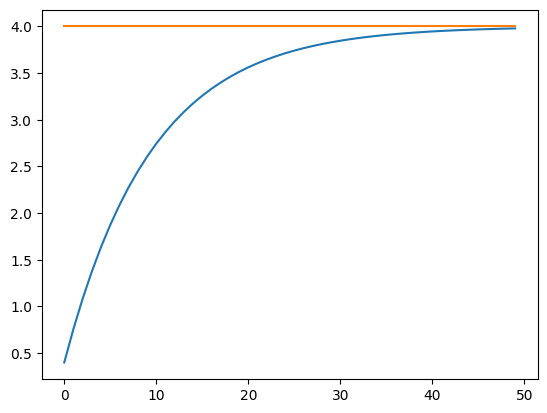

In [278]:
plt.plot(range(50), running_mean_tensor[:, 1])
plt.plot(range(50), torch.full_like(running_mean_tensor, fill_value=torch.mean(f, dim=0)[1])[:, 1])
plt.show()

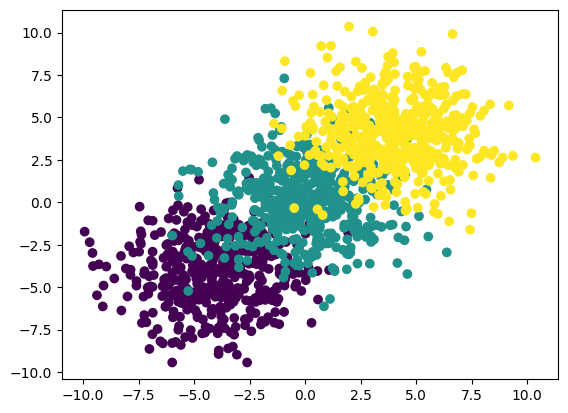

In [279]:
torch.manual_seed(1998)

X, y = tensorGenCla()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [280]:
X

tensor([[-4.0454, -5.5700],
        [ 0.5785, -5.7307],
        [-6.4048, -8.3155],
        ...,
        [ 4.0021,  4.3317],
        [ 4.7924,  2.6217],
        [ 3.8267,  5.3344]])

In [281]:
# 如果深度神经网络模型需要学习的数据集的特征变量和标签是分开存储的, 则先将特征变量和标签按照样本的编号进行合并
# 对于合并后的完整的数据集, 先根据指定的比例将其划分为训练数据集和测试数据集
# 再根据指定的样本容量将训练数据集和测试数据集分别划分为若干个互不相交的子数据集
dataset_train, dataset_loss = split_loader(X=X, y=y)

In [282]:
dataset_train.dataset[:]

(tensor([[ 6.5463,  0.7482],
         [-3.9878, -1.4202],
         [-5.6773, -7.2959],
         ...,
         [ 0.8923,  2.9644],
         [-2.2013,  2.1761],
         [-2.8269, -1.4858]]),
 tensor([[2],
         [0],
         [0],
         ...,
         [1],
         [1],
         [1]]))

In [283]:
# 获取训练数据集中的特征变量
dataset_train.dataset[:][0]

tensor([[ 6.5463,  0.7482],
        [-3.9878, -1.4202],
        [-5.6773, -7.2959],
        ...,
        [ 0.8923,  2.9644],
        [-2.2013,  2.1761],
        [-2.8269, -1.4858]])

In [284]:
# 计算训练数据集中的样本的个数
len(dataset_train.dataset[:][0])

1050

In [285]:
# 计算完整的数据集中的样本的个数
len(X)

1500

In [286]:
# 计算训练数据集中的样本的个数占完整数据集中样本的个数的比例
len(dataset_train.dataset[:][0]) / len(X)

0.7

In [287]:
# 计算训练数据集中各个特征变量的均值和方差
torch.mean(dataset_train.dataset[:][0], dim=0)
torch.var(dataset_train.dataset[:][0], dim=0)

tensor([ 0.0684, -0.0073])

tensor([14.6986, 14.7250])

In [288]:
hidden_bn1d = nn.BatchNorm1d(num_features=dataset_train.dataset[:][0].shape[1])
hidden_bn1d

BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [289]:
hidden_bn1d.running_mean
hidden_bn1d.running_var

tensor([0., 0.])

tensor([1., 1.])

In [290]:
# 搭建深度神经网络模型的训练流程
for (i_X, i_y) in dataset_train:
    print(i_X)
    break

tensor([[ 4.9183,  3.2157],
        [ 3.4664,  2.6321],
        [-3.6921, -1.3473],
        [ 3.7336,  8.5863],
        [10.3739,  2.6365],
        [-0.0609,  3.2057],
        [ 2.2599,  2.9497],
        [-0.2603, -3.7381],
        [ 2.8882,  4.5349],
        [ 2.8772,  2.2512]])


In [291]:
# 对训练数据集进行完整的一遍学习
for (i_X, i_y) in dataset_train:
    hidden_bn1d(i_X)

tensor([[-0.3480, -1.2035],
        [ 0.4625,  1.5454],
        [-0.6667, -0.4084],
        [-0.8923, -1.3296],
        [-0.1449,  0.1395],
        [-1.6827, -0.3676],
        [ 1.0045,  0.0665],
        [ 0.5710,  0.7312],
        [-0.3345, -0.8504],
        [ 2.0310,  1.6768]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.3741, -0.7709],
        [-0.4833, -1.3223],
        [ 1.2718,  0.7800],
        [ 1.0219,  1.0190],
        [-1.5284, -1.1933],
        [ 0.0132,  1.3255],
        [-1.0846, -0.9603],
        [ 0.4120, -0.4260],
        [ 0.8660,  0.2610],
        [ 0.8855,  1.2875]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.2759,  1.2550],
        [-0.1600, -1.1134],
        [-0.5096, -1.3620],
        [ 1.8022,  1.2877],
        [ 0.5793, -0.2959],
        [ 1.1999,  1.3355],
        [ 0.2688, -0.1981],
        [ 0.1050,  0.3040],
        [-1.4679,  0.0769],
        [-1.5418, -1.2897]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.0869, -0.6943],
        [ 0.7239,  0.7067],
        [-0.5073, -0.8238],
        [ 0.0230, -0.8412],
        [-1.3705, -1.0441],
        [ 1.8772,  1.0960],
        [-1.1710, -1.4622],
        [ 1.0536,  0.7970],
        [ 0.0732,  1.1152],
        [ 0.3849,  1.1506]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.5170, -0.5003],
        [-0.1509,  1.0008],
        [-0.1833, -0.9399],
        [-1.0461, -0.1134],
        [ 0.8292,  0.4347],
        [-1.0669, -1.3185],
        [ 0.3103,  0.7911],
        [-1.7478, -1.3693],
        [ 1.2095,  1.8422],
        [ 0.3289,  0.1725]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.3038, -1.4792],
        [-0.9035,  0.9692],
        [ 0.2066, -0.0349],
        [-0.9189, -0.8641],
        [ 0.6076,  1.3177],
        [ 2.3709,  1.8326],
        [ 0.6452, -0.6327],
        [-0.1102, -0.3721],
        [-0.2702, -0.0369],
        [-0.3236, -0.6996]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.3100,  0.5720],
        [-0.6079, -0.8563],
        [-0.8297, -1.3246],
        [-0.1328,  0.1161],
        [ 0.2858,  0.8460],
        [-0.9324, -1.0895],
        [ 1.6661,  0.9890],
        [-1.2416, -1.1677],
        [ 1.1961,  1.6968],
        [-0.7135,  0.2182]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.5407,  1.7929],
        [-0.4891,  0.6246],
        [ 1.9584,  1.3650],
        [ 0.4224, -0.5370],
        [-0.7102,  0.2731],
        [-0.4486, -0.5978],
        [-1.3709, -0.3107],
        [-0.4844, -1.4817],
        [-0.6919, -1.2287],
        [ 0.2736,  0.1004]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.5337,  0.8203],
        [ 0.7507, -0.7351],
        [ 0.5775,  1.3093],
        [-0.7349, -0.7931],
        [-0.1789,  0.9624],
        [ 1.7438,  0.6892],
        [-1.0632, -1.5642],
        [-1.8388, -1.0718],
        [ 0.6846,  1.0202],
        [-0.4744, -0.6374]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2389, -1.5314],
        [-1.5607, -0.1998],
        [ 1.1930, -0.8630],
        [-0.4971,  0.3574],
        [ 0.0075, -0.4880],
        [-0.3850, -0.5120],
        [ 1.6855,  2.1955],
        [ 0.1056,  1.1168],
        [ 1.0935,  0.2554],
        [-0.4033, -0.3309]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.8208,  0.8436],
        [-1.5105, -1.8756],
        [-0.0605,  1.3362],
        [-0.2517, -1.0105],
        [-0.3816, -0.2232],
        [-1.9385, -1.0682],
        [ 0.5304,  0.6667],
        [ 0.6777,  1.1201],
        [ 1.2795, -0.0553],
        [ 0.8345,  0.2661]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.0793e-02,  8.0379e-01],
        [ 7.2752e-01,  5.5320e-01],
        [-1.2461e+00, -9.3415e-01],
        [ 9.4624e-01,  1.6987e+00],
        [-1.2247e+00, -1.5812e+00],
        [-8.2276e-01, -3.9279e-05],
        [-4.2882e-01, -2.2619e-01],
        [ 1.7727e+00,  1.2384e+00],
        [ 9.9394e-01, -7.7863e-01],
        [-7.2884e-01, -7.7384e-01]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.6024,  0.3378],
        [ 1.4588,  0.5481],
        [-1.3117, -2.2134],
        [-0.5135, -0.0841],
        [ 0.6221, -0.6319],
        [ 0.4034, -0.2199],
        [-0.8223,  0.4952],
        [-1.3932, -0.5745],
        [ 1.1965,  0.4960],
        [ 0.9623,  1.8467]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.7209,  1.4758],
        [ 1.3317,  1.5092],
        [-0.2437, -0.3365],
        [-1.2580, -1.6228],
        [-1.2584, -0.1959],
        [-0.5350, -0.5223],
        [ 1.9093,  1.2434],
        [-0.7393, -0.7735],
        [ 0.0197, -0.2472],
        [ 0.0527, -0.5302]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.3623, -0.5671],
        [ 1.0836,  1.6195],
        [-0.6385, -1.2793],
        [-1.7961, -0.7141],
        [ 1.2813,  1.6008],
        [-0.8538, -0.8621],
        [ 0.8117,  0.6290],
        [ 0.2633,  0.5050],
        [ 1.0902,  0.0433],
        [-0.8794, -0.9750]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.1721, -1.1376],
        [-0.5235,  0.5902],
        [ 1.2742,  1.3581],
        [-0.4295, -0.0511],
        [ 1.3748,  0.3474],
        [-0.9099, -1.1196],
        [ 0.9465,  0.6423],
        [-0.4462, -0.3177],
        [ 1.1100,  1.3563],
        [-1.2243, -1.6683]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.3310,  2.0921],
        [ 0.7602, -0.0737],
        [ 0.3760,  0.4535],
        [-0.3231, -1.1878],
        [ 0.5105,  0.2596],
        [ 1.1985,  1.2399],
        [-0.3931, -1.1967],
        [-1.4969, -0.7994],
        [-1.8139, -0.4807],
        [-0.1492, -0.3067]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.8172, -1.6952],
        [-0.9074, -0.4884],
        [ 0.7657, -0.6736],
        [-0.0067,  1.0977],
        [ 1.7170,  0.8547],
        [ 0.6856,  0.7368],
        [ 0.3707,  0.1290],
        [ 0.1127,  0.5980],
        [ 0.3449,  1.0291],
        [-1.2653, -1.5882]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2047, -0.9008],
        [-0.7153, -0.0913],
        [ 0.1735,  1.0393],
        [-0.5348, -1.9501],
        [ 1.6381,  1.4711],
        [-0.4880,  0.0681],
        [ 1.3672,  0.9883],
        [-0.1184, -0.1519],
        [ 1.1473,  0.4767],
        [-1.2648, -0.9494]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.2318, -0.5492],
        [-1.7852, -1.2701],
        [ 0.7381,  0.3957],
        [-1.0656, -1.7325],
        [-0.7044, -0.4909],
        [ 1.2062,  1.2809],
        [ 1.2288,  1.0235],
        [ 0.7568,  0.8836],
        [ 0.6480,  0.9752],
        [-0.7909, -0.5161]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.0720, -0.1450],
        [-0.2305, -0.6376],
        [-0.9026, -1.5849],
        [ 1.7671,  1.8178],
        [-0.1205, -0.0375],
        [-0.7753, -0.8065],
        [-0.3713, -0.8151],
        [ 1.4296,  1.2260],
        [ 1.1440,  0.9677],
        [-0.8684,  0.0151]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.0926, -2.0801],
        [ 0.2942,  0.7600],
        [-0.1458,  0.5271],
        [ 1.3968,  0.0084],
        [ 0.6566,  1.0625],
        [-0.6572, -0.6765],
        [-1.1360, -1.0478],
        [-1.0799,  0.5873],
        [ 1.8494,  1.2719],
        [-0.0854, -0.4128]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.3359,  1.5033],
        [ 0.8090,  1.6462],
        [ 0.7599, -0.1222],
        [-1.2013, -0.3979],
        [-0.1542, -0.3973],
        [-0.0333, -0.9069],
        [-1.5972, -1.6766],
        [ 1.3614,  0.6074],
        [-1.0218, -0.7041],
        [-0.2584,  0.4481]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.4179, -0.6352],
        [ 0.5024,  1.9044],
        [ 1.3815,  0.7541],
        [-0.7619, -1.4825],
        [-0.0533,  0.4840],
        [ 1.3636,  0.2147],
        [-0.8851,  0.1198],
        [-1.6108, -0.8952],
        [ 0.7665, -1.2320],
        [-1.1208,  0.7678]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.2143, -0.0934],
        [-0.7955, -0.5343],
        [ 0.4877,  0.1313],
        [ 1.5830,  1.0676],
        [-0.7044, -0.6192],
        [ 1.5261,  0.6973],
        [-1.1783, -1.9681],
        [-0.1629,  1.8473],
        [-1.3173, -0.6205],
        [ 0.7759,  0.0920]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 2.0352,  1.2419],
        [ 1.4014,  1.2686],
        [ 0.0074, -0.1002],
        [ 0.0395, -1.3449],
        [-0.9587, -2.0980],
        [ 0.2042,  0.1057],
        [-1.4434,  0.7672],
        [-0.7601, -0.0498],
        [-0.0056,  0.0601],
        [-0.5199,  0.1493]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.4478, -1.6960],
        [ 0.0615, -0.8511],
        [-0.5823,  0.3781],
        [ 0.5129,  0.1418],
        [ 1.3104,  1.1708],
        [ 1.0668,  0.3558],
        [ 0.7480,  1.2905],
        [ 0.4950,  0.9941],
        [-0.2771, -1.3888],
        [-1.8872, -0.3954]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.2403, -0.2317],
        [-0.8235, -0.6116],
        [ 1.8095,  0.9997],
        [-0.9046, -1.6641],
        [-0.9314, -0.4118],
        [ 0.9609,  0.8058],
        [-0.4393, -0.1863],
        [-0.3876,  0.7895],
        [ 1.6139,  1.7038],
        [-0.6578, -1.1932]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.3954,  1.2150],
        [-0.6067, -1.8610],
        [ 0.0085, -0.5227],
        [ 0.8940,  0.4578],
        [ 0.8705,  1.1805],
        [ 0.9507,  0.9859],
        [-2.0894, -0.6480],
        [-0.1310, -0.5325],
        [-1.2839, -0.9951],
        [ 0.9917,  0.7201]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.7553, -1.3432],
        [-0.5004, -0.3782],
        [ 1.4717,  1.0124],
        [ 0.0331,  0.4755],
        [ 0.2829, -0.5706],
        [-0.9508, -0.4005],
        [ 1.0221,  1.6776],
        [-0.4607, -0.9392],
        [-1.6141, -0.8873],
        [ 1.4717,  1.3535]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.1986,  0.9913],
        [ 1.7538,  1.4608],
        [-1.2120, -1.2191],
        [-0.9199, -1.5550],
        [ 0.5138,  0.3865],
        [ 0.2936, -0.0882],
        [ 1.1966,  0.9259],
        [-0.6685, -0.9648],
        [-1.3925, -0.6869],
        [ 0.6338,  0.7497]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.0788, -0.3826],
        [ 0.3667, -0.4592],
        [-1.1074, -0.1900],
        [ 0.6718,  0.7803],
        [-0.1057,  0.0409],
        [-1.8718, -0.6518],
        [ 0.9735,  2.3722],
        [-1.1110, -1.3288],
        [ 0.6856, -0.8526],
        [ 1.4194,  0.6716]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.0794, -0.7659],
        [ 0.2633,  1.4453],
        [-1.4038, -1.2222],
        [ 1.5044,  1.0552],
        [-1.4437, -0.9315],
        [-0.3455,  0.3133],
        [-0.7474, -0.4078],
        [ 1.0885,  0.0780],
        [ 1.2893,  1.5377],
        [-0.2845, -1.1020]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2035, -0.7013],
        [ 0.1475,  0.0143],
        [ 0.4946,  2.1280],
        [-0.3805, -0.0982],
        [ 1.7162,  0.7492],
        [ 1.2968,  0.6069],
        [-0.6285, -0.5803],
        [-1.7419, -1.1302],
        [ 0.2902,  0.4900],
        [ 0.0090, -1.4785]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.2864,  1.0062],
        [-0.6763, -1.4147],
        [-0.9843, -1.2733],
        [ 1.6019,  0.2950],
        [-1.1676, -1.3150],
        [ 0.2586,  1.2098],
        [ 0.8389,  1.0985],
        [ 0.0455,  0.8440],
        [-1.4656, -0.4055],
        [ 0.2625, -0.0449]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.3580, -0.5591],
        [ 0.5913,  0.4502],
        [-1.0416, -0.0816],
        [-1.1802, -1.5540],
        [ 1.9124,  1.8850],
        [-0.6558,  0.3961],
        [-0.5797, -0.3402],
        [ 0.5982,  1.0787],
        [-0.3515,  0.1566],
        [-0.6510, -1.4315]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.0089,  0.0914],
        [ 0.8684,  0.9214],
        [ 1.3255,  0.9675],
        [ 1.4290,  1.1293],
        [-1.0932, -1.4661],
        [-1.2680, -0.7276],
        [ 0.0328, -0.1949],
        [-0.9356, -0.9816],
        [ 0.7487,  1.3985],
        [-1.0985, -1.1380]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.1262,  1.3987],
        [-1.5010, -0.8086],
        [ 0.1426, -0.0042],
        [ 1.6195,  1.0724],
        [-1.2755, -0.8660],
        [-0.0938, -1.2717],
        [ 1.0286,  1.4005],
        [-0.3005,  0.4710],
        [ 0.2488, -0.0959],
        [-0.9950, -1.2963]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.7356,  1.9613],
        [-0.9376, -1.2554],
        [-0.1497,  0.4079],
        [-0.9381, -1.2895],
        [-1.2471, -0.4461],
        [ 0.9880, -0.0399],
        [-0.4104,  0.9380],
        [ 0.4352, -0.3525],
        [ 1.3061,  0.9158],
        [-0.7819, -0.8396]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.5091,  1.4682],
        [ 0.1350,  0.4765],
        [ 0.2885,  0.6979],
        [-0.6532,  0.8289],
        [ 1.6703, -0.6544],
        [-0.4522, -0.3078],
        [-1.7021, -1.8819],
        [-0.4033, -1.3493],
        [-0.9154, -0.0246],
        [ 1.5234,  0.7464]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.3421, -0.1211],
        [-0.5905, -0.8331],
        [ 0.8293,  1.4591],
        [-0.8482, -1.1788],
        [ 1.1145,  0.3075],
        [ 1.4792,  0.5337],
        [-1.5207, -1.5120],
        [ 0.5767,  1.7396],
        [ 0.5522, -0.1587],
        [-0.2503, -0.2362]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.6965, -1.9167],
        [-0.9104, -1.0359],
        [ 0.0527, -0.0170],
        [ 0.1516,  0.2388],
        [ 0.9971,  1.1812],
        [-0.2307, -0.1388],
        [ 1.8337,  0.8385],
        [-0.0973,  0.1628],
        [-1.0101, -0.8429],
        [ 0.9098,  1.5301]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.5471,  0.1450],
        [-1.1025, -1.1144],
        [ 0.5152,  1.6219],
        [-0.6904, -1.4567],
        [ 0.7534,  1.2336],
        [-0.1159, -0.1934],
        [ 1.5349,  1.0844],
        [-1.8835, -1.1075],
        [ 0.5691, -0.1126],
        [ 0.9669, -0.1003]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.7798,  1.2525],
        [-1.6156, -1.5901],
        [-0.0833, -0.3327],
        [ 0.9783,  0.8352],
        [ 0.6480,  0.5802],
        [-1.5254, -0.5503],
        [-0.2017, -0.6999],
        [-0.5690,  0.0682],
        [-0.0552, -1.1717],
        [ 1.6442,  1.6085]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.5267, -2.1769],
        [ 0.3226,  1.3981],
        [ 1.3438,  0.0487],
        [-0.2028, -0.4320],
        [ 0.7280,  0.0381],
        [-1.6404, -1.0149],
        [-0.7223, -0.2906],
        [-0.1369,  0.7007],
        [ 0.5473,  0.7741],
        [ 1.2873,  0.9547]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.7695,  0.1016],
        [-1.5415, -1.5375],
        [ 0.3035,  0.4545],
        [-0.7304, -1.2059],
        [ 2.0599,  2.3232],
        [ 0.4913,  0.0659],
        [ 0.5254, -0.2185],
        [-0.0157, -0.5790],
        [ 0.7308,  0.2587],
        [-1.0539,  0.3370]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.6938,  1.1523],
        [-1.6801, -0.6850],
        [-0.5824,  0.3117],
        [-0.9172, -1.7748],
        [ 1.3684,  1.7434],
        [ 0.0202, -0.3689],
        [-0.0181,  0.9425],
        [-0.0720, -0.0377],
        [ 0.8785, -0.4586],
        [-0.6911, -0.8249]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 2.1869,  1.4509],
        [ 0.0026, -0.4344],
        [-0.3254,  0.4839],
        [-0.9418, -0.3570],
        [-0.3459, -1.4696],
        [ 0.2980,  0.6109],
        [-0.2006, -0.2821],
        [-1.0569, -0.0105],
        [ 1.3717,  1.5421],
        [-0.9886, -1.5343]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-3.2118e-01, -6.6971e-02],
        [ 1.5790e+00,  1.6093e+00],
        [ 9.2129e-01,  6.2970e-01],
        [-1.0160e+00, -1.6277e-01],
        [ 1.0856e+00,  6.6343e-01],
        [-1.3471e+00, -1.3781e+00],
        [-1.4881e+00, -1.7326e+00],
        [ 2.5307e-02, -7.7453e-01],
        [ 5.6061e-01,  9.9760e-01],
        [ 6.9952e-04,  2.1495e-01]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.3538,  0.4115],
        [ 0.0856, -0.4350],
        [ 0.4492, -0.0526],
        [ 1.7285,  1.1477],
        [-0.5082, -1.6357],
        [-1.1949, -1.5827],
        [-0.4878,  0.9130],
        [-1.6812, -0.4617],
        [ 1.0145,  1.4208],
        [ 0.9479,  0.2747]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.0592, -0.8478],
        [ 1.6370,  2.2969],
        [-0.3541, -0.5980],
        [ 0.1595,  0.2745],
        [ 1.1328,  0.1270],
        [ 1.1082,  0.6965],
        [-0.5846, -0.7855],
        [-1.4553, -0.8104],
        [-0.2407,  0.7549],
        [-1.4618, -1.1081]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-5.1579e-01,  5.4678e-01],
        [-9.8966e-01, -4.3833e-01],
        [ 1.0640e+00, -1.3965e-01],
        [-5.9963e-01,  1.8252e-03],
        [-1.4628e-01, -3.3616e-01],
        [ 1.8448e+00,  1.1642e+00],
        [-6.4628e-01, -4.9462e-01],
        [-1.4837e+00, -1.7168e+00],
        [ 4.7638e-01, -6.7767e-01],
        [ 9.9615e-01,  2.0904e+00]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.3917, -0.4525],
        [-0.4472, -0.7495],
        [ 1.4065, -0.5316],
        [-1.6246, -1.1295],
        [ 0.4123,  1.3611],
        [-1.3270, -1.5253],
        [ 0.0470,  0.6996],
        [ 0.6847,  0.6028],
        [-0.8949,  0.1026],
        [ 1.3514,  1.6225]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.2105, -0.5038],
        [-0.3932,  0.3548],
        [-0.3266,  0.6865],
        [ 0.8594, -0.3611],
        [ 1.4374,  0.0036],
        [-1.3656, -0.1984],
        [-1.1802, -0.8860],
        [-1.2114, -1.6863],
        [ 0.6494,  0.2966],
        [ 1.3202,  2.2940]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.5106,  0.5617],
        [-0.2612, -1.0047],
        [-0.7147, -0.2311],
        [ 2.1965,  0.6625],
        [-0.2295,  0.1830],
        [-0.6310,  0.0553],
        [-1.0719, -0.4713],
        [ 0.8299, -0.3478],
        [-1.2759, -1.6568],
        [ 0.6474,  2.2490]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.3873,  0.6076],
        [ 1.2338,  1.7626],
        [ 0.6598, -1.1306],
        [ 0.2832,  0.7931],
        [ 0.7674,  0.2225],
        [-0.0576, -0.4340],
        [-1.5504, -1.0669],
        [ 0.1098,  0.0846],
        [ 0.3332,  0.7809],
        [-2.1664, -1.6198]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.8189,  0.4201],
        [-0.8021, -1.3543],
        [-1.2012, -0.8304],
        [ 1.2178,  1.2398],
        [ 1.3848,  0.4991],
        [ 1.0524,  1.4681],
        [-0.6133,  0.4874],
        [-1.3493, -0.9244],
        [ 0.1982,  0.4355],
        [-0.7061, -1.4410]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.3539,  0.2281],
        [ 2.2530,  1.7569],
        [ 0.8659,  0.9762],
        [-0.9998, -1.0667],
        [ 0.0222, -0.0621],
        [ 0.1889, -0.9932],
        [ 0.1633,  0.4062],
        [ 0.2726,  0.9284],
        [-0.3842, -0.6451],
        [-1.0279, -1.5287]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.4387, -1.1047],
        [-0.0390, -0.5764],
        [ 0.8731,  1.7208],
        [ 1.1555,  1.4048],
        [-0.5397,  0.9899],
        [ 1.3827,  0.4289],
        [-0.8780, -0.5723],
        [-1.4392, -0.8280],
        [ 0.8857, -0.3668],
        [ 0.0374, -1.0961]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2147, -0.7747],
        [-0.4059, -0.7464],
        [-0.4671, -0.3880],
        [ 0.9617,  1.8787],
        [ 1.1636,  1.1059],
        [-0.9103, -1.2881],
        [ 1.6057,  1.2875],
        [-0.6841, -0.1536],
        [-1.0212, -0.7565],
        [ 0.9721, -0.1649]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.6111, -0.3723],
        [ 0.3163, -0.3311],
        [-0.7689, -1.2517],
        [-0.4915,  0.4970],
        [-0.8637, -2.0138],
        [ 0.7152,  1.1766],
        [ 1.9453,  0.4305],
        [-0.4010,  0.4480],
        [-1.7410, -0.0360],
        [ 0.6783,  1.4529]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.1665, -0.8831],
        [-1.0250, -0.4250],
        [-1.8142, -1.3341],
        [ 1.3375,  0.5695],
        [ 0.0794, -0.1114],
        [ 0.9478,  1.5531],
        [ 0.8521,  1.5481],
        [-0.2826,  0.7340],
        [-0.6630, -0.4995],
        [-0.5985, -1.1515]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.6500, -0.3628],
        [ 0.6245,  0.8061],
        [-0.9288, -0.3276],
        [ 2.0199,  0.9402],
        [-0.1895,  1.2520],
        [-1.0119,  0.1785],
        [-1.2379, -2.5365],
        [ 0.8650,  0.3254],
        [-0.9394, -0.2965],
        [ 0.1481,  0.0212]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2389, -1.2613],
        [-1.7867, -1.5848],
        [ 0.7146,  0.2913],
        [ 2.0361, -0.3231],
        [-0.0738, -0.9610],
        [-0.5943, -0.1881],
        [ 0.3187,  0.9627],
        [ 0.1242,  0.5924],
        [ 0.3388,  1.6923],
        [ 0.1612,  0.7796]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.0234, -0.0395],
        [ 0.2366,  1.1822],
        [-1.2173, -1.5704],
        [-0.7596, -1.0621],
        [ 1.3491,  0.6824],
        [-0.9480, -0.5838],
        [-0.2826, -0.0655],
        [-1.1442, -0.8571],
        [ 1.2819,  1.7832],
        [ 1.4606,  0.5306]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.0257, -0.5406],
        [-0.4566, -1.3174],
        [ 0.6590, -0.6831],
        [ 1.2307,  1.3974],
        [-1.0689, -1.7672],
        [-0.2636, -0.0091],
        [ 1.1815,  1.1851],
        [-0.5796,  0.6145],
        [ 1.5389,  0.6600],
        [-1.2159,  0.4605]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.0884, -1.1189],
        [ 0.8918,  1.3079],
        [ 0.8046, -0.3310],
        [ 1.1087,  0.7981],
        [-1.1599, -0.0403],
        [-0.0242,  0.5486],
        [-0.0296, -0.4240],
        [-1.3462, -1.9015],
        [-0.7249, -0.2909],
        [ 1.5681,  1.4520]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.5406, -1.0210],
        [-0.2355,  0.9244],
        [ 0.2783,  0.0632],
        [ 0.9612,  1.7807],
        [-0.1885,  0.8183],
        [-0.0263, -0.2769],
        [-0.4220, -0.8869],
        [ 2.0677,  0.8157],
        [ 0.1409, -0.7406],
        [-2.0351, -1.4770]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.8559, -1.7352],
        [ 1.5223,  1.3176],
        [-0.5639, -0.5859],
        [ 0.8754,  1.8758],
        [-0.7088,  0.4133],
        [-0.8566, -0.6332],
        [ 1.0129, -0.5810],
        [ 0.0694, -0.0114],
        [ 0.8687,  0.4599],
        [-0.3634, -0.5198]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.7925,  0.8816],
        [-0.1200,  1.2630],
        [-1.1479, -0.8975],
        [-0.1467,  1.3401],
        [ 1.6309,  0.1542],
        [-1.6251, -1.4380],
        [ 0.0801, -0.6091],
        [-0.2701, -0.1455],
        [ 1.4786,  0.8191],
        [-0.6723, -1.3680]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.8867, -1.0261],
        [-1.4741, -0.5029],
        [ 2.3714,  1.5915],
        [-0.5940, -1.1076],
        [ 0.7197,  1.0805],
        [ 0.3109,  0.8805],
        [ 0.2205, -0.6964],
        [ 0.1198,  1.1887],
        [-0.1982, -0.4778],
        [-0.5893, -0.9304]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.1771, -0.0928],
        [-0.2199, -1.5829],
        [ 0.5416,  1.2099],
        [-1.5765, -0.7238],
        [ 1.2937,  0.7252],
        [ 0.6090,  0.5475],
        [ 1.7143,  1.8386],
        [-0.7801, -0.5361],
        [-0.8444, -0.8424],
        [-0.9147, -0.5431]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.0476, -0.4669],
        [ 0.1667,  0.3624],
        [-1.7821, -0.9425],
        [ 0.0157,  0.1226],
        [ 1.1565,  1.0992],
        [ 1.1836,  0.9082],
        [-0.1567, -1.4397],
        [-0.6588, -0.2986],
        [-1.2783, -1.1450],
        [ 1.4010,  1.8004]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.6168,  0.3239],
        [-0.8943, -1.6833],
        [-0.3697,  0.1636],
        [-1.2936, -1.2958],
        [ 1.0078,  0.7697],
        [-1.7357, -1.3020],
        [ 0.7858,  0.7653],
        [-0.2347,  0.1647],
        [ 1.2411,  1.4094],
        [ 0.8766,  0.6846]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.8110, -0.6089],
        [-0.1436, -0.0963],
        [-0.2704,  0.2234],
        [ 0.5474,  1.0095],
        [-0.6751, -1.3067],
        [-1.2101, -0.6165],
        [ 1.8553, -0.3148],
        [-1.7747, -1.1246],
        [ 0.2472,  0.6821],
        [ 0.6131,  2.1527]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.7377,  0.0914],
        [ 1.0440,  2.0448],
        [-0.5050,  0.1465],
        [-0.0970, -0.6398],
        [-2.0057, -1.4618],
        [-0.4412, -1.1304],
        [ 1.5948,  0.9351],
        [-1.0365, -0.8452],
        [ 0.4417,  0.3709],
        [ 0.2672,  0.4886]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.4567,  0.7643],
        [ 1.7540,  1.6377],
        [ 0.6819,  0.4039],
        [ 0.8231,  0.2847],
        [-0.1708, -0.9010],
        [-0.5037,  0.1721],
        [-1.2276, -1.7928],
        [ 1.0649,  1.0082],
        [-1.5816, -1.0832],
        [-0.3837, -0.4941]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.7562,  1.2972],
        [ 1.2767,  0.4584],
        [ 1.2422,  1.6175],
        [-0.1847, -0.6902],
        [ 0.5534,  0.5248],
        [-1.3223,  0.6685],
        [-0.4129, -0.8048],
        [-0.4209, -1.3592],
        [ 0.4207, -0.4490],
        [-1.9083, -1.2631]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.7679,  0.5004],
        [ 0.0563,  0.2159],
        [ 0.4442, -0.2246],
        [-1.4350, -1.0664],
        [ 0.3906,  0.0705],
        [-0.8030, -0.6405],
        [ 1.1588,  0.7286],
        [ 1.3153,  2.3761],
        [-1.8093, -1.0156],
        [-0.0858, -0.9443]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.0353,  1.0501],
        [ 1.2754,  0.0257],
        [-0.0748,  0.7491],
        [ 0.3205, -0.5415],
        [-0.7716, -1.3516],
        [ 1.4297,  0.9783],
        [-1.0529, -0.5916],
        [ 0.4446, -0.6282],
        [ 0.4273,  1.6491],
        [-2.0336, -1.3395]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.1709,  1.5106],
        [-0.9498,  0.2947],
        [ 0.8351,  0.2132],
        [ 1.6736,  0.0261],
        [ 0.3778,  0.5843],
        [-0.4237, -1.6738],
        [-0.7447, -1.2155],
        [-1.6199, -0.5742],
        [ 0.4221,  1.4865],
        [-0.7412, -0.6520]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-6.4541e-01, -6.0115e-01],
        [ 1.0135e+00,  8.5359e-01],
        [-1.1695e-01, -1.2054e+00],
        [-7.0679e-01, -4.6572e-01],
        [-1.6253e+00, -1.7354e+00],
        [ 7.0159e-01,  2.7177e-04],
        [-9.9420e-01,  7.6866e-01],
        [ 1.9152e-01,  2.4673e-01],
        [ 1.9581e+00,  1.8725e+00],
        [ 2.2403e-01,  2.6595e-01]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.0137,  0.3695],
        [ 0.1047, -1.5138],
        [-0.3041,  0.9544],
        [ 1.3317,  1.5039],
        [ 1.3715,  0.8622],
        [-1.1501, -1.1093],
        [-1.4462, -0.7641],
        [-0.2434,  0.9673],
        [-1.2081, -0.4124],
        [ 0.5304, -0.8576]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.5983, -0.7196],
        [-0.1938,  0.3716],
        [-0.4324, -1.5771],
        [ 0.4437,  1.6824],
        [ 0.6374, -0.7675],
        [-1.5976, -0.9585],
        [ 0.2857,  0.2849],
        [-0.1983, -0.4073],
        [ 0.8667,  0.8389],
        [ 1.7870,  1.2522]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.5637, -0.7712],
        [-1.3488, -0.8126],
        [ 0.8793,  0.2005],
        [-1.3344, -1.9937],
        [-0.3638, -0.4314],
        [ 1.4822,  1.3113],
        [-0.6785,  0.6768],
        [-0.2693, -0.2089],
        [ 1.2281,  0.6519],
        [ 0.9689,  1.3774]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.5863, -0.9707],
        [ 1.6620,  0.5634],
        [ 1.3149,  1.1575],
        [ 0.9128,  0.5817],
        [-0.5273, -0.1727],
        [-1.2176, -1.4686],
        [-1.5556, -1.3982],
        [-0.2642, -0.5653],
        [-0.0237,  1.2321],
        [ 0.2850,  1.0408]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.3404,  1.2621],
        [-0.0027, -1.2498],
        [ 1.4487,  0.4428],
        [ 0.8046,  1.8714],
        [-0.2061, -0.0793],
        [-1.4033, -0.8021],
        [-0.2591, -0.1920],
        [ 0.1222, -0.3964],
        [ 1.5041,  0.5556],
        [-1.6679, -1.4124]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.3919, -0.4335],
        [ 0.2301, -0.2228],
        [-1.1710, -1.0215],
        [ 1.0464,  0.9427],
        [ 0.3577,  1.1144],
        [-0.7451, -1.7471],
        [-1.7588, -0.9346],
        [ 0.8887,  1.4349],
        [-0.7317,  0.0968],
        [ 1.4918,  0.7707]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.3050, -0.2974],
        [-1.0284, -0.3394],
        [ 1.7418,  0.7274],
        [-0.8635,  0.1638],
        [-0.8311, -1.2112],
        [-0.6791, -0.8822],
        [ 0.8778,  0.5001],
        [-0.9801, -1.5225],
        [ 1.1912,  1.8391],
        [ 0.8763,  1.0222]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.6508, -0.0311],
        [-0.8281, -0.7724],
        [-0.0692, -1.1947],
        [-0.0438, -0.0304],
        [-1.6806, -1.2201],
        [-0.6688, -0.7676],
        [ 0.7619,  1.7668],
        [ 0.0710,  0.5208],
        [ 1.2417,  1.5749],
        [ 1.8668,  0.1538]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.9484, -1.2374],
        [ 0.4595,  0.0503],
        [ 0.1813,  0.4751],
        [-0.8941, -0.4599],
        [ 0.6038,  1.2100],
        [ 1.3123,  1.6470],
        [-0.6139, -0.5792],
        [-0.0184,  0.2193],
        [ 1.6308,  0.4755],
        [-1.7129, -1.8007]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2003, -1.6426],
        [ 0.6104,  1.5305],
        [-0.6652, -1.5068],
        [ 0.8680,  0.8590],
        [ 1.6024,  0.1144],
        [-1.0479,  0.5468],
        [ 1.1791,  1.0443],
        [-1.3222, -0.4017],
        [ 0.2932,  0.0740],
        [-0.3174, -0.6180]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.0064,  0.2131],
        [ 1.7407,  1.3161],
        [ 0.4539, -0.3943],
        [-1.5090, -1.4819],
        [-1.1090,  0.5147],
        [ 0.2735,  0.9225],
        [-0.8974, -0.2730],
        [-0.9395, -1.6550],
        [ 0.4737, -0.4729],
        [ 0.5068,  1.3107]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.6256,  0.9017],
        [ 0.0602,  0.0796],
        [ 0.6447,  1.5632],
        [-1.1378, -1.4144],
        [ 1.3498,  1.0339],
        [ 1.5517,  0.3003],
        [-1.5911, -1.6125],
        [-0.1966,  0.2603],
        [-1.0006, -0.9375],
        [-0.3058, -0.1746]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.2125,  0.2520],
        [-0.7819, -1.6606],
        [ 0.5900, -0.0453],
        [ 1.6437,  0.4159],
        [-1.5871, -1.8849],
        [-0.3933, -0.5776],
        [ 1.3705,  1.0708],
        [ 0.5703,  0.7647],
        [-1.0325,  0.8362],
        [-0.5921,  0.8288]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.8905,  1.4153],
        [ 0.8023,  0.1585],
        [ 0.6492,  1.0897],
        [-0.9717, -0.8549],
        [-0.6908,  0.0093],
        [ 0.4612, -0.8623],
        [-1.9455, -1.8698],
        [-0.4248, -0.5667],
        [ 1.5598,  0.2953],
        [-0.3303,  1.1855]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.4953, -0.2101],
        [-0.3648,  0.3940],
        [-0.2354,  0.5488],
        [-0.7629, -1.2641],
        [-0.3776, -1.3611],
        [ 1.6932,  1.2280],
        [ 0.9872,  0.7250],
        [ 1.4316,  0.4265],
        [-1.7096, -1.6064],
        [-0.1665,  1.1194]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.6984,  0.3080],
        [-0.8538, -2.0808],
        [ 0.6578,  0.0264],
        [-1.0539, -0.4196],
        [ 0.5317,  1.4039],
        [ 0.8024,  0.4117],
        [-1.1191, -0.2789],
        [-1.0569, -1.2048],
        [ 1.5545,  1.0700],
        [ 1.2358,  0.7641]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.3784, -1.4479],
        [-2.4297, -1.1180],
        [ 0.8218, -0.2176],
        [ 0.3820,  1.2110],
        [-0.1320, -1.3548],
        [-1.1871,  0.9126],
        [ 1.1549, -0.2528],
        [ 0.4798,  1.3279],
        [ 0.2532,  0.1511],
        [ 0.2787,  0.7883]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.5533, -0.3215],
        [ 0.4594, -0.2374],
        [ 1.7732,  1.0225],
        [ 1.4777,  1.0911],
        [ 0.3909,  0.7666],
        [-1.4445, -1.9996],
        [-1.0058, -1.5731],
        [-0.9319,  0.4705],
        [-0.1874,  0.4834],
        [ 0.0219,  0.2976]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.1201,  0.4061],
        [-0.0314,  0.5176],
        [-0.4277, -0.4842],
        [-0.3930, -1.4726],
        [-0.7023, -0.7846],
        [-1.6714, -0.9061],
        [ 1.6039,  1.4771],
        [-0.9127, -0.6469],
        [ 1.0663,  1.7636],
        [ 1.3483,  0.1299]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.4323,  0.0703],
        [ 1.3420,  1.0072],
        [-1.5425, -1.2287],
        [-0.4399, -0.4055],
        [-0.2357,  1.1273],
        [ 1.2699,  0.3284],
        [ 0.4485,  0.3370],
        [-1.5186, -2.2521],
        [-0.0155,  0.8443],
        [ 1.1241,  0.1717]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.8145,  1.6859],
        [ 0.8460, -0.0577],
        [-0.9603, -0.6007],
        [-0.5363, -0.1708],
        [-0.8942, -0.6981],
        [ 1.3170,  0.8590],
        [ 0.1948,  1.1062],
        [-1.0360,  0.4363],
        [ 0.2825, -0.6289],
        [-1.0280, -1.9312]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.8132,  0.2039],
        [-0.1231, -0.7539],
        [ 0.9102,  0.3369],
        [ 2.0531,  2.0552],
        [-0.9614,  0.0706],
        [ 0.2063,  0.4944],
        [ 0.1056, -0.6758],
        [-0.5609,  0.6410],
        [-1.1844, -0.4371],
        [-1.2587, -1.9351]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.1110,  1.1177],
        [-0.6785, -1.8375],
        [-0.4037, -1.3056],
        [-0.1566,  0.6734],
        [ 1.2042,  1.3376],
        [-1.1798, -0.9559],
        [-0.8813, -0.0117],
        [-1.2113,  0.5316],
        [ 0.5410, -0.0288],
        [ 1.6550,  0.4793]], grad_fn=<NativeBatchNormBackward0>)

In [292]:
print(hidden_bn1d.running_mean)
print(hidden_bn1d.running_var)

tensor([0.3574, 0.4877])
tensor([12.5875, 14.1108])


In [293]:
hidden_bn1d = nn.BatchNorm1d(num_features=dataset_train.dataset[:][0].shape[1])
hidden_bn1d

BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [294]:
hidden_bn1d.running_mean
hidden_bn1d.running_var

tensor([0., 0.])

tensor([1., 1.])

In [295]:
torch.manual_seed(1998)

n_epochs = 5
for i_epoch in range(n_epochs):
    for (i_X, i_y) in dataset_train:
        hidden_bn1d(i_X)  # 从学习数据层的整合信息+加工信息 => 调整数据层的调整数据分布的均值和方差

tensor([[ 0.9428,  0.6657],
        [ 1.0841,  0.6909],
        [-0.3403,  0.1462],
        [-0.0356, -1.5731],
        [ 0.7404,  1.5703],
        [ 1.2039, -0.1483],
        [-1.3672, -0.6653],
        [-1.0568, -1.2860],
        [ 0.4510,  1.2536],
        [-1.6223, -0.6541]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.0093, -0.2429],
        [ 0.9714,  0.6784],
        [ 0.4726, -0.3340],
        [ 1.4997,  1.6571],
        [-0.0774,  1.4026],
        [-1.7502, -0.4384],
        [ 0.2379, -1.2608],
        [-1.7687, -0.8567],
        [-0.1343, -1.2919],
        [ 0.5582,  0.6867]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.3084,  0.0033],
        [-0.9477,  0.0187],
        [-0.6080, -1.4633],
        [ 1.9936,  1.7450],
        [-1.0615,  0.1534],
        [-0.1722, -1.0278],
        [ 0.7316,  0.6110],
        [-0.6191, -1.2091],
        [ 1.5196,  1.3640],
        [-0.5279, -0.1950]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.9988, -0.6067],
        [ 1.0574,  0.1627],
        [ 0.1838,  2.4642],
        [-0.4981, -0.4233],
        [-0.0061,  0.6738],
        [-0.6085, -0.4851],
        [-0.3791, -0.9531],
        [ 1.5198,  0.7295],
        [-0.0838, -0.7357],
        [-2.1843, -0.8263]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.2253, -0.7063],
        [ 1.3979,  1.1972],
        [ 0.6579,  0.0501],
        [ 1.0536,  0.7941],
        [-0.2638, -1.1004],
        [-1.3094, -0.7546],
        [ 0.2770,  1.3581],
        [-0.6122, -0.6673],
        [-1.9779, -1.3797],
        [ 0.5517,  1.2089]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.2163,  1.9713],
        [ 1.1092,  0.9431],
        [ 0.3230,  0.6164],
        [-0.0778, -0.8994],
        [-1.6111, -1.7888],
        [ 0.2063, -0.4439],
        [ 0.8681, -0.3966],
        [-0.1604,  0.3962],
        [-1.9386, -0.5493],
        [ 0.0649,  0.1511]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.2648, -0.0495],
        [ 0.6146,  1.0753],
        [ 0.0142,  0.8853],
        [-0.0191, -0.4562],
        [ 0.4370,  0.9127],
        [ 0.0535,  0.1792],
        [ 1.4254,  0.9015],
        [ 1.1760, -0.5789],
        [-1.8551, -2.3620],
        [-1.5816, -0.5075]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.4945, -1.0585],
        [ 0.3979,  0.6541],
        [-0.9752, -0.6475],
        [ 0.1396,  0.5446],
        [ 0.8283,  0.7081],
        [ 1.2715,  0.6546],
        [-0.6576, -1.4490],
        [ 1.3251,  1.6302],
        [ 0.5306,  0.3511],
        [-1.3656, -1.3877]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.7985, -2.0546],
        [ 1.0332,  1.7010],
        [ 1.8031,  0.6524],
        [-0.2580,  0.7776],
        [-0.7538,  0.0978],
        [ 1.0655, -0.2115],
        [-1.1336, -0.5136],
        [-0.8026, -0.1802],
        [-0.8939, -0.9913],
        [ 0.7387,  0.7223]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.3177, -0.5891],
        [-0.2686,  0.6931],
        [-1.0077, -0.3079],
        [ 1.9494,  2.2797],
        [ 1.2121, -0.9643],
        [ 0.9530,  0.6394],
        [-0.0566, -0.5640],
        [-0.5433, -0.1545],
        [-0.0886,  0.3969],
        [-0.8320, -1.4291]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.1905, -0.4891],
        [ 1.0734,  0.9988],
        [-0.1577, -0.5707],
        [ 0.0763,  0.0132],
        [-1.0794, -0.2397],
        [ 1.1603,  1.7651],
        [ 1.3180,  0.9680],
        [-0.6200, -1.3665],
        [ 0.8496,  0.4294],
        [-1.4300, -1.5085]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.9272,  0.0920],
        [ 0.1009, -0.2029],
        [ 0.4608,  1.8934],
        [-1.5590, -1.3361],
        [-1.2827, -0.9379],
        [-0.0351,  0.7972],
        [ 0.0649, -0.0660],
        [ 1.5392, -0.5682],
        [-1.2136, -0.9942],
        [ 0.9973,  1.3227]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.6775, -0.2259],
        [ 2.2010,  0.5219],
        [-0.5903,  0.4289],
        [-1.0337, -1.3897],
        [-1.0528, -0.5297],
        [ 0.1631, -1.0300],
        [-0.2914,  1.2188],
        [ 1.1087,  1.9494],
        [-0.8476,  0.0228],
        [-0.3345, -0.9664]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.0551,  0.3071],
        [-0.4155, -1.2723],
        [-0.2990,  0.0979],
        [ 2.3990,  1.5251],
        [ 0.1910,  0.1841],
        [ 0.2116,  1.5226],
        [-0.7270, -1.0168],
        [-1.1538, -1.1972],
        [-0.3731,  0.6733],
        [-0.8883, -0.8238]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.0390, -0.2032],
        [ 1.4026,  0.9271],
        [-1.0116, -0.9480],
        [-0.5715, -0.6755],
        [-0.4257,  0.7773],
        [ 0.1039, -0.5126],
        [ 1.9729,  2.0665],
        [-0.6313, -0.6352],
        [-0.6419, -1.3693],
        [ 0.8417,  0.5729]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.1037, -1.0129],
        [-1.7379, -0.9107],
        [ 1.5732,  0.9617],
        [-0.0688, -0.2674],
        [ 1.1731,  1.6965],
        [-0.7970,  0.2483],
        [-0.1971, -0.4165],
        [ 0.9056,  1.5343],
        [-1.1922, -0.9028],
        [ 0.4449, -0.9305]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.4541, -1.5147],
        [-1.3918, -1.5980],
        [-2.0932, -1.0809],
        [-0.1918,  0.8932],
        [ 0.5254,  0.3478],
        [ 0.9335,  1.0951],
        [ 0.5974,  0.2534],
        [ 0.2547,  0.4575],
        [ 1.2365,  1.2570],
        [ 0.5833, -0.1103]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.0308, -0.1384],
        [ 2.1608,  0.9852],
        [ 1.3238,  1.9264],
        [-0.0720,  0.7397],
        [-1.4860, -0.8391],
        [-0.5552,  0.3865],
        [-0.2336, -0.0526],
        [ 0.2560, -0.2551],
        [-0.6245, -1.2301],
        [-0.7388, -1.5225]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.9646,  0.0545],
        [ 0.7306,  1.6024],
        [ 1.1478,  0.1261],
        [ 0.2719,  0.6769],
        [ 1.7284,  0.6620],
        [-0.8609, -0.6572],
        [-0.9236, -1.8547],
        [-1.3101, -0.4065],
        [ 0.7346,  1.0072],
        [-0.5541, -1.2106]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.8464,  1.1326],
        [ 0.0629,  0.5144],
        [-0.9870, -0.1410],
        [-1.1577, -1.6041],
        [-0.5748, -0.6912],
        [ 0.7947,  0.7207],
        [-1.2335, -0.6519],
        [-0.0952, -0.0349],
        [ 0.0101, -1.0629],
        [ 1.3341,  1.8183]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.6281,  1.5692],
        [ 1.6335,  1.1366],
        [ 1.3330, -0.1021],
        [-0.5000,  0.1643],
        [-0.9108, -1.1315],
        [-0.5879, -1.4819],
        [ 0.2637,  0.4013],
        [-1.4547,  0.7723],
        [-1.0591, -1.4031],
        [ 0.6540,  0.0750]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.8109,  0.8268],
        [ 1.3969,  0.8257],
        [ 1.0006,  0.7815],
        [-0.2003,  1.0522],
        [ 0.3166,  1.1064],
        [ 0.6254,  0.1624],
        [-1.8296, -1.1891],
        [-1.1782, -1.2460],
        [ 0.1114, -1.2268],
        [-1.0537, -1.0931]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.4690, -0.3298],
        [-0.5569, -0.2598],
        [-0.4893,  0.1669],
        [-1.1236, -0.7338],
        [-1.6546, -1.9014],
        [ 1.0172,  1.3335],
        [ 1.3350,  1.6801],
        [ 0.7296, -0.6352],
        [ 1.3632, -0.1113],
        [-0.1516,  0.7908]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.2066,  0.8389],
        [ 0.0052,  0.3107],
        [ 2.2523,  1.6431],
        [-0.7020, -0.7522],
        [ 1.1836,  1.5107],
        [ 0.3317, -0.4520],
        [-1.1231, -1.3501],
        [-0.5184, -0.4488],
        [-0.7409, -0.1124],
        [-0.8952, -1.1878]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.8922, -0.8173],
        [ 0.0129,  0.2001],
        [-1.1454,  0.8763],
        [ 1.3069,  1.5458],
        [-0.2526, -1.1615],
        [-0.9053, -0.4870],
        [ 1.9621,  0.9450],
        [-0.4843, -1.0634],
        [ 0.9529,  1.1043],
        [-0.5550, -1.1424]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.1024, -0.5193],
        [-0.4201, -1.4783],
        [-0.7711, -1.3781],
        [-0.0461, -0.6339],
        [ 1.1801,  0.8343],
        [-1.5301,  0.1365],
        [-1.3256, -0.4195],
        [ 1.0247,  0.9544],
        [ 1.5843,  1.6443],
        [ 0.4063,  0.8596]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.6837, -0.0916],
        [ 0.1011,  0.9828],
        [-1.6639, -0.6763],
        [-0.7909, -1.0921],
        [ 1.3972,  1.3465],
        [-0.5708,  0.1665],
        [-0.0223, -0.1953],
        [-0.9287, -2.0314],
        [ 0.0674,  0.5667],
        [ 1.7271,  1.0241]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.3729,  1.1370],
        [-0.6384, -0.1874],
        [-0.3632, -0.5850],
        [-1.0818, -1.5168],
        [ 2.3597,  1.1175],
        [ 1.2953,  0.9038],
        [-0.4885, -0.0930],
        [-0.5075,  0.0944],
        [-0.5420, -1.7708],
        [ 0.3394,  0.9003]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.8963,  0.4693],
        [ 0.9238,  0.1228],
        [-0.2289, -1.6194],
        [-1.1981, -0.7640],
        [-0.5653,  0.9512],
        [ 1.2048,  1.0456],
        [-1.9485, -1.3115],
        [ 1.1164,  1.0753],
        [-0.2033, -0.9022],
        [ 0.0029,  0.9330]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.5548, -0.1797],
        [ 0.8518,  1.7152],
        [-0.6836, -0.6948],
        [-1.0855, -1.7104],
        [ 0.6395,  0.6459],
        [-0.6257,  0.2588],
        [-1.4028,  0.3174],
        [ 0.6220,  0.6502],
        [-0.9471, -1.5277],
        [ 1.0767,  0.5251]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.2338, -0.3305],
        [ 0.8741,  1.7591],
        [-1.1541, -0.6842],
        [ 0.6944, -0.3072],
        [-1.3151, -0.5640],
        [ 0.7490,  0.2691],
        [ 1.5973,  1.2228],
        [-1.2135, -1.3526],
        [-0.7247, -1.1285],
        [ 0.7264,  1.1159]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.2368, -0.5824],
        [-0.8799, -0.5810],
        [ 0.9201,  1.1490],
        [-0.1703,  0.5351],
        [ 0.1579, -0.7170],
        [-2.5723, -2.2531],
        [ 0.1468,  0.8732],
        [ 0.9079,  0.8370],
        [ 0.5226, -0.0721],
        [ 0.7304,  0.8112]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.4474, -0.6413],
        [ 1.2474,  1.0550],
        [-1.4814, -1.0414],
        [-0.9114, -0.9140],
        [ 0.9166,  1.4032],
        [ 1.0591,  0.5442],
        [ 0.1459,  0.7526],
        [-0.2182, -1.0856],
        [ 1.0976,  1.0912],
        [-1.4083, -1.1640]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.1520, -1.4746],
        [ 0.0581,  0.3524],
        [ 1.1734,  0.5207],
        [ 0.5434,  0.2624],
        [-0.8241, -0.8141],
        [ 1.6988,  1.4199],
        [ 0.6739,  1.2326],
        [-0.8979, -1.7372],
        [-1.4617, -0.1229],
        [ 0.1880,  0.3609]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.8507,  1.3493],
        [-0.9863, -1.0014],
        [-1.0120,  0.2341],
        [-0.3088,  1.1147],
        [-0.8482, -0.9612],
        [-0.4329,  0.0567],
        [ 1.2490,  0.8210],
        [ 0.4107, -0.0535],
        [-0.9212, -2.0165],
        [ 0.9991,  0.4569]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.5411, -1.6837],
        [-1.5046, -0.2864],
        [ 0.3892, -0.2158],
        [ 0.2560, -0.3467],
        [ 0.0960,  0.7127],
        [ 0.7868, -0.2369],
        [-1.0020, -0.6266],
        [ 1.6398,  0.9219],
        [ 0.9067,  2.2146],
        [-0.0268, -0.4532]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.6096,  0.8106],
        [-0.6844, -0.4502],
        [-0.5661, -0.9844],
        [-1.5064, -0.5090],
        [ 0.5893, -0.9819],
        [ 0.4168, -1.1083],
        [ 0.1734,  1.2658],
        [-1.3054, -0.4327],
        [-0.1651,  1.9279],
        [ 1.4383,  0.4621]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.1452, -1.1637],
        [ 0.0804,  0.2843],
        [-0.4482, -0.3341],
        [ 1.0103,  1.9043],
        [-0.9234, -1.4161],
        [ 0.0713,  0.7704],
        [ 0.6062,  0.5812],
        [-0.8557, -0.8288],
        [ 2.1202,  0.8703],
        [-1.5160, -0.6677]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.1417,  0.0672],
        [ 1.1636,  1.0503],
        [-1.6056,  0.3747],
        [ 0.4171,  0.2609],
        [-0.8262,  0.1686],
        [-1.7808, -2.7584],
        [ 0.8186,  0.5706],
        [ 0.7340,  0.4577],
        [ 0.0376, -0.5923],
        [ 0.8999,  0.4007]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.8413,  0.1691],
        [-1.8716, -1.7296],
        [ 0.2982,  0.3764],
        [ 0.0891,  1.1835],
        [ 1.1832,  0.3992],
        [-0.1577, -1.0469],
        [-1.2316, -0.5883],
        [-0.7908, -0.6930],
        [ 1.4447,  1.8292],
        [ 0.1951,  0.1004]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.3696, -0.7659],
        [-1.3819, -0.3754],
        [ 1.1940,  0.2456],
        [-0.8476, -0.6504],
        [-1.1472, -1.1032],
        [-0.9537, -1.0739],
        [-0.3673,  0.1159],
        [ 0.8426,  2.2048],
        [ 1.3843,  1.2306],
        [ 0.9071,  0.1720]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.0327,  0.2611],
        [ 0.2969,  0.1281],
        [-0.7488, -0.0656],
        [ 0.8537,  0.3286],
        [ 0.7705,  0.6875],
        [-0.1946, -0.4954],
        [ 0.9609,  1.4113],
        [-1.6329, -1.3971],
        [-1.7736, -1.9741],
        [ 0.4352,  1.1155]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.3020,  0.3198],
        [-1.0193, -0.8971],
        [-0.6141,  0.8881],
        [-0.6221,  0.1664],
        [-0.4332, -0.8715],
        [-0.4714,  0.1011],
        [ 0.4868,  1.0874],
        [-0.0643,  1.3887],
        [ 2.2702, -0.0881],
        [-0.8346, -2.0948]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.4208, -0.1842],
        [ 0.3581,  0.4106],
        [-0.2659, -0.4619],
        [ 1.5440,  0.7693],
        [-0.6439, -0.2531],
        [ 1.1921,  0.3600],
        [ 0.2290, -1.3010],
        [-0.3106, -0.6845],
        [-1.6023, -1.0208],
        [ 0.9201,  2.3655]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.7845,  1.5079],
        [-0.7162, -2.2180],
        [-0.7486,  0.1389],
        [ 0.8838,  0.7460],
        [ 1.4333,  0.6400],
        [ 0.7793,  0.5589],
        [ 0.5531,  0.4599],
        [-1.7395, -0.2875],
        [ 0.0100, -0.8725],
        [-1.2397, -0.6735]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.4871, -0.5927],
        [ 0.0716, -0.8139],
        [ 0.3655,  0.5632],
        [-1.4923,  0.1173],
        [ 1.7341,  0.4907],
        [ 1.4205,  1.4613],
        [ 0.2329, -0.9052],
        [ 0.1217,  0.9405],
        [-0.5541,  0.7441],
        [-1.4127, -2.0054]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.1878,  0.5195],
        [-1.3072, -1.0793],
        [ 1.1116,  0.3581],
        [ 0.6556,  1.6998],
        [ 0.4778,  0.9626],
        [-1.3821, -1.3502],
        [ 0.2992, -0.4466],
        [-1.4999, -1.4571],
        [ 0.7911,  0.6803],
        [-0.3339,  0.1129]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.7537,  1.9009],
        [ 0.9212,  0.0657],
        [-0.3958, -0.4104],
        [-1.4409, -0.3543],
        [ 1.2442,  1.2662],
        [ 0.3447,  0.6833],
        [-0.4246, -0.6506],
        [-0.6281, -1.8265],
        [-1.2603, -0.4618],
        [-0.1142, -0.2125]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.8839, -0.7632],
        [-0.3426, -0.0893],
        [-0.6658, -1.2070],
        [ 1.0238,  1.7611],
        [-0.4120,  1.1975],
        [ 1.3360,  0.3069],
        [-0.2653, -0.5243],
        [ 1.6165,  0.3587],
        [-1.6990, -1.6106],
        [ 0.2922,  0.5704]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.1259, -0.6361],
        [ 1.4374,  1.2939],
        [ 0.8825,  0.3731],
        [-0.0235,  0.8334],
        [ 0.0604,  0.3828],
        [-1.6249, -1.9986],
        [ 1.2139,  1.0676],
        [-1.4913, -0.7021],
        [ 0.4455,  0.4430],
        [-0.7739, -1.0572]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.6383, -0.9260],
        [ 1.7122,  2.1005],
        [-2.0320, -0.2286],
        [ 0.7235,  1.0689],
        [-1.2297, -0.7543],
        [ 0.2324, -1.1927],
        [ 0.2035,  0.0668],
        [ 0.1654, -0.2709],
        [ 0.4054, -0.7854],
        [ 0.4576,  0.9217]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.1035,  2.0392],
        [-0.4363, -1.1634],
        [-0.7873, -1.2307],
        [ 1.4384,  0.2014],
        [-0.3351, -0.2698],
        [-0.3789, -0.2297],
        [-1.2660,  0.2591],
        [-0.3519,  0.4672],
        [ 1.8119,  1.0856],
        [-0.7983, -1.1590]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.1548, -0.8787],
        [-0.9317, -0.2954],
        [ 0.2686, -0.2907],
        [-0.0059, -0.0670],
        [-1.3306, -1.4179],
        [ 2.4181,  0.5356],
        [ 0.6311,  1.4286],
        [ 0.3333,  0.9215],
        [-0.8921, -1.3578],
        [-0.3360,  1.4216]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.3827, -1.1575],
        [ 0.3548,  0.1155],
        [-1.3945, -0.9658],
        [ 1.0168,  1.0402],
        [ 1.4692,  0.8460],
        [-0.8976, -0.6506],
        [ 1.2109,  1.4767],
        [-0.4628, -1.5115],
        [ 0.4523,  0.9959],
        [-0.3662, -0.1891]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.5985, -0.2676],
        [-1.5782, -1.2581],
        [ 0.2602,  0.8390],
        [ 0.3572,  1.0471],
        [-0.4094, -0.2556],
        [-1.7282, -1.5056],
        [ 1.0342,  1.9054],
        [ 0.5756,  0.1952],
        [ 0.2594,  0.0371],
        [-0.3692, -0.7369]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.0073,  0.3914],
        [-0.8083, -0.9651],
        [ 0.0360, -0.4501],
        [ 1.3329,  1.2664],
        [ 0.9587,  1.5107],
        [ 1.4384,  0.6726],
        [-0.9080, -1.6406],
        [-1.3694, -0.9061],
        [ 0.5729,  0.7141],
        [-1.2460, -0.5933]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.3605, -0.7093],
        [ 0.3061,  0.5056],
        [-0.4002, -0.5167],
        [-0.3152,  0.6072],
        [-1.7654, -1.6803],
        [ 1.7287, -1.1406],
        [ 0.3619,  1.6887],
        [-1.4362, -0.3161],
        [ 0.0575,  1.1747],
        [ 1.1022,  0.3868]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.4696,  0.5945],
        [ 0.0417, -0.1426],
        [-1.4692, -1.6329],
        [-0.7784, -0.6066],
        [ 1.3363,  1.0868],
        [-0.8682, -1.0460],
        [-0.9472, -0.4269],
        [ 1.0365, -0.2557],
        [ 1.4190,  0.4670],
        [ 0.6990,  1.9624]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.9563, -0.2520],
        [ 0.1716,  1.0931],
        [-1.3337, -1.8173],
        [ 0.8151, -0.2093],
        [-1.0161,  0.0903],
        [-0.6489, -0.6622],
        [-0.5777, -1.1747],
        [ 0.5823,  0.8312],
        [ 1.6996,  1.6298],
        [ 1.2641,  0.4709]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.2449,  0.4118],
        [-0.0063,  0.1054],
        [-0.5189, -0.4736],
        [ 0.3454,  0.3588],
        [ 2.0770,  0.9229],
        [-1.0225, -2.3471],
        [-0.7872,  0.7921],
        [ 0.4537, -0.2839],
        [ 0.8433,  1.3212],
        [-1.6294, -0.8076]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.1190,  0.8793],
        [ 2.1151,  1.2583],
        [-1.0579,  0.0392],
        [-0.7711, -0.2178],
        [-0.3795,  0.5282],
        [-0.1905, -0.8610],
        [ 0.1378, -1.0536],
        [-0.1582,  0.5354],
        [-1.4084, -2.0645],
        [ 0.5937,  0.9566]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.4761,  1.7285],
        [-1.8118, -0.5693],
        [-1.0873, -0.0694],
        [-0.5137, -0.7207],
        [ 0.8771,  0.0736],
        [-0.4397, -0.9768],
        [ 1.1356,  1.3621],
        [ 0.3696, -0.1746],
        [ 0.5901,  0.9193],
        [-0.5960, -1.5727]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.0157, -0.9072],
        [ 1.5337,  1.7995],
        [ 0.7350, -0.0218],
        [-0.3495,  0.9992],
        [-0.9708, -0.4694],
        [-1.0827, -1.1298],
        [ 0.9117,  1.3894],
        [-1.4546, -1.0192],
        [-0.5925, -0.6870],
        [ 1.2539,  0.0462]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.3024, -0.6521],
        [-0.4367,  0.2245],
        [ 0.7163,  0.8148],
        [-0.4355, -0.0643],
        [ 1.3655,  0.5031],
        [-1.5107, -1.3717],
        [ 0.7568,  0.7895],
        [ 0.5109, -0.6525],
        [-1.7130, -1.4673],
        [ 1.0488,  1.8761]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.4663,  2.0512],
        [ 0.0369, -0.6129],
        [ 0.3970,  0.0611],
        [-2.1536, -0.6058],
        [-0.3025, -0.3991],
        [ 0.0786, -0.4893],
        [-1.1997, -1.4713],
        [ 1.1578, -0.5684],
        [ 0.4021,  0.8055],
        [ 0.1170,  1.2292]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.4978, -0.2747],
        [-0.2011, -1.1348],
        [ 1.6983,  1.7629],
        [ 1.2606,  1.3132],
        [ 1.2074,  0.9157],
        [-0.3995, -0.4961],
        [-0.6810, -0.3932],
        [-0.9278, -1.1537],
        [ 0.0829,  0.4682],
        [-0.5420, -1.0075]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.2905, -0.5608],
        [-0.0135, -0.4812],
        [ 1.5081,  2.4058],
        [-0.2585, -0.4453],
        [ 0.2408,  0.5170],
        [-1.1876, -0.4894],
        [ 1.0363,  0.4941],
        [-1.4444, -1.1437],
        [ 1.4009,  0.6777],
        [-0.9915, -0.9743]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.7770,  0.0909],
        [-0.5635, -0.1748],
        [-1.4352, -0.8108],
        [ 1.1697,  1.6998],
        [ 0.0335,  0.5553],
        [-1.0470, -1.5473],
        [-0.1525, -0.5565],
        [-1.1797, -1.0319],
        [ 0.8357,  1.5047],
        [ 1.5620,  0.2707]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.0811,  0.1219],
        [-0.9137, -1.0657],
        [ 0.8644,  0.8782],
        [-0.6207,  0.3167],
        [-1.5060, -2.1184],
        [ 0.9300,  0.6223],
        [ 1.3683,  0.7203],
        [-1.2138, -1.0109],
        [-0.0695,  0.3302],
        [ 1.2420,  1.2055]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.8477, -1.6882],
        [-0.1766, -0.1196],
        [-0.5229, -0.8177],
        [-0.6636, -0.9632],
        [ 0.0718,  0.0663],
        [ 1.0740,  0.4246],
        [ 1.0362,  1.0658],
        [ 1.4129,  2.0161],
        [ 0.6850,  0.2852],
        [-1.0691, -0.2694]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.3044, -0.7967],
        [ 1.1039,  1.6768],
        [-1.3730, -1.2884],
        [ 1.7030,  0.0324],
        [-0.0274,  0.0122],
        [ 0.0386, -1.7084],
        [ 0.0878, -0.0128],
        [-1.2900,  0.1137],
        [ 0.3614,  0.8903],
        [ 0.6999,  1.0808]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.0482, -0.7052],
        [ 1.4732,  0.8438],
        [-1.7054, -1.2898],
        [ 0.7837,  0.5671],
        [-1.2112, -0.7327],
        [-0.6636, -0.5021],
        [ 0.3078,  1.9323],
        [-0.6326, -0.3749],
        [ 0.8596,  1.1575],
        [-0.2596, -0.8959]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2633, -1.1426],
        [ 0.5857, -0.4773],
        [ 0.5152,  0.1575],
        [ 0.7061,  1.2962],
        [ 0.3517, -0.2341],
        [-2.3113, -0.9655],
        [ 0.9321,  2.1131],
        [-0.5950, -0.0679],
        [ 0.4245,  0.3931],
        [ 0.6543, -1.0725]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.6559,  0.4903],
        [ 1.8386,  2.2437],
        [ 1.7418,  0.2545],
        [-0.9080, -1.0077],
        [ 0.2683, -0.1631],
        [-0.0127,  0.6803],
        [-0.6409,  0.3947],
        [ 0.1773, -1.2764],
        [-1.2057, -0.9875],
        [-0.6028, -0.6288]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.2786, -0.4807],
        [-2.1197, -1.0818],
        [ 0.8821,  0.4044],
        [-0.2325, -0.1756],
        [-1.6386, -2.2042],
        [ 0.4092,  1.1142],
        [ 0.8888, -0.1407],
        [ 0.2035,  0.6691],
        [ 0.7876,  0.8053],
        [ 0.5411,  1.0901]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.6300, -0.7519],
        [ 0.3930, -1.1509],
        [-1.1058, -0.6662],
        [-0.3955,  1.3952],
        [-0.7180, -1.3657],
        [-0.1222, -0.7622],
        [ 1.0934,  1.3222],
        [-0.0321,  0.7684],
        [ 0.5824,  0.2882],
        [ 1.9347,  0.9229]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.2456,  0.7689],
        [-0.7073, -0.5814],
        [ 0.2772,  0.2228],
        [ 1.4669,  1.3372],
        [-0.8164, -1.2013],
        [-1.3465, -0.8452],
        [-1.3834, -1.1138],
        [ 1.1713,  1.6096],
        [ 1.1011,  0.6841],
        [ 0.4827, -0.8810]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.0556,  0.6152],
        [-0.2103, -0.4002],
        [ 1.1525,  0.3779],
        [-1.3455, -1.8511],
        [ 0.9818,  0.8868],
        [ 1.4794,  0.8178],
        [ 0.7339,  0.7596],
        [-0.5508,  0.3795],
        [-0.8465,  0.3160],
        [-1.4501, -1.9016]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.4813,  0.8182],
        [ 1.3415,  0.8036],
        [ 0.1798,  1.6248],
        [ 1.1648, -0.0183],
        [-1.0075, -0.6767],
        [-0.4227, -0.2982],
        [-0.3395, -0.3207],
        [-0.6340, -0.6443],
        [-1.8946, -2.0847],
        [ 1.1310,  0.7962]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.5027,  0.0586],
        [ 1.5093,  1.5206],
        [-0.2171,  0.1931],
        [-0.9205, -1.0592],
        [-1.0651, -0.1632],
        [ 1.0834,  1.0166],
        [-0.0608, -0.7411],
        [-1.3416, -1.7333],
        [-0.0535, -0.4118],
        [ 1.5686,  1.3198]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.0115,  0.2740],
        [-1.0403, -2.0378],
        [ 0.0480,  0.1246],
        [ 0.1302, -0.4576],
        [-1.6756, -1.0061],
        [ 0.5279, -0.1335],
        [-0.4567, -0.3174],
        [ 0.6288,  0.8248],
        [ 1.6757,  1.2857],
        [ 1.1736,  1.4433]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.5924,  1.3043],
        [-1.7626, -1.7223],
        [ 1.5253,  0.5674],
        [ 0.7888,  1.5894],
        [ 1.0847,  0.2268],
        [ 0.2942, -0.0214],
        [-0.1978, -0.4895],
        [-1.3130, -1.4619],
        [-0.3404, -0.1633],
        [-0.6717,  0.1706]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.0611, -0.3584],
        [-0.7129,  0.4486],
        [ 2.3173,  0.5507],
        [-1.2839, -0.9320],
        [-0.5189, -1.8853],
        [ 0.4127, -0.3050],
        [ 0.6496,  1.2930],
        [ 0.5896,  0.8479],
        [-0.9953, -0.9258],
        [-0.5192,  1.2663]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.4245,  1.2752],
        [-1.9187, -1.4291],
        [-0.2159, -1.1803],
        [-0.3271,  0.2244],
        [ 0.0700,  0.8031],
        [-1.1830, -0.9185],
        [ 0.0789,  1.0385],
        [-0.1670,  0.0564],
        [ 1.4293, -1.0094],
        [ 0.8090,  1.1397]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.2457, -1.4994],
        [ 1.1272,  1.3605],
        [-0.6012, -0.1462],
        [ 0.9657, -0.0851],
        [ 0.8055,  1.5992],
        [-1.9634, -1.2021],
        [-0.6702,  1.1216],
        [-0.9097, -0.5371],
        [-0.2394, -0.0444],
        [ 1.2398, -0.5667]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.1944, -0.9090],
        [ 1.4594,  0.7615],
        [ 0.7758,  0.1040],
        [ 0.9977,  1.6274],
        [ 1.1726,  1.5903],
        [-0.5781, -1.5231],
        [-1.4806, -0.7437],
        [-0.4919, -0.3394],
        [-0.8228, -0.6417],
        [ 0.1624,  0.0737]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.9463,  0.6566],
        [-0.9488, -2.3149],
        [-0.1651,  0.6455],
        [ 0.6885,  0.7164],
        [-0.1833, -0.2835],
        [ 0.1561, -0.1240],
        [-0.9871, -0.1328],
        [ 0.6618,  1.3989],
        [-1.8475, -1.0063],
        [ 1.6791,  0.4441]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.0298, -1.4557],
        [-0.0488, -0.1807],
        [ 1.4849,  1.3919],
        [ 0.0044, -1.3508],
        [-0.4103,  0.7876],
        [-0.0540,  0.7542],
        [ 1.4306, -0.3596],
        [ 0.8788,  1.4819],
        [-0.3540, -0.5254],
        [-1.9018, -0.5436]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.3587, -1.1311],
        [-1.8560,  0.5546],
        [-1.0762, -1.6304],
        [ 1.5918,  1.6771],
        [ 1.2580,  0.2300],
        [ 0.3436,  0.5101],
        [ 0.1753,  0.0357],
        [-0.0087, -0.1592],
        [-0.7419, -1.1833],
        [ 0.6728,  1.0965]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.0493,  1.4096],
        [-0.9286, -1.8582],
        [ 1.3510,  0.3350],
        [ 0.0987,  0.7815],
        [-1.5403, -1.3685],
        [ 1.7532,  0.6456],
        [-1.0737, -0.4166],
        [-0.4484, -0.6851],
        [ 0.0320,  0.9216],
        [ 0.7065,  0.2352]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.3269,  0.5944],
        [-1.3520, -0.9093],
        [-1.0402, -2.0147],
        [-0.3657,  0.7770],
        [ 0.2617,  0.5281],
        [ 0.9969,  0.5884],
        [ 0.1899,  1.1901],
        [ 1.4858,  0.7138],
        [-0.1353, -0.2196],
        [-1.3680, -1.2481]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 6.7931e-01,  1.0312e+00],
        [-2.9848e-01, -8.4380e-01],
        [-5.4096e-01, -5.5421e-01],
        [-2.2341e+00, -1.1676e+00],
        [ 1.2869e+00,  1.2902e+00],
        [ 1.5512e-01, -1.1022e+00],
        [ 1.3022e+00,  1.7012e+00],
        [-7.7888e-01, -8.1871e-01],
        [ 4.2772e-01,  1.9503e-01],
        [ 1.1618e-03,  2.6895e-01]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.9877, -0.9484],
        [ 0.9497, -0.2264],
        [ 1.3388, -0.3522],
        [-0.0100,  0.4591],
        [-0.8808, -0.7354],
        [-0.1575,  0.2207],
        [-0.3805, -0.1540],
        [ 0.6963,  1.4843],
        [-0.7411, -1.5865],
        [ 1.1728,  1.8388]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.2869,  1.2326],
        [ 0.3498, -0.7027],
        [-1.2145, -0.9985],
        [ 1.1749,  0.9461],
        [-0.8165, -1.1142],
        [-0.0172, -0.1630],
        [ 0.0910,  0.8167],
        [ 1.3275,  1.2024],
        [-1.6145, -1.6023],
        [-0.5675,  0.3830]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.5874,  0.4811],
        [ 0.2787, -0.4715],
        [ 0.8934,  1.1737],
        [ 1.4329,  1.1239],
        [-1.9948, -1.2542],
        [-0.9300, -1.8077],
        [ 0.9596,  0.6975],
        [-0.8171, -0.7171],
        [ 0.3582, -0.2310],
        [ 0.4064,  1.0053]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-2.0901, -1.9299],
        [ 1.0714,  0.3758],
        [ 0.8317,  1.0573],
        [ 1.1561,  1.1013],
        [ 0.0685, -0.9501],
        [-0.7041, -1.2484],
        [ 0.0187,  0.6076],
        [-0.0282,  0.8055],
        [ 0.8131,  0.4829],
        [-1.1369, -0.3021]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.8169,  1.3766],
        [-1.6168,  0.4749],
        [-1.0359, -0.6145],
        [-0.3730, -1.2095],
        [-1.1574, -1.3012],
        [ 0.8990,  0.0450],
        [-0.3331, -0.5587],
        [ 0.2847, -0.8094],
        [ 1.2931,  1.2494],
        [ 1.2225,  1.3474]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.4507,  1.1412],
        [ 1.1053, -0.4006],
        [-0.8794,  0.3479],
        [ 0.6760,  0.9054],
        [-0.6052, -0.4875],
        [ 0.9850,  0.9468],
        [-0.3862, -0.0886],
        [ 0.6574,  0.8072],
        [ 0.3058, -0.9642],
        [-2.3095, -2.2075]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.4491, -0.9407],
        [ 0.4704,  0.2104],
        [ 1.1555,  1.2089],
        [ 1.3243,  1.1465],
        [ 0.2235,  1.6266],
        [-1.2258, -0.9379],
        [ 0.9647, -0.3274],
        [ 0.1511,  0.1352],
        [-1.8384, -1.5044],
        [-0.7762, -0.6172]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.2126, -0.2936],
        [ 1.7027,  0.9367],
        [-0.6982, -0.5359],
        [-0.5743,  0.1763],
        [ 0.8070,  0.7155],
        [ 0.3821,  0.2152],
        [-1.2355, -0.2310],
        [ 1.5328,  1.8884],
        [-1.0898, -0.9791],
        [-0.6142, -1.8926]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.1603,  1.5828],
        [ 1.6901,  1.7855],
        [ 0.0026,  0.1913],
        [-0.4562, -1.5066],
        [ 0.6951,  0.3997],
        [ 0.7284,  0.0537],
        [-1.2188, -0.6028],
        [-1.4524, -0.2561],
        [-0.1747, -0.6629],
        [-0.9744, -0.9846]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.1019, -0.1486],
        [-0.7831, -1.9197],
        [-1.6596, -0.2461],
        [-0.1457, -0.4975],
        [ 1.4150,  1.4020],
        [ 0.5556, -0.4021],
        [ 1.3243,  1.7708],
        [-0.7779, -0.2243],
        [-0.9978, -0.4312],
        [ 0.9673,  0.6967]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.0766,  0.4628],
        [ 0.0859,  0.5120],
        [ 1.2359,  0.7055],
        [ 1.4050,  1.8359],
        [-1.4710, -0.8355],
        [-1.1109, -1.4730],
        [-1.3621, -1.1335],
        [ 0.2609, -1.0224],
        [-0.1034,  0.4111],
        [-0.0169,  0.5370]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.5052, -0.1061],
        [-1.1562, -1.3157],
        [-0.0928,  0.7908],
        [-0.0156, -1.0328],
        [ 1.2478,  1.6563],
        [-0.9514, -1.3061],
        [ 1.5509,  1.3668],
        [-0.5993, -0.3519],
        [ 0.8042,  0.3489],
        [ 0.7176, -0.0503]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.8893, -0.8207],
        [ 0.3993,  1.3737],
        [ 0.8737,  0.5435],
        [-0.4481, -0.4939],
        [ 0.4473,  0.4528],
        [-1.8283, -0.8212],
        [-0.1617, -1.2315],
        [-0.4146, -1.2152],
        [ 2.0835,  1.6447],
        [-0.0618,  0.5678]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.3857,  0.8171],
        [-1.6204, -2.2453],
        [-0.2037,  0.2224],
        [-0.9078,  0.4269],
        [-1.1491, -0.7757],
        [ 1.0077,  1.0182],
        [-0.3704, -1.1148],
        [ 1.8327,  0.8877],
        [ 0.4765,  0.1599],
        [ 0.5487,  0.6037]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.0744, -0.8446],
        [ 0.3871, -0.0813],
        [-0.8450, -0.6492],
        [ 0.3854,  0.1126],
        [ 0.1082, -1.6889],
        [ 1.5979,  1.2132],
        [ 0.4046, -0.7098],
        [ 1.2745,  1.8614],
        [-0.4207,  0.7424],
        [-1.8175,  0.0442]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.2457,  0.0925],
        [ 0.9586,  0.7123],
        [ 0.6026,  0.8780],
        [ 0.6137,  1.4406],
        [-0.6297, -0.6000],
        [-1.3227,  0.1830],
        [ 1.8149,  1.0832],
        [-0.6595, -0.9853],
        [-0.0742, -1.1126],
        [-1.5494, -1.6918]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-2.6584, -1.4588],
        [ 0.2725, -0.6385],
        [ 1.3353,  1.4528],
        [ 0.4502,  0.2559],
        [ 0.1049,  0.8634],
        [-0.4004, -0.9919],
        [ 0.8232, -0.6072],
        [ 0.0174,  1.5386],
        [ 0.1328,  0.4000],
        [-0.0777, -0.8141]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.3740,  1.1339],
        [-1.5634, -1.3201],
        [ 0.6475,  0.5658],
        [-1.2180, -0.7404],
        [ 0.7348,  0.9832],
        [ 0.0107, -1.1784],
        [ 0.3466,  0.3759],
        [ 0.4711,  1.6074],
        [-1.5331, -0.7607],
        [ 0.7298, -0.6665]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.0772,  0.8193],
        [ 0.0757, -0.4001],
        [-1.6260, -1.1729],
        [-0.6474,  0.3436],
        [ 0.3694,  0.6865],
        [-0.0381, -0.4118],
        [ 1.6204,  0.1463],
        [-0.2407,  0.1658],
        [-1.4731, -1.9552],
        [ 0.8827,  1.7784]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.1314,  0.5505],
        [-0.6627, -0.7807],
        [-0.4043, -1.1792],
        [ 1.7844,  1.8165],
        [ 0.4820,  0.5948],
        [ 1.3466,  0.7572],
        [-0.6290, -0.5900],
        [-1.8482, -0.2586],
        [-0.3789, -1.6043],
        [ 0.4416,  0.6938]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 2.4810,  1.0889],
        [-0.1680, -0.2928],
        [-0.2486,  1.5475],
        [-0.7777, -1.1353],
        [-0.8646, -1.0950],
        [-0.4605,  0.4884],
        [-0.1094, -1.4253],
        [-0.9181, -0.3781],
        [-0.0864,  0.0046],
        [ 1.1524,  1.1970]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.3909,  0.5774],
        [ 0.3307, -0.5233],
        [-0.2575, -0.3927],
        [-1.7690, -0.4469],
        [ 0.6734,  1.4699],
        [ 0.6802,  1.0774],
        [-1.4927, -1.7246],
        [-0.8505, -0.8477],
        [ 0.8130,  1.3261],
        [ 0.4815, -0.5156]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.8666, -0.0022],
        [ 1.6316,  1.6930],
        [ 0.7727,  0.2491],
        [ 0.2255,  0.4622],
        [-1.6099, -1.1697],
        [-0.2447, -0.7143],
        [ 0.6897,  1.2964],
        [ 0.8721,  0.5990],
        [-0.0387, -1.3240],
        [-1.4317, -1.0895]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.3615, -1.2984],
        [ 0.2623,  0.4912],
        [-1.7064, -1.6120],
        [ 0.6867,  0.9684],
        [ 0.9964,  0.5442],
        [ 0.1119,  0.8892],
        [-1.1184, -1.0204],
        [ 0.4434, -0.3314],
        [ 1.4835,  1.5096],
        [ 0.2021, -0.1403]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.2682, -1.1487],
        [ 1.2331,  1.4653],
        [-1.2212, -0.4476],
        [-0.9092, -1.4955],
        [ 0.9041, -0.6231],
        [-0.8056,  0.2333],
        [ 0.7806,  0.8223],
        [-0.2289,  0.8940],
        [-1.4179, -0.8827],
        [ 1.3969,  1.1828]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.6626,  0.0722],
        [-0.8618, -1.1985],
        [-0.4855,  0.4832],
        [ 1.0404,  0.2095],
        [-0.3467, -0.9854],
        [ 0.5391, -0.5175],
        [-0.1046, -0.4500],
        [ 0.0292,  0.8572],
        [ 2.2585,  2.3355],
        [-1.4060, -0.8064]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.3425,  0.5317],
        [-0.3750, -0.9457],
        [ 0.3144,  0.3641],
        [ 0.1422,  1.1774],
        [ 1.5854,  1.2527],
        [ 0.4022,  0.1249],
        [ 1.1528,  1.0753],
        [-1.7147, -0.7579],
        [-0.2292, -1.3606],
        [-1.6205, -1.4619]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.4954,  0.4013],
        [-2.0230, -0.9107],
        [-0.0879, -0.5290],
        [-0.0588, -0.5964],
        [-0.5201, -0.3666],
        [ 0.8997,  2.5518],
        [-1.0526, -1.2216],
        [ 0.6491, -0.0076],
        [ 0.9843,  0.3896],
        [-0.2863,  0.2891]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.9783, -0.2885],
        [ 0.8511,  1.9375],
        [ 0.4122,  0.1929],
        [ 1.1736,  0.5028],
        [-1.6941, -1.8060],
        [-1.1594, -1.1892],
        [-0.9354, -0.1735],
        [-0.8496, -0.5047],
        [ 0.9370,  0.7853],
        [ 0.2863,  0.5436]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.3286,  0.7245],
        [-1.5320, -1.4548],
        [-1.0738,  0.3251],
        [ 1.4281,  0.5231],
        [-0.6570, -1.7347],
        [ 0.7257,  1.0718],
        [ 0.9835,  1.4523],
        [ 0.0360, -0.6951],
        [-0.5995, -0.4275],
        [-0.6395,  0.2151]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.3589,  0.6547],
        [-0.4839, -0.3789],
        [-0.8754, -0.1867],
        [-0.8561, -1.0755],
        [ 0.5774, -0.3360],
        [ 2.0139,  0.7730],
        [-0.1181,  0.1416],
        [-1.3220, -1.8253],
        [ 1.2850,  2.0333],
        [-0.5797,  0.1996]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 4.3195e-01,  1.2492e-01],
        [-3.7572e-01,  2.7378e-01],
        [ 1.4782e+00,  5.1110e-01],
        [-1.2977e+00, -1.9588e+00],
        [-2.0588e+00, -1.1218e+00],
        [-1.6810e-01,  5.9996e-01],
        [ 9.2151e-01,  7.9791e-01],
        [ 2.9107e-01,  1.7534e+00],
        [ 7.7606e-01, -5.1414e-01],
        [ 1.5680e-03, -4.6636e-01]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.9097,  1.2259],
        [ 0.5477,  0.4091],
        [-0.1822, -0.3159],
        [ 0.2949,  1.7133],
        [-0.2565, -0.8761],
        [-1.3692, -1.6835],
        [ 2.0077,  0.7827],
        [-1.6274, -1.0113],
        [ 0.0374, -0.0041],
        [-0.3621, -0.2399]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.7782,  2.0236],
        [-0.9122, -1.2743],
        [ 2.2061,  1.3166],
        [ 0.2740, -0.6050],
        [-0.2464,  0.9692],
        [ 0.1736, -0.4324],
        [-1.2521, -0.3322],
        [ 0.6711, -0.5124],
        [-1.0454, -0.6709],
        [-0.6469, -0.4821]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.2966,  0.7772],
        [ 1.2502,  0.2993],
        [-0.8759, -0.5302],
        [-0.3926, -0.2912],
        [-0.3693, -1.7506],
        [ 1.7705,  0.7491],
        [-0.5015, -0.2627],
        [-0.0033,  1.3435],
        [ 1.0759,  1.1338],
        [-1.6575, -1.4682]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-8.3235e-01, -3.6170e-01],
        [-5.9870e-01,  5.1128e-01],
        [ 1.0197e+00, -6.1016e-03],
        [-2.0528e-01,  9.2712e-01],
        [ 1.4995e+00, -2.7505e-01],
        [ 1.3028e+00,  2.1348e+00],
        [ 8.7261e-01, -1.3898e-03],
        [-1.1036e+00, -7.7956e-01],
        [-1.1020e+00, -1.8484e+00],
        [-8.5273e-01, -3.0102e-01]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.8830,  0.1839],
        [ 1.6843,  1.0699],
        [-0.2576, -0.3913],
        [-1.5970, -0.4931],
        [-0.5994, -0.7069],
        [-0.2206, -0.3647],
        [-0.5057, -1.0141],
        [ 1.3380,  1.5394],
        [ 1.1413,  1.5681],
        [-0.1003, -1.3913]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.1497, -0.2343],
        [ 1.8029,  0.8076],
        [-0.8785,  0.5988],
        [-0.1944,  0.1020],
        [-0.9679, -2.2661],
        [ 0.7147,  0.4769],
        [ 1.4233, -0.1670],
        [-0.7886,  0.6993],
        [-1.3471, -1.2424],
        [ 0.0858,  1.2251]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.6479, -0.5061],
        [-0.8263, -1.4521],
        [ 0.3262,  0.6423],
        [ 1.8004,  0.7464],
        [-0.5315,  0.4137],
        [-0.1932, -0.8391],
        [ 0.7848,  0.5605],
        [-1.8004, -1.3921],
        [-0.0809, -0.0538],
        [ 1.1687,  1.8803]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.6202, -0.5336],
        [-1.5445, -1.7085],
        [ 0.7211,  1.6952],
        [ 1.0918,  1.4330],
        [-0.9138, -0.8097],
        [ 1.8033,  0.4838],
        [-1.1090, -0.6031],
        [ 0.2192, -0.2148],
        [ 0.3894,  0.6466],
        [-0.0373, -0.3889]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.8514,  1.6345],
        [-0.9428, -1.3997],
        [-1.3424, -1.1693],
        [ 1.2294,  0.8381],
        [ 1.2812, -0.3240],
        [ 1.1288,  1.4012],
        [-0.4280, -0.3088],
        [ 0.1774,  0.5506],
        [-1.1029, -0.8181],
        [-0.8521, -0.4044]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.4802, -0.2714],
        [-1.0315, -0.7139],
        [ 0.6245,  0.8630],
        [-0.5152, -1.2223],
        [ 2.0448,  2.3835],
        [-0.3057, -0.8607],
        [ 0.4175,  0.0118],
        [-0.6254, -0.1628],
        [ 1.0952,  0.5900],
        [-0.2237, -0.6173]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.1301, -0.1776],
        [-1.3832,  0.4058],
        [ 0.4140, -0.3229],
        [-1.2231, -1.5952],
        [ 0.7356,  1.2367],
        [-0.9794, -1.9277],
        [-0.7112,  0.0618],
        [ 1.7576,  0.4998],
        [ 1.0359,  0.9260],
        [ 0.4841,  0.8933]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.0239,  0.2134],
        [ 0.4518, -0.7043],
        [-0.9198, -0.6325],
        [ 0.4994,  0.7958],
        [-1.4645, -1.3924],
        [ 0.9410,  0.7676],
        [ 0.8480,  0.5335],
        [-0.0482,  0.6572],
        [ 1.4246,  1.4859],
        [-1.7084, -1.7241]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.8844,  0.5744],
        [ 1.1166,  0.6142],
        [-1.1897, -0.8083],
        [ 1.1580,  0.9883],
        [-1.6923, -1.2369],
        [-1.0542, -1.8186],
        [-0.5948, -0.5476],
        [ 0.4536,  0.2173],
        [ 0.1000,  0.5373],
        [ 0.8185,  1.4798]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.2220,  0.5709],
        [ 1.1326, -0.7533],
        [-0.5485,  0.2097],
        [-1.8989, -1.6447],
        [ 1.0789,  1.4924],
        [ 1.2627,  0.7126],
        [ 0.2551, -0.3982],
        [-1.1043, -1.1495],
        [-0.5767, -0.4369],
        [ 0.6210,  1.3970]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.3577, -0.9130],
        [-0.8415, -0.7017],
        [ 1.0081,  0.9475],
        [-1.3706, -0.7535],
        [ 0.1737,  0.3156],
        [ 0.5311,  0.8656],
        [-0.0222,  0.0683],
        [-0.5585, -1.9117],
        [ 0.5269,  0.5261],
        [ 1.9108,  1.5568]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.9559, -0.0449],
        [-0.4090, -0.2700],
        [ 0.9416,  0.8103],
        [ 0.2670, -0.3402],
        [-1.4609,  0.3076],
        [-1.2040, -2.5370],
        [ 1.0886,  0.2968],
        [ 1.6499,  1.1122],
        [-0.4415,  1.0659],
        [ 0.5243, -0.4006]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.5872, -0.6409],
        [-1.6788, -0.8767],
        [ 0.2037,  1.1243],
        [-0.3968, -0.0663],
        [ 0.1131,  1.3483],
        [-0.4117, -0.4733],
        [ 1.2205, -0.1110],
        [ 0.8875,  0.3243],
        [ 1.1590,  1.2974],
        [-1.6837, -1.9261]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.0412, -1.1374],
        [-1.6457, -0.2570],
        [ 1.4659,  2.2563],
        [ 0.3102,  0.3230],
        [-0.3666,  0.7442],
        [-1.0941, -1.5974],
        [-0.3251, -0.1130],
        [ 1.1571, -0.4720],
        [ 0.7454, -0.0629],
        [ 0.7942,  0.3162]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.1170,  0.8202],
        [-0.5432, -1.3904],
        [-0.7376, -0.9038],
        [ 0.2227,  1.7236],
        [ 0.6950,  0.2735],
        [ 0.3078,  0.3403],
        [-2.1826, -1.3668],
        [-0.0307, -0.7409],
        [ 0.2273,  0.2873],
        [ 1.9245,  0.9572]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.1536, -0.6203],
        [-1.1158, -0.4657],
        [-1.2117, -1.1453],
        [-0.2231,  0.0278],
        [ 1.6771,  1.9321],
        [-0.1364,  0.1932],
        [ 1.2827,  0.4013],
        [ 0.1087,  0.4979],
        [-1.4038, -1.7465],
        [ 0.8687,  0.9256]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.4633,  1.2393],
        [ 0.3558,  0.8417],
        [-2.2371, -0.5892],
        [ 0.1848, -1.0510],
        [ 0.3785, -0.3967],
        [ 0.8786, -1.1991],
        [-1.1023, -1.3277],
        [ 0.2697,  1.5746],
        [-0.5816,  0.2889],
        [ 0.3904,  0.6191]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.7109,  0.9404],
        [ 0.2812,  0.3968],
        [-1.2384, -1.5466],
        [ 0.9583,  1.0823],
        [-1.8882, -1.6894],
        [ 0.4810,  0.5549],
        [ 1.6335,  1.0006],
        [ 0.0394,  0.5496],
        [-0.3920, -0.4215],
        [-0.5858, -0.8671]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.4617,  0.2449],
        [-1.1107, -1.9965],
        [-0.4955, -0.5087],
        [ 1.9415,  1.3936],
        [-0.3249, -0.5826],
        [-0.5927,  0.8173],
        [ 1.6426,  1.3666],
        [-0.0543, -0.2962],
        [-1.0570,  0.3700],
        [ 0.5128, -0.8084]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.6931, -1.2159],
        [ 1.4932,  0.8988],
        [-1.0025, -0.9025],
        [ 1.5610,  1.1430],
        [-0.2845, -0.1445],
        [-0.4948,  0.0712],
        [-1.1469, -0.3428],
        [ 0.6412,  1.7441],
        [ 0.9102,  0.2756],
        [-0.9837, -1.5269]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.1265, -0.2045],
        [ 1.3703,  1.7439],
        [-0.6742, -0.8811],
        [ 0.9102,  0.2195],
        [-0.3377,  0.6607],
        [ 0.8743,  0.4012],
        [-0.3442,  0.5621],
        [-0.7098, -1.2747],
        [-2.0064, -1.7971],
        [-0.2091,  0.5700]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.3613, -0.1383],
        [ 0.5827,  0.2759],
        [-0.5920, -0.3658],
        [-0.2819, -1.8224],
        [-1.2148, -0.8431],
        [-0.3082,  0.2261],
        [-1.2097, -0.7758],
        [ 1.3561,  1.1836],
        [-0.0265,  0.3777],
        [ 2.0557,  1.8822]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.1899, -0.5294],
        [-0.5137,  1.4465],
        [-0.3329,  0.0146],
        [ 0.8710,  0.8895],
        [ 1.7797,  1.0921],
        [-0.5300, -1.1037],
        [ 0.3837, -0.4351],
        [ 1.2441,  1.0852],
        [-1.2879, -1.1005],
        [-1.4242, -1.3592]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.5581, -0.8827],
        [ 0.5358,  0.5631],
        [-0.4920, -0.5465],
        [ 1.8631,  0.8861],
        [ 0.8739,  1.3646],
        [-0.9089, -0.8719],
        [-0.6345, -0.8237],
        [-0.2647, -0.6166],
        [-0.5253, -0.8981],
        [ 1.1108,  1.8255]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.4354, -0.6403],
        [ 0.3409,  0.2951],
        [-1.1665, -1.5127],
        [ 0.8297, -0.4723],
        [-0.6490,  1.0034],
        [ 0.3742,  0.0773],
        [-1.1153, -1.1078],
        [ 1.6706,  1.5947],
        [ 1.0834,  1.3605],
        [ 0.0674, -0.5978]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2586, -0.0674],
        [-0.2838, -2.1363],
        [ 0.1344, -0.2340],
        [ 1.4265,  0.9809],
        [-0.2111, -0.9058],
        [ 1.8804,  1.1334],
        [-0.2834, -0.1773],
        [-0.6979, -0.4128],
        [ 0.6176,  1.3855],
        [-1.3241,  0.4339]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2694, -1.3046],
        [ 1.2630,  1.1711],
        [-1.9499, -1.8156],
        [-0.2183, -1.1264],
        [ 0.4046,  1.1347],
        [ 0.8892,  0.4424],
        [ 0.0836,  0.1952],
        [ 1.2600,  0.6797],
        [ 0.1478,  0.0089],
        [-0.6105,  0.6147]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2662, -0.3305],
        [-1.0591, -2.4760],
        [-0.1005, -0.4043],
        [ 1.5273,  0.1215],
        [-0.0312,  1.1158],
        [ 0.1938,  0.5563],
        [-0.7695, -0.1668],
        [ 1.8478,  0.4896],
        [-0.8149, -0.2145],
        [ 0.4726,  1.3091]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.0112, -0.8858],
        [ 0.0530,  0.1753],
        [-0.2661,  0.0804],
        [-1.1353, -1.4764],
        [-1.6403, -1.2851],
        [ 1.6113,  0.9717],
        [ 0.1534,  0.7473],
        [ 1.6596,  1.7976],
        [ 0.2629,  0.4875],
        [-0.7097, -0.6125]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.1571, -0.8338],
        [ 1.5420,  1.6756],
        [-0.5195,  0.0153],
        [-1.2278,  0.5179],
        [ 1.4893,  1.7730],
        [-0.8079, -1.4879],
        [-0.1804, -0.4859],
        [ 0.5990, -0.4214],
        [-0.6464, -0.6718],
        [ 0.9088, -0.0809]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.1692,  0.3058],
        [ 1.7597,  1.9799],
        [-1.8269, -1.3447],
        [-1.0589, -0.9941],
        [-0.4906,  0.5562],
        [-0.4874, -0.9978],
        [ 0.7254,  1.2142],
        [ 1.1754,  0.0975],
        [-0.1035, -0.5922],
        [ 0.1377, -0.2247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.8994, -1.9354],
        [ 0.3752, -0.1499],
        [ 1.1706,  0.3933],
        [ 0.6252,  0.7936],
        [ 0.0609, -0.2604],
        [-1.4590, -0.8357],
        [ 1.3046,  1.2787],
        [-0.2663,  0.2598],
        [ 0.5830, -0.9709],
        [-0.4949,  1.4269]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.0590, -0.1638],
        [ 0.6757, -0.8086],
        [ 1.3937,  0.9148],
        [-1.2662, -0.4117],
        [ 0.5414,  1.0609],
        [ 0.3135,  0.2916],
        [ 1.2568,  1.9816],
        [-0.6043, -0.6026],
        [-0.3763, -0.7753],
        [-1.8753, -1.4871]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.3586, -0.2559],
        [-0.2748,  0.5028],
        [ 0.3446, -0.7355],
        [-1.1060, -0.2930],
        [ 0.7803,  0.8797],
        [ 1.0360,  1.8669],
        [-1.3506, -0.6967],
        [-1.1318, -1.0431],
        [ 1.1441,  1.1517],
        [-0.8003, -1.3769]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.8079,  1.2407],
        [-1.8174, -0.6371],
        [-1.1396, -2.3095],
        [ 0.7533,  0.0149],
        [-0.2610, -0.1763],
        [ 0.4445,  0.5428],
        [-0.0289, -0.1312],
        [-0.1419, -0.3226],
        [ 0.9670,  1.4776],
        [-0.5839,  0.3009]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2648, -0.0496],
        [ 0.5035,  0.9115],
        [-0.7447,  0.2049],
        [-0.3434, -0.6760],
        [ 0.3692, -0.5068],
        [-0.8877, -1.3252],
        [ 2.0761,  2.2032],
        [ 1.1689,  0.6401],
        [ 0.0556, -1.1529],
        [-0.9328, -0.2492]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.4848, -0.3159],
        [-0.3499,  0.3164],
        [ 1.0696,  1.3196],
        [-0.6411, -0.4871],
        [ 0.4445,  0.3243],
        [ 0.2848,  1.3358],
        [-1.7493, -1.0758],
        [-0.7563, -1.8813],
        [ 1.9182,  0.9829],
        [-0.7053, -0.5187]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.9734, -0.7941],
        [ 1.3808,  1.3762],
        [-1.1473, -0.2884],
        [ 0.8949, -0.3280],
        [ 0.2376,  0.4376],
        [-0.5757, -1.5643],
        [ 1.8842,  2.0144],
        [-0.2933,  0.0455],
        [-0.6224, -0.7513],
        [-0.7855, -0.1476]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.8342,  0.8089],
        [ 0.9339,  0.8314],
        [-1.2702, -0.2878],
        [-0.8062, -0.8646],
        [ 0.2121, -0.1633],
        [ 0.1514, -0.5056],
        [-0.5390,  0.2646],
        [ 0.2034,  0.2768],
        [ 1.8327,  1.7343],
        [-1.5523, -2.0947]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.4101,  0.4310],
        [ 1.5163,  1.5771],
        [-1.6381, -0.7212],
        [-0.3730, -1.6348],
        [ 0.0758,  0.4981],
        [ 0.4509, -0.2432],
        [ 1.5886,  1.2126],
        [-0.9935, -0.5436],
        [-0.0428,  0.6855],
        [-0.9943, -1.2614]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.5391, -1.1347],
        [-0.7147, -0.0919],
        [-0.1450, -1.2961],
        [-1.2993, -0.9703],
        [ 1.0946,  1.0119],
        [-0.9906,  0.7536],
        [-0.0179,  1.1061],
        [ 1.9426,  1.4625],
        [ 0.6477,  0.2018],
        [-1.0566, -1.0430]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.2895,  1.1455],
        [ 1.1111,  1.3106],
        [-0.5673,  0.0581],
        [-1.3914, -2.0204],
        [-0.6633, -0.8334],
        [ 1.9821,  0.9044],
        [ 0.8226, -0.2483],
        [ 0.0732, -0.9922],
        [-0.8502,  0.5590],
        [-0.8063,  0.1166]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.0489, -1.1668],
        [ 1.0247,  0.2855],
        [-1.9104, -1.0569],
        [ 0.6671,  0.9476],
        [ 0.9566,  1.9972],
        [-0.5271, -0.8258],
        [-0.3422, -0.1580],
        [ 1.3228,  0.8089],
        [-1.3265, -1.0664],
        [ 0.1841,  0.2345]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.7984,  1.4288],
        [-0.0187,  0.3452],
        [ 0.9375,  1.7028],
        [ 0.1765, -0.2274],
        [-0.1748,  0.5861],
        [-0.0055, -0.6941],
        [ 0.9831,  0.1616],
        [-0.7866, -0.7268],
        [-1.5112, -0.9796],
        [-1.3986, -1.5965]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.8181, -0.5978],
        [-1.1415, -1.6791],
        [ 0.6637,  0.0336],
        [ 0.7791,  0.3745],
        [-1.1762, -0.7510],
        [-1.2104, -1.0874],
        [-0.3843,  1.7691],
        [ 1.1145,  1.1651],
        [ 1.5229,  0.1129],
        [ 0.6503,  0.6602]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.0028, -0.0275],
        [-0.7844, -0.6766],
        [-1.0633, -1.6149],
        [ 1.7046,  1.2450],
        [-0.7429, -0.2704],
        [ 0.7625,  1.0390],
        [-1.4150, -0.6141],
        [ 0.5530,  0.7152],
        [ 1.3352,  1.3909],
        [-0.3525, -1.1864]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.7571,  0.8729],
        [ 1.0123,  0.6811],
        [-1.3840, -2.0197],
        [ 1.2591,  0.8400],
        [-0.1770, -0.1703],
        [ 0.5015, -0.2923],
        [-1.8360, -0.7509],
        [-0.6601,  0.0202],
        [-0.3164, -0.8103],
        [ 0.8434,  1.6292]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.1665, -1.4654],
        [-1.2794, -1.2982],
        [ 0.6809,  0.9778],
        [ 0.2151,  0.1116],
        [-1.5342, -1.2535],
        [ 1.2380,  1.5521],
        [-0.2693,  0.1843],
        [ 1.3114,  1.0763],
        [ 0.8974,  0.1563],
        [-0.0933, -0.0412]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.2187, -0.6387],
        [ 0.3279, -0.8427],
        [ 2.1466,  0.9588],
        [ 0.8855,  1.9386],
        [-1.1579, -1.6428],
        [-0.7847, -0.3716],
        [ 0.6871,  0.0523],
        [-0.7224, -0.1458],
        [ 0.0607,  1.0890],
        [-1.2242, -0.3970]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2898, -0.3634],
        [ 0.4292,  1.6587],
        [-0.1683,  0.1989],
        [-0.4216,  0.2322],
        [ 0.3275, -1.0173],
        [ 1.2279,  0.0307],
        [-1.6139, -1.9437],
        [ 1.7554,  1.4641],
        [-0.6775, -0.2567],
        [ 0.4311, -0.0035]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.3230, -0.7037],
        [ 1.9467,  0.6698],
        [-0.7190, -0.4931],
        [ 0.9281,  1.1092],
        [ 0.1370,  0.0779],
        [ 0.6968,  1.9993],
        [ 0.4808, -0.2848],
        [-1.2252,  0.0562],
        [-0.0028, -0.6954],
        [-0.9193, -1.7354]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.4129,  0.6718],
        [ 0.2896, -0.5596],
        [-1.3747, -0.6773],
        [ 0.5024, -0.7608],
        [ 0.1064,  1.7729],
        [ 0.8882,  0.0097],
        [ 1.1959,  1.4630],
        [-1.3904, -1.0814],
        [-1.1928, -1.2539],
        [-0.4375,  0.4155]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.2294, -1.3013],
        [-0.6159,  0.6978],
        [-1.6648, -0.5382],
        [ 1.9663,  0.6774],
        [ 0.7027,  0.4866],
        [-0.4368, -1.4552],
        [-0.9873, -1.2709],
        [ 0.9123,  1.3196],
        [ 0.6102,  0.2436],
        [-0.2573,  1.1406]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.0446,  1.7977],
        [ 0.6074, -0.7496],
        [ 1.0647,  0.9268],
        [-0.3536,  0.4885],
        [-1.4869, -0.7156],
        [ 0.7069,  0.4831],
        [-1.0030,  0.2532],
        [-1.5375, -1.8711],
        [ 1.0879,  0.2457],
        [-0.1304, -0.8588]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.7575,  1.1621],
        [ 1.0840,  1.3525],
        [-0.9225, -1.0992],
        [-0.2609, -0.5942],
        [-1.7726, -1.4455],
        [ 0.1556,  0.1548],
        [-0.4672, -0.7788],
        [ 1.0034,  1.3917],
        [ 0.0712,  0.4723],
        [-0.6485, -0.6157]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.5982,  0.6421],
        [-0.6600, -0.0936],
        [-0.8765, -1.3113],
        [ 1.0147,  1.9016],
        [-0.3529, -0.3277],
        [ 0.2666, -0.1144],
        [ 1.4126,  0.8839],
        [-0.8215, -0.5219],
        [-1.5310, -1.6493],
        [-0.0502,  0.5907]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.1801,  0.6396],
        [-0.7705, -0.5266],
        [ 0.9942,  0.3222],
        [-1.7535, -2.2176],
        [ 1.3410,  0.3893],
        [-0.2364,  1.5464],
        [ 0.3267,  0.3612],
        [-0.9225, -1.1302],
        [-0.8298,  0.5835],
        [ 0.6709,  0.0321]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.9372, -1.8521],
        [ 0.2188, -0.1992],
        [-1.3104, -1.4391],
        [-0.2434,  0.8703],
        [ 0.8050,  1.1826],
        [ 0.9216,  0.1523],
        [-1.7392, -0.5147],
        [ 1.1716,  0.8275],
        [ 1.1823,  1.1409],
        [-0.0692, -0.1685]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.3618, -1.2532],
        [ 0.0253,  0.0585],
        [ 0.6736,  0.4433],
        [-0.5849,  0.1089],
        [-0.1654, -0.0999],
        [ 1.4141,  2.1917],
        [-0.6625, -1.5672],
        [-1.8694, -0.7453],
        [ 1.7504,  0.5318],
        [-0.2196,  0.3315]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.4799,  1.6342],
        [-0.4009, -1.0180],
        [-0.4079, -0.0531],
        [-1.0882, -1.2750],
        [ 0.8903,  1.2528],
        [-1.2030, -0.8621],
        [-0.0784, -0.2542],
        [ 0.1856,  1.2760],
        [-1.0716, -0.8050],
        [ 1.6940,  0.1044]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.4277, -0.6613],
        [ 1.2669,  0.2158],
        [-0.8144, -1.1518],
        [ 0.1356, -0.5618],
        [ 0.7932,  1.8203],
        [-0.4921,  0.9544],
        [-1.6639, -1.4707],
        [ 1.6123,  0.7683],
        [ 0.5719,  0.7113],
        [-0.9817, -0.6247]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.2076, -0.5428],
        [ 1.4168,  1.3493],
        [ 0.9849,  0.8075],
        [-0.0572,  0.0231],
        [ 0.5267,  1.1996],
        [-1.7472, -1.5708],
        [-0.8959, -0.7744],
        [ 1.1757,  1.1447],
        [-0.5204, -1.0147],
        [-1.0911, -0.6216]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.5343, -0.2619],
        [-0.1100, -0.1523],
        [-0.7371, -0.3186],
        [ 0.5030,  1.3090],
        [ 1.1473,  1.1050],
        [ 1.1024,  1.4631],
        [-1.2699, -1.3504],
        [-0.0031, -1.0128],
        [-1.5914, -1.2787],
        [ 1.4930,  0.4976]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.7066, -0.9598],
        [-1.4383, -1.7083],
        [ 1.3099,  0.6824],
        [ 0.5047,  1.2224],
        [ 0.6577,  0.6396],
        [ 0.1628,  1.4357],
        [-0.2647, -0.6512],
        [-1.6835, -0.8015],
        [ 0.0095,  0.6423],
        [ 1.4484, -0.5015]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.3119,  0.1480],
        [ 0.1263,  0.9582],
        [ 1.1716, -0.3875],
        [ 1.0941, -0.4383],
        [ 1.0375,  1.6708],
        [ 0.3716, -0.9125],
        [-2.1923, -1.0572],
        [-0.7680,  1.3422],
        [-0.7221, -1.4675],
        [-0.4306,  0.1440]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.3761,  0.8050],
        [-0.1223,  0.8952],
        [ 0.8252,  0.8205],
        [-1.0650, -1.3881],
        [-0.4859,  0.0515],
        [ 1.4041,  1.4085],
        [-1.6589, -0.2101],
        [ 1.4021, -0.1654],
        [-0.9991, -0.2617],
        [ 0.3236, -1.9555]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.9569,  1.3888],
        [ 1.0739,  0.8962],
        [-0.7555, -0.2651],
        [-0.9662,  0.2291],
        [-1.1514, -1.0376],
        [ 1.1175,  0.3865],
        [-1.0705, -1.9501],
        [ 0.8710, -0.0124],
        [-1.0239, -0.8301],
        [ 0.9483,  1.1946]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.2821,  0.8501],
        [-0.3681, -1.1980],
        [ 0.6465,  0.4409],
        [ 0.1822,  0.9262],
        [-0.8665, -1.6827],
        [-0.6184, -0.6825],
        [-0.5094, -0.3909],
        [-1.9707, -0.6285],
        [ 1.0018,  0.9114],
        [ 1.2206,  1.4540]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.5104, -0.6720],
        [-1.4407, -0.2305],
        [ 1.5977,  1.9330],
        [ 0.2805,  0.1615],
        [-1.1748, -0.5361],
        [ 1.0862,  0.1337],
        [ 0.6630, -0.0517],
        [-0.7002, -1.6378],
        [-0.7734, -0.6311],
        [ 0.9720,  1.5310]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.6470, -0.1156],
        [-0.8029, -1.3246],
        [-0.8623, -1.8985],
        [ 1.3011,  1.0895],
        [-0.0352,  0.1964],
        [ 0.8339,  0.3215],
        [ 1.3542,  1.1205],
        [-1.8027, -0.5050],
        [ 0.1931, -0.2055],
        [-0.8263,  1.3214]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.0292, -1.7477],
        [-1.0910, -0.2448],
        [-0.2756,  0.6150],
        [ 1.0828,  0.5595],
        [ 1.5459,  1.2815],
        [ 0.3006,  1.1029],
        [-0.7780,  0.0578],
        [-1.2383, -1.6538],
        [ 1.3675,  0.5611],
        [ 0.1153, -0.5316]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.9097,  0.9032],
        [-1.3346, -2.1600],
        [-1.7838, -1.4243],
        [ 0.1431, -0.1244],
        [ 0.8360,  0.5744],
        [ 0.4933,  1.0050],
        [-0.1883,  0.3985],
        [-1.0790, -0.2375],
        [ 0.8613,  0.9522],
        [ 1.1423,  0.1128]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.5831, -1.5012],
        [ 0.7622,  0.3186],
        [ 0.8240,  1.5717],
        [-0.7965, -0.8682],
        [ 2.2535,  1.8487],
        [-1.5716,  0.0213],
        [-0.1343, -0.8730],
        [-0.2015, -0.4360],
        [-0.2204,  0.1131],
        [-0.3324, -0.1950]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.5493,  0.4488],
        [ 0.0118, -0.5018],
        [ 2.1632,  1.1820],
        [-1.5055, -0.3594],
        [ 0.7125, -0.5128],
        [ 0.5549,  1.0669],
        [-0.0949,  0.5831],
        [-0.9375, -2.1472],
        [-0.8796, -0.7854],
        [ 0.5245,  1.0257]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.7121,  0.9124],
        [ 0.5490,  0.2214],
        [ 0.7818,  2.2392],
        [ 0.2159, -0.2694],
        [-0.4628, -0.1831],
        [-0.1779, -0.0958],
        [-1.3397, -0.8699],
        [-1.7572, -1.7224],
        [-0.4188, -0.4619],
        [ 0.8976,  0.2295]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.3601, -1.7317],
        [-0.4880,  0.0169],
        [ 0.2421, -0.0794],
        [ 0.2767,  0.6452],
        [-1.3586, -1.0417],
        [ 1.0549,  1.1025],
        [ 1.0923,  0.9182],
        [ 1.1324,  0.9330],
        [-1.3368, -1.4476],
        [ 0.7453,  0.6845]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.5710,  0.4821],
        [ 0.4737,  0.5686],
        [ 0.5591,  0.4853],
        [-0.0199,  2.1200],
        [ 0.0512, -0.1674],
        [-0.5900, -0.1048],
        [-1.3453,  0.2631],
        [ 1.5812, -0.9215],
        [ 0.7116, -1.2171],
        [-1.9924, -1.5084]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.6298,  0.8926],
        [-1.3986, -0.7309],
        [-1.0459, -1.4368],
        [-0.1638,  0.1370],
        [ 0.9222,  1.3302],
        [ 0.9597,  0.4053],
        [ 1.6937,  0.8212],
        [-0.8695, -1.3386],
        [-1.0218, -1.0847],
        [ 0.2942,  1.0046]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.8454,  1.3966],
        [ 1.1215, -0.3768],
        [ 0.4615, -0.3774],
        [ 0.6135,  1.1542],
        [-1.6960, -0.5073],
        [-1.2958, -1.8308],
        [ 0.6474,  0.6516],
        [ 0.2277,  1.2167],
        [-1.4585, -0.8025],
        [ 0.5332, -0.5242]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.2949,  0.5165],
        [ 0.6273,  1.0871],
        [ 0.0096, -0.2560],
        [-0.8919, -1.9967],
        [-0.4292,  0.2377],
        [ 1.6084,  0.5689],
        [-1.1199, -0.2006],
        [-0.0105, -1.1779],
        [ 0.5774,  1.5969],
        [-1.6659, -0.3759]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.4344, -2.1448],
        [ 1.6440,  0.9961],
        [-0.8792, -1.0540],
        [-1.5961, -0.9013],
        [ 0.6150,  0.0592],
        [ 0.4683,  0.0325],
        [-0.4302,  1.0933],
        [ 0.6284,  0.7925],
        [ 0.8510,  0.4591],
        [ 0.1332,  0.6675]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.4170, -1.4234],
        [-1.8123,  0.4097],
        [ 0.6372,  0.9803],
        [-1.4563, -1.4469],
        [ 0.8969,  0.6828],
        [-0.8819,  0.0685],
        [ 0.4770,  1.0859],
        [ 0.7422, -1.5362],
        [ 0.8423,  0.4383],
        [ 0.9720,  0.7411]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2463,  0.4207],
        [ 1.6666,  0.5162],
        [-1.4453, -0.6959],
        [ 0.2278,  0.5640],
        [-0.1077,  0.9843],
        [ 1.0714,  1.0997],
        [-0.7969, -2.2677],
        [-0.1388,  0.1855],
        [-0.4575, -1.1361],
        [ 1.2268,  0.3293]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.2972,  0.5662],
        [-1.1690, -0.8865],
        [-1.5417, -1.4309],
        [-0.2762, -0.2705],
        [-0.1054,  0.1007],
        [ 0.3197, -0.9819],
        [ 1.7884,  2.1245],
        [ 0.3658,  0.7416],
        [-0.9803,  0.6245],
        [ 0.3015, -0.5877]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.3196,  1.6603],
        [-0.7379, -0.9050],
        [-0.3937, -1.1181],
        [ 1.1144,  0.9646],
        [ 0.0234, -0.5716],
        [ 1.1435,  0.3523],
        [-1.5142, -0.6253],
        [-0.7877, -0.4833],
        [ 0.9366,  1.5682],
        [-1.1040, -0.8420]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.5228,  1.2667],
        [-0.3470, -0.3630],
        [ 1.1877,  0.8432],
        [-1.1448, -0.2779],
        [-0.0529, -0.1730],
        [ 1.3814,  1.6443],
        [-0.8494, -0.5063],
        [-1.4763, -1.2618],
        [-0.1509, -1.6364],
        [-0.0704,  0.4642]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.8143,  0.2201],
        [ 1.7201,  0.7867],
        [-0.6356, -1.5413],
        [-0.3120,  0.0127],
        [-0.0987,  1.8415],
        [-1.1287,  1.2716],
        [ 1.6790, -0.3227],
        [-0.2338, -0.8627],
        [-1.1157, -0.9402],
        [-0.6889, -0.4656]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.5525,  1.6366],
        [-0.0208, -0.4248],
        [-1.5928, -0.5439],
        [-0.0837, -0.7392],
        [ 1.1688,  1.0270],
        [ 0.1127, -0.6178],
        [ 1.5772,  0.7054],
        [-0.8583, -1.9676],
        [-1.4721,  0.2802],
        [ 0.6165,  0.6441]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.3642,  1.1637],
        [ 0.3574,  1.6634],
        [-0.6934, -0.3538],
        [-1.1286, -1.0669],
        [-2.0563, -1.0380],
        [ 1.0443,  0.9328],
        [ 0.1160,  0.5616],
        [ 0.9422, -0.1928],
        [ 0.1596, -0.1565],
        [-0.1055, -1.5135]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.9308, -1.1559],
        [ 0.0873,  0.2832],
        [ 1.5108,  1.4892],
        [-1.2881, -1.1630],
        [-0.5636, -0.4919],
        [ 0.5621,  0.3229],
        [-0.4638,  0.0993],
        [ 1.2819,  0.6582],
        [-1.2540, -1.4742],
        [ 1.0582,  1.4322]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.5520,  0.5209],
        [-0.1779,  0.0482],
        [ 0.6960,  0.8121],
        [-0.8934, -1.5295],
        [-1.6014, -0.6154],
        [-0.0259,  0.4729],
        [ 1.6586,  1.1241],
        [ 1.3052,  1.4698],
        [-0.4276, -0.9947],
        [-1.0856, -1.3084]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.1210,  0.9798],
        [ 1.3886,  1.2587],
        [-0.6310,  0.0133],
        [ 0.2980, -0.4163],
        [ 1.1569,  1.1033],
        [-1.6289, -2.1985],
        [ 0.1884, -0.7404],
        [-0.4634, -0.2537],
        [-1.4868, -0.4146],
        [ 1.0572,  0.6684]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.0637,  1.6340],
        [-0.2232,  0.0174],
        [ 1.3841,  0.3482],
        [ 1.3210,  1.7227],
        [-0.7069, -0.9528],
        [ 0.7775, -0.5639],
        [-1.0946, -0.2368],
        [-0.1915,  0.3618],
        [-1.3933, -1.4018],
        [-0.9368, -0.9289]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.3265,  0.6427],
        [-0.0432, -0.2111],
        [ 0.4462,  0.8790],
        [-1.5681, -1.3756],
        [-0.4059, -0.3560],
        [ 1.5533, -0.2977],
        [-1.0576, -1.0994],
        [ 0.3452,  1.0473],
        [-1.1892, -1.0392],
        [ 0.5927,  1.8101]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-2.4006, -1.7102],
        [-0.6421,  0.4557],
        [-0.6949, -0.9992],
        [-0.3308,  0.0463],
        [ 1.0817,  1.9336],
        [ 0.7684, -0.6465],
        [ 0.3069, -0.6343],
        [ 0.3649,  1.0532],
        [ 0.9293,  0.0597],
        [ 0.6172,  0.4415]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.0543,  1.5253],
        [-0.3200, -1.7705],
        [ 1.2967,  0.1652],
        [-1.2986, -1.0697],
        [ 1.0026,  1.3529],
        [ 1.5713, -0.7044],
        [ 0.0683,  0.1481],
        [-1.6441,  0.3470],
        [-0.5863, -0.6673],
        [-0.0355,  0.6733]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.9990,  1.3477],
        [-1.4323, -0.9785],
        [-1.3269, -0.8734],
        [ 0.5936,  0.0071],
        [ 1.2478,  1.5597],
        [ 0.3932,  0.2991],
        [-0.6701,  0.1731],
        [ 0.1112, -1.0123],
        [-1.1112, -1.4338],
        [ 1.1958,  0.9114]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.0790, -1.3256],
        [-0.0905, -0.4780],
        [-0.8081, -0.4637],
        [ 0.0759,  0.8304],
        [-0.9368,  1.8933],
        [-0.1671, -1.0360],
        [-0.1425,  0.7172],
        [ 1.2865,  0.7259],
        [ 1.5167,  0.2886],
        [-1.8132, -1.1522]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.5603,  0.5792],
        [ 0.0954, -0.1345],
        [-1.0521, -0.3380],
        [ 0.4443, -0.5791],
        [-1.2191, -0.9413],
        [ 1.6019,  2.4198],
        [ 0.3894,  0.8784],
        [-1.6537, -0.8380],
        [-0.3202, -0.0573],
        [ 1.1538, -0.9892]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.3982, -0.5917],
        [ 1.9221,  1.2905],
        [-0.9402, -1.0761],
        [-1.1888, -1.6244],
        [-0.5785,  0.2727],
        [-0.0934,  0.5050],
        [ 0.6831,  0.7295],
        [ 0.1689, -0.9579],
        [ 0.3966, -0.0966],
        [ 1.0284,  1.5490]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.0805,  1.6306],
        [-1.7371, -1.6801],
        [ 1.0288,  0.1103],
        [-0.6546, -0.4770],
        [ 0.2163,  0.5669],
        [-0.6330, -0.5837],
        [ 1.6086,  1.0675],
        [-0.9782,  0.6982],
        [ 1.2236,  0.0757],
        [ 0.0062, -1.4084]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.2008, -1.2714],
        [-0.8965, -1.7951],
        [ 0.2201, -0.3209],
        [-1.7781, -0.4683],
        [ 1.1717,  0.5296],
        [ 0.2948,  0.7887],
        [-1.0210,  0.3872],
        [ 1.8315,  0.7464],
        [ 0.0953,  1.7611],
        [ 0.2831, -0.3575]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.5332,  0.6802],
        [ 0.6568, -0.0642],
        [ 0.4256,  1.1281],
        [-0.7432, -1.1231],
        [-0.7776, -1.0808],
        [ 0.3189,  1.4028],
        [ 1.5687,  1.4070],
        [-0.5766, -0.7960],
        [-1.4162, -0.9231],
        [-0.9895, -0.6309]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.8875,  0.7173],
        [-1.7713, -1.8645],
        [-0.2003,  0.1158],
        [-0.2809, -0.5751],
        [-1.2233, -1.1480],
        [ 0.8961,  1.0053],
        [-0.1545, -0.2742],
        [ 0.6997,  1.2498],
        [-0.3490, -0.4500],
        [ 0.4961,  1.2235]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-9.5596e-01, -1.8879e-01],
        [-2.0233e-02, -4.3354e-01],
        [-1.8656e-01, -1.4855e+00],
        [-6.9465e-04, -1.4356e-01],
        [ 1.0003e+00,  1.7632e+00],
        [ 1.1925e+00,  5.3747e-01],
        [-1.0306e-01,  1.1576e+00],
        [-2.0736e-01, -7.0218e-01],
        [ 1.4177e+00,  7.9433e-01],
        [-2.1366e+00, -1.2990e+00]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.2322,  0.2415],
        [-0.0505,  0.0428],
        [-1.6836, -0.5039],
        [-1.3827, -1.0249],
        [ 1.3076,  0.1166],
        [-0.0198,  0.4786],
        [-0.8966, -1.9391],
        [ 1.3425,  2.1270],
        [ 0.2449,  0.2000],
        [ 0.9059,  0.2614]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.2304, -1.2387],
        [-0.0615, -0.2128],
        [-0.2364, -0.3855],
        [ 0.2348,  0.8249],
        [ 1.0213,  1.6947],
        [ 1.0467,  1.1773],
        [-1.1811, -1.2048],
        [-1.5435, -1.0170],
        [ 1.7912,  0.8063],
        [-0.8411, -0.4444]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.2360, -0.0649],
        [ 0.8471,  0.2934],
        [-0.1579, -0.2618],
        [-1.5727, -0.6590],
        [ 1.3164,  1.9135],
        [ 1.1202,  0.5535],
        [-0.7998,  0.6259],
        [-1.5594, -2.0879],
        [ 0.2699, -0.7216],
        [ 0.7722,  0.4088]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.1124,  0.2049],
        [ 1.6090,  1.9072],
        [-1.1141, -0.1332],
        [ 0.0852,  1.4928],
        [-0.4210, -0.0819],
        [-0.4100,  0.0287],
        [-1.2262, -1.0987],
        [-1.2035, -1.6026],
        [ 1.2301, -0.2274],
        [ 0.3381, -0.4899]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.5553,  1.2067],
        [-1.1115, -1.4432],
        [-0.8802, -1.7633],
        [ 0.7473,  0.4893],
        [ 0.0634, -0.1085],
        [ 0.6257,  1.4868],
        [ 0.4938,  0.1975],
        [ 1.7934,  0.7162],
        [-0.5728, -0.5189],
        [-1.7145, -0.2626]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.1983, -1.0083],
        [ 1.0703,  1.4998],
        [-0.1280,  0.0070],
        [ 0.8295,  0.9166],
        [ 0.4328,  0.1334],
        [ 0.5927,  0.2252],
        [ 0.9825,  1.4036],
        [-0.5623, -0.8076],
        [-2.4403, -1.6292],
        [-0.5789, -0.7406]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.1414,  0.3742],
        [-1.6472, -0.9518],
        [-0.5405, -1.8426],
        [-0.1686,  0.7011],
        [-1.1348, -1.0272],
        [ 0.3779,  0.5544],
        [ 1.2632,  1.7013],
        [ 0.4440,  0.1173],
        [-0.3501, -0.4163],
        [ 1.8974,  0.7896]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.4798,  1.0493],
        [-1.1807, -0.2223],
        [-0.6047, -0.5025],
        [ 0.1245, -0.0214],
        [-0.3182, -0.5738],
        [ 1.7582,  1.0430],
        [ 0.8192,  1.9013],
        [-0.5078, -0.6769],
        [-1.3686, -1.7444],
        [-0.2018, -0.2523]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.1841, -0.6287],
        [ 0.9891,  0.4070],
        [ 0.0150,  0.6131],
        [-1.1457, -1.2549],
        [-1.6459, -1.8422],
        [-1.4137, -0.5922],
        [ 0.4089,  1.5002],
        [ 1.1495,  0.0859],
        [ 0.2821,  0.9576],
        [ 0.1766,  0.7542]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.9401, -0.4697],
        [-1.0527,  0.4523],
        [-0.2547, -0.9939],
        [-0.0167, -0.5855],
        [ 0.8526,  0.9924],
        [-1.3416, -1.0612],
        [-0.2912, -1.2957],
        [ 0.5471,  1.2501],
        [ 2.2268,  1.7004],
        [ 0.2705,  0.0109]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.9879,  0.6865],
        [ 0.4307,  1.0383],
        [-0.6188,  0.6607],
        [-0.2489, -0.2507],
        [-1.7742, -1.8683],
        [ 0.5378, -0.1736],
        [ 0.4162,  0.8306],
        [-1.3551, -1.6488],
        [ 1.7144,  0.9788],
        [-0.0899, -0.2536]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.0745,  0.0731],
        [ 1.8130,  1.3482],
        [ 0.5654,  0.7263],
        [-0.0160,  0.6647],
        [-1.3233, -0.1495],
        [-1.1235, -2.0220],
        [ 0.5718, -0.0129],
        [-0.8743, -0.7104],
        [ 0.5487, -1.0964],
        [ 0.9125,  1.1789]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.6340, -0.4433],
        [-0.7035, -0.9229],
        [-0.4205, -0.3745],
        [ 1.4643,  0.9039],
        [-0.8116, -1.0767],
        [ 0.4337,  0.6044],
        [-0.1221, -0.8702],
        [-1.2296, -0.8348],
        [-0.0751,  1.0208],
        [ 2.0984,  1.9934]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.4922, -0.7232],
        [ 0.1024, -0.6290],
        [-1.2548, -1.1034],
        [ 0.7554,  1.6467],
        [ 1.4227,  0.9820],
        [ 0.4608, -0.2826],
        [-0.3873, -0.3788],
        [-0.8847,  0.5606],
        [-1.3434, -1.3866],
        [ 1.6212,  1.3144]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.4643,  1.0264],
        [ 0.3900,  0.4984],
        [-1.7052,  0.8956],
        [ 0.2638,  0.7469],
        [-1.1348, -2.1537],
        [ 0.0899, -1.5956],
        [ 0.7334, -0.0397],
        [ 0.8936,  0.0999],
        [ 1.4207,  0.3169],
        [-1.4157,  0.2049]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.5836, -2.0028],
        [-0.3241, -0.2663],
        [ 0.4006,  1.0829],
        [ 0.1954,  0.3157],
        [ 2.4236,  1.2976],
        [-0.8484, -1.0248],
        [ 0.4492,  0.2680],
        [-0.5441,  0.9686],
        [ 0.3048,  0.2713],
        [-1.4734, -0.9102]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.9046, -0.0172],
        [ 2.4862,  2.2009],
        [-1.3307, -0.7251],
        [ 0.1100, -0.0443],
        [-0.4324,  0.5351],
        [-0.3290,  0.2454],
        [-0.6814, -1.6533],
        [ 0.2942,  0.6343],
        [ 0.5688, -0.1113],
        [ 0.2189, -1.0645]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.5589, -1.3395],
        [-0.2530,  0.0745],
        [ 0.3815,  1.0115],
        [ 0.1629,  0.0798],
        [-0.8825, -0.9954],
        [-1.8579, -1.7531],
        [ 0.2635,  0.9557],
        [-0.2190, -0.0633],
        [ 0.8850,  0.7611],
        [ 2.0785,  1.2688]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.0092, -0.2567],
        [ 1.1049,  1.9579],
        [-0.7718, -0.5013],
        [-0.3328, -0.9914],
        [ 1.1879,  1.2290],
        [-1.2431, -0.9775],
        [ 0.0951, -0.6165],
        [ 0.3176, -0.7651],
        [ 1.6997,  1.1717],
        [-1.0483, -0.2500]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.4304,  0.8571],
        [-1.1120, -1.6234],
        [-0.1251,  1.1704],
        [-0.5401, -0.9733],
        [ 1.1854,  0.0993],
        [ 0.6430,  0.4032],
        [ 1.1638, -0.6017],
        [ 0.6360,  1.5373],
        [-2.0675, -1.1547],
        [ 0.6470,  0.2857]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.6516, -1.2980],
        [ 1.1563,  0.0560],
        [ 1.0416, -0.2720],
        [-0.3815,  0.6259],
        [ 0.0529,  0.2999],
        [ 1.7533,  2.0945],
        [-0.2310,  0.6872],
        [-1.1940, -1.4672],
        [-0.2748, -0.8535],
        [-0.2712,  0.1272]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.2526,  0.9263],
        [-1.3441, -1.0897],
        [-1.0447, -0.4324],
        [ 1.2581, -1.0936],
        [ 1.2199,  0.8709],
        [ 0.2339,  0.5946],
        [-0.6237, -1.3763],
        [-0.1803,  1.4377],
        [-1.3046, -0.7806],
        [ 0.5328,  0.9431]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.3720, -0.9906],
        [ 1.5683,  0.1299],
        [ 0.0207,  0.4234],
        [ 0.3048, -0.4044],
        [ 0.8953,  1.2367],
        [ 0.6670,  1.7055],
        [ 0.8643,  0.9511],
        [-1.0591, -0.6574],
        [-1.5212, -1.1031],
        [-0.3681, -1.2912]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.8352,  0.3270],
        [-1.4421, -1.7953],
        [-0.5649, -0.8283],
        [ 1.2753,  0.8422],
        [-1.3078, -1.1945],
        [-0.9048, -0.6909],
        [-0.3866,  0.6732],
        [ 1.2450,  1.1375],
        [ 0.9906,  1.2413],
        [ 0.2601,  0.2877]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.0508,  0.5808],
        [-0.7860, -0.6326],
        [ 0.1740,  0.6249],
        [-1.2222, -1.1261],
        [ 0.4502, -0.6286],
        [ 0.9774,  1.7895],
        [-1.4217, -1.3413],
        [ 2.0821,  1.0328],
        [-0.5016, -0.8900],
        [ 0.2986,  0.5905]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.0896,  1.1188],
        [ 0.0497, -0.6170],
        [-2.2499, -0.8958],
        [ 1.5093,  0.0418],
        [ 0.9152,  0.8183],
        [ 0.5983,  1.7778],
        [-0.4360, -1.5860],
        [-0.5088, -0.0717],
        [-0.5949,  0.4284],
        [ 0.8067, -1.0145]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.3421, -0.2596],
        [-1.6007, -1.9363],
        [ 0.0580,  0.9654],
        [ 1.6952,  0.9829],
        [ 0.3107,  0.7505],
        [-0.3028, -0.4177],
        [ 1.2144,  1.2101],
        [ 0.4260,  0.3774],
        [-1.4609, -0.3157],
        [-0.6819, -1.3570]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.3377,  0.1545],
        [ 0.0593, -0.3350],
        [ 0.8037,  0.9096],
        [-1.4329, -0.6803],
        [ 0.8814,  0.3709],
        [ 1.3759,  0.7710],
        [-0.7908, -0.6896],
        [ 1.0760,  2.0309],
        [-0.9802, -1.4008],
        [-1.3301, -1.1311]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.2301,  0.9118],
        [-1.1840, -0.9960],
        [-1.1082, -0.8713],
        [ 1.5854,  1.6188],
        [ 0.0284,  1.2215],
        [ 0.7372, -0.2207],
        [-0.5778, -1.2784],
        [ 0.9906,  0.8603],
        [-0.7171, -0.8525],
        [-0.9847, -0.3935]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.1879, -1.7301],
        [ 1.6835,  1.1502],
        [-0.8644, -0.7716],
        [ 1.0895,  1.2236],
        [ 0.4042, -0.0548],
        [ 0.2531,  1.1561],
        [-1.7284, -0.4810],
        [ 0.5804,  0.0902],
        [ 0.2331,  0.6685],
        [-0.4632, -1.2511]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.9652,  0.7664],
        [ 1.5602,  1.7791],
        [-0.7994, -1.8026],
        [ 0.2685, -0.6495],
        [-0.4832, -0.4790],
        [ 1.2161,  0.8547],
        [-1.1260, -0.6254],
        [-0.8500, -0.4913],
        [-0.2839, -0.2984],
        [ 1.4628,  0.9459]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.0597,  1.1014],
        [ 0.9408,  0.2572],
        [-0.5469, -1.5266],
        [-0.6372,  1.2468],
        [ 0.1316,  0.1589],
        [ 1.9609,  0.3023],
        [-1.5726, -1.4570],
        [ 0.4259,  0.2846],
        [-1.2386, -1.2900],
        [ 0.5959,  0.9224]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.3829, -0.9362],
        [ 0.1326, -1.4245],
        [ 0.9074,  0.5327],
        [ 0.6512,  1.3321],
        [ 1.1717,  1.2184],
        [ 0.7200,  0.8960],
        [-0.8163, -0.5440],
        [ 0.9967,  0.7682],
        [-0.7218, -0.6342],
        [-1.6585, -1.2085]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.6555, -0.3100],
        [ 1.2536,  0.5834],
        [ 0.4094, -0.2027],
        [ 1.2661,  1.1769],
        [-0.6362,  0.0668],
        [-0.8020,  0.3862],
        [-1.3950, -1.5637],
        [ 1.2783,  1.6327],
        [ 0.4598, -0.0764],
        [-1.1785, -1.6932]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.0705, -0.5097],
        [ 1.5292,  0.5135],
        [-1.2178, -1.3654],
        [-1.3017, -1.6354],
        [ 1.1363,  0.9325],
        [ 0.6809,  1.2045],
        [-0.6820, -0.4096],
        [-0.1656,  0.0886],
        [ 0.0479, -0.3434],
        [ 1.0433,  1.5244]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.4194, -1.4717],
        [ 1.1571,  1.5599],
        [ 0.1320, -0.9949],
        [ 0.0179, -0.6055],
        [ 0.1351,  1.3577],
        [ 1.4885,  0.4700],
        [-1.8877, -0.8062],
        [ 0.2606,  1.0745],
        [-1.4936, -0.3437],
        [ 0.6095, -0.2402]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.7984,  0.4421],
        [ 1.5145,  0.7841],
        [-0.8687,  1.1157],
        [-0.8891, -1.8525],
        [-1.2885, -0.9689],
        [ 0.2545, -0.4555],
        [ 0.1687,  0.2130],
        [-0.0087,  0.8495],
        [-1.0266, -1.2021],
        [ 0.3454,  1.0747]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.5373, -0.5702],
        [ 1.1182,  0.1308],
        [-0.9507, -0.9502],
        [-0.0791, -0.0227],
        [ 0.5998,  1.8464],
        [-0.8571, -1.2243],
        [ 0.9128,  0.7586],
        [ 0.6622, -0.7131],
        [-1.9848, -0.7423],
        [ 1.1159,  1.4870]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.7805, -1.4716],
        [ 0.2557, -0.3958],
        [-0.2159, -0.0781],
        [ 0.9403,  1.1099],
        [ 0.8502,  0.4085],
        [-1.0070, -0.8824],
        [-0.4362, -0.4587],
        [ 1.3971,  0.4591],
        [-1.9182, -0.7973],
        [ 0.9144,  2.1065]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.0907, -0.5140],
        [ 0.9153,  1.7877],
        [-1.4652, -0.3183],
        [-0.7958, -1.2876],
        [-1.0638, -0.9697],
        [-0.1065, -1.0081],
        [ 0.7369,  0.9687],
        [ 1.4593, -0.4739],
        [ 1.1425,  0.9917],
        [ 0.2679,  0.8234]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.0934,  0.2874],
        [-0.6009, -0.2691],
        [ 0.8057,  0.2512],
        [-0.2289, -1.3954],
        [ 0.1435,  0.9542],
        [ 0.3145,  0.8239],
        [-0.2717,  0.4176],
        [-0.8426,  1.1829],
        [-2.0440, -2.1594],
        [ 1.6310, -0.0935]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.3380,  0.8458],
        [ 0.1624, -0.0602],
        [-0.1621,  0.4687],
        [ 0.9097,  0.9612],
        [ 0.1735, -1.5373],
        [ 1.7689,  0.9295],
        [-1.2188, -0.4330],
        [-1.9460, -1.1341],
        [ 0.7508,  1.2904],
        [-0.1005, -1.3310]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.5127,  1.5237],
        [ 1.7636, -0.6699],
        [-1.5925, -1.5583],
        [-0.6949,  0.4917],
        [ 0.1977, -0.2767],
        [ 1.7524,  1.3412],
        [-0.6120, -1.5787],
        [-0.3284,  0.1397],
        [-0.0734,  0.3017],
        [ 0.1003,  0.2856]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.3108, -0.3195],
        [-0.6538, -1.5942],
        [ 0.0505, -0.2014],
        [-0.9911, -0.7396],
        [ 0.6646,  1.3268],
        [-0.7522, -0.9037],
        [ 1.1682,  0.8790],
        [ 1.2529,  1.3467],
        [ 1.4615,  0.9931],
        [-0.8897, -0.7869]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.2708,  0.7078],
        [ 0.2404,  0.8267],
        [ 1.5537,  0.7862],
        [-0.1368, -1.0079],
        [-1.6366, -2.1345],
        [-0.5534,  0.3707],
        [ 1.0816,  0.6186],
        [-1.0965, -0.9006],
        [ 0.0099, -0.3496],
        [-0.7331,  1.0827]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-2.3982, -1.7880],
        [-0.8553, -0.9140],
        [ 0.1953,  0.4566],
        [ 0.5955, -0.8429],
        [ 1.1982,  1.1570],
        [-0.0887,  0.8030],
        [-0.2310, -0.5535],
        [-0.1652, -0.5226],
        [ 1.0619,  1.2690],
        [ 0.6875,  0.9355]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.8704,  2.1057],
        [-1.1417, -1.0560],
        [-0.3597, -0.4409],
        [-0.2354, -1.4059],
        [-0.6461,  0.2577],
        [ 0.7895, -0.2978],
        [-1.2204, -0.5405],
        [ 0.5293,  1.2324],
        [-0.8218, -0.3167],
        [ 1.2360,  0.4621]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.6337,  2.1397],
        [ 1.0542,  1.2464],
        [ 0.5698,  0.4765],
        [ 0.8889,  0.2124],
        [-0.0631, -1.0075],
        [-0.4714,  0.0503],
        [-1.1272, -0.9383],
        [-1.1714, -0.4698],
        [ 0.1720, -0.7665],
        [-1.4854, -0.9432]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.9200, -0.2342],
        [ 1.8779,  0.7264],
        [ 1.1946,  2.0185],
        [ 0.4343,  1.1354],
        [-1.2643, -0.6626],
        [-1.0556, -1.4967],
        [-0.5008, -1.0867],
        [-0.1894,  0.1411],
        [-0.7733, -0.3882],
        [-0.6434, -0.1529]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.0770, -0.4668],
        [ 1.6487,  2.3284],
        [ 1.6205,  0.9928],
        [ 0.9377, -0.0943],
        [-0.7556, -0.1294],
        [ 0.2378, -1.0361],
        [-0.3617,  0.5062],
        [-0.6382, -0.7155],
        [-0.5308, -1.2162],
        [-1.0813, -0.1689]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.0735, -1.4877],
        [ 0.3423,  0.3186],
        [ 2.3334,  1.3686],
        [-0.0535,  0.1797],
        [-0.7826,  0.4026],
        [-0.5993, -0.7330],
        [-0.4999, -0.0155],
        [-1.6275, -1.8389],
        [ 0.0687,  1.0877],
        [ 0.7450,  0.7179]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.5915,  1.3940],
        [ 0.4970,  0.4458],
        [-1.5011, -0.6861],
        [-0.0358,  0.9753],
        [ 1.5459,  1.3473],
        [-0.2629, -1.2972],
        [-0.5992,  0.0899],
        [-0.2770, -0.9047],
        [ 0.4185,  0.0862],
        [-1.3769, -1.4505]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.3375,  0.2442],
        [-0.2472,  0.6587],
        [ 0.4681,  0.1479],
        [-0.2168, -0.0664],
        [ 0.2159, -0.6585],
        [ 0.1304,  0.6256],
        [-0.9534, -1.3138],
        [ 2.1579,  2.1047],
        [ 0.0880, -0.1707],
        [-1.9804, -1.5717]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.7717,  0.6058],
        [ 1.5333,  2.3071],
        [ 0.7760, -0.1766],
        [ 1.5513,  0.5147],
        [-0.4849, -0.7813],
        [-1.0101, -1.4555],
        [-0.8320, -1.0831],
        [-1.1025,  0.1424],
        [-0.8824,  0.1743],
        [-0.3205, -0.2478]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.1654, -1.4064],
        [-1.0353, -1.5261],
        [ 1.2581,  0.6894],
        [ 0.6506,  1.0528],
        [-0.8018,  0.2878],
        [ 1.0348,  0.6476],
        [-1.2867, -1.1628],
        [-0.5787, -0.5393],
        [ 1.0261,  0.8214],
        [ 0.8983,  1.1355]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-2.9660e-01,  1.3621e+00],
        [ 8.1640e-01, -4.8217e-01],
        [-1.2618e-03,  3.1473e-01],
        [ 1.0020e+00,  9.2799e-01],
        [ 1.1090e+00,  5.8605e-01],
        [ 3.1478e-01, -2.0559e+00],
        [ 2.4202e-01, -2.8212e-01],
        [-1.8990e-01, -5.2766e-02],
        [-4.1920e-01,  9.0140e-01],
        [-2.5772e+00, -1.2194e+00]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.8605, -0.2958],
        [-0.9294, -0.2461],
        [ 0.0320,  0.0653],
        [ 0.7857,  1.8678],
        [-2.3839, -1.5940],
        [ 1.0267,  0.6623],
        [ 0.8653,  1.1655],
        [ 0.3348, -0.0773],
        [-0.2512, -0.1347],
        [-0.3406, -1.4131]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.8540, -0.7752],
        [-0.4673,  0.0265],
        [-0.2410,  0.0416],
        [ 2.3555,  1.4059],
        [-0.7714, -1.0854],
        [-0.2892, -1.3386],
        [-0.2574, -1.0624],
        [-0.3369,  0.6179],
        [ 1.4835,  1.6260],
        [-0.6219,  0.5437]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.0323,  0.9886],
        [ 0.7907,  1.6713],
        [-0.9262, -1.1326],
        [-0.1066, -0.0305],
        [ 2.2108,  1.2643],
        [-0.8076, -1.5317],
        [-0.4653, -0.5784],
        [-1.2088, -0.8078],
        [-0.0509,  0.1056],
        [-0.4684,  0.0511]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.2282,  0.3655],
        [-0.8642,  0.3181],
        [ 0.4705,  1.0109],
        [-0.2230,  0.9249],
        [ 0.0592,  0.2363],
        [ 0.1297,  0.1939],
        [ 1.1663,  0.3831],
        [-1.2903, -2.0275],
        [-1.5458, -1.8317],
        [ 1.8695,  0.4264]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.3982, -0.4567],
        [ 1.7550,  0.4234],
        [ 1.2861,  1.2238],
        [-0.3454, -0.0697],
        [ 0.4181, -0.6751],
        [-1.0949, -1.7679],
        [-1.2488, -1.2753],
        [ 0.2566,  0.9909],
        [-0.0631,  1.3644],
        [ 0.4346,  0.2422]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.5884,  0.8509],
        [ 1.1489,  1.1023],
        [-1.1226, -2.0672],
        [ 0.2232,  1.2532],
        [-0.8997,  0.5216],
        [-0.4346,  0.0296],
        [-0.9998, -0.3968],
        [ 1.7068,  0.0532],
        [-1.1276, -1.3356],
        [ 0.9171, -0.0112]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.7840,  0.4184],
        [ 0.5187,  0.5419],
        [-0.2787, -0.9753],
        [ 0.3508,  0.2117],
        [ 0.6055, -0.6660],
        [ 1.0757,  0.0786],
        [-0.8963, -1.2766],
        [-1.5816,  0.2778],
        [-1.6890, -0.9505],
        [ 1.1110,  2.3399]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.0866, -0.0521],
        [-1.5665, -0.3656],
        [ 2.0078,  1.5627],
        [-0.0714,  1.4036],
        [-0.5829, -1.9199],
        [ 1.2412,  0.4571],
        [ 0.0219,  0.4834],
        [-0.7794, -0.6424],
        [ 0.5106,  0.0269],
        [-0.8679, -0.9538]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.3172, -1.1216],
        [ 2.0194,  2.1017],
        [-0.5306, -0.1185],
        [-1.1636, -0.5021],
        [-1.0615, -1.2742],
        [-0.1804,  0.1025],
        [-0.0868, -0.7416],
        [ 0.2359, -0.3256],
        [-0.5473,  0.9030],
        [ 1.6321,  0.9763]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.3965,  1.4996],
        [-1.5707, -1.2180],
        [-1.2017,  0.1070],
        [ 1.3803,  1.7499],
        [-0.1877, -0.1641],
        [-0.1548,  0.3454],
        [-1.1098, -1.4396],
        [ 0.3604, -0.6243],
        [ 0.5819, -0.6537],
        [ 1.5056,  0.3978]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.4274,  0.4194],
        [-0.2906,  0.3233],
        [-1.1514, -0.1314],
        [ 1.2757,  0.9068],
        [ 0.8781,  0.6813],
        [ 1.1042,  1.4763],
        [ 0.5823,  0.1278],
        [ 0.7385, -0.3029],
        [-1.0123, -1.7761],
        [-1.6971, -1.7245]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 2.1146,  1.0319],
        [ 0.9665,  0.2026],
        [-0.8234, -1.3409],
        [-1.2728, -0.5669],
        [-0.8425, -0.0978],
        [-0.7636, -1.1961],
        [-0.0537, -0.4075],
        [ 0.9730,  2.2627],
        [-0.2164,  0.2012],
        [-0.0816, -0.0892]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.7081,  0.1455],
        [-1.4347, -0.2957],
        [-0.6068, -0.7966],
        [-0.8378, -0.8834],
        [-0.3065,  0.5368],
        [-1.1463, -0.9098],
        [ 0.1378, -1.5846],
        [ 0.4842,  1.1086],
        [ 1.1823,  1.2141],
        [ 1.8196,  1.4651]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.6284, -0.7400],
        [-0.1184, -1.8036],
        [ 0.9402,  1.1653],
        [ 0.9782,  1.1811],
        [-1.0205, -0.4080],
        [ 0.0824, -0.0152],
        [ 0.0452,  0.3284],
        [ 2.0090,  1.5265],
        [-0.9901, -0.4173],
        [-1.2975, -0.8171]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.1446,  1.0232],
        [ 0.3746,  0.0380],
        [-1.3302, -0.2187],
        [-1.1513, -0.8676],
        [ 0.5598,  0.5618],
        [-0.8876, -0.8138],
        [-0.4075, -0.0520],
        [ 1.6385,  0.9158],
        [-0.5266, -2.0483],
        [ 1.5858,  1.4616]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-2.2157, -1.2845],
        [ 0.8786,  0.5014],
        [-1.0045, -1.8346],
        [-0.9193, -0.1286],
        [ 0.6554, -0.4153],
        [ 0.0787,  0.4395],
        [ 0.9771,  0.6549],
        [ 0.8459,  0.1385],
        [ 0.1165,  1.9750],
        [ 0.5873, -0.0463]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.8072, -1.5285],
        [ 0.7570,  0.7466],
        [-1.3442, -0.8414],
        [ 0.9099,  1.5693],
        [ 1.0495,  0.4255],
        [ 0.0235, -0.9622],
        [ 1.2365,  0.5894],
        [ 0.2042,  0.2238],
        [-0.9173, -1.2082],
        [-0.1120,  0.9856]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.5423,  0.4268],
        [-1.4538, -1.7815],
        [-0.9626, -1.3669],
        [ 0.2093,  0.5177],
        [-0.9874,  0.1045],
        [-1.1887, -1.1840],
        [ 1.4822,  0.5473],
        [ 0.4385,  1.2668],
        [ 0.9375,  0.9702],
        [ 0.9827,  0.4991]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.5686,  0.9174],
        [-1.0555,  0.2039],
        [ 0.0734, -0.8078],
        [-0.7529, -0.1165],
        [ 1.1309,  0.6002],
        [ 1.1081,  0.9635],
        [-0.2434,  0.0240],
        [-0.8640, -1.7105],
        [-1.5011, -1.4919],
        [ 0.5359,  1.4177]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.2406,  0.5481],
        [ 0.4882,  0.0603],
        [ 0.3356,  0.7338],
        [ 0.4846,  1.6917],
        [-0.5489, -0.4085],
        [-2.2381, -1.0114],
        [ 1.8213,  1.1728],
        [ 0.6116, -0.0580],
        [-0.1327, -1.4062],
        [-0.5808, -1.3226]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2037, -1.6572],
        [ 0.0296,  0.1802],
        [ 1.0878,  0.2306],
        [ 1.3040,  1.8238],
        [-0.7026, -0.8127],
        [ 0.8684,  0.1997],
        [-0.7444, -0.5912],
        [ 1.3017,  1.0471],
        [-0.5919,  0.6863],
        [-1.3489, -1.1066]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.9032,  1.1352],
        [ 1.7031,  0.8988],
        [-0.6191, -0.6213],
        [-0.5797, -0.4989],
        [ 0.9954,  1.2531],
        [-0.5600, -0.5513],
        [ 1.0885,  1.4437],
        [-1.2956, -1.0555],
        [-0.9893, -0.6947],
        [-0.6465, -1.3090]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.6729,  0.0988],
        [-0.1383, -0.5425],
        [ 1.1161,  1.4365],
        [ 1.7863,  0.4251],
        [-1.6844,  0.0915],
        [-0.2733, -0.3984],
        [ 1.0787,  1.7274],
        [ 0.1791,  0.0642],
        [-0.6061, -1.6565],
        [-0.7853, -1.2460]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.1505,  2.2154],
        [-1.4618, -0.7384],
        [ 0.7170, -0.3954],
        [-1.5945, -0.5613],
        [-0.0734, -0.3786],
        [-0.5487, -1.4795],
        [ 1.4957,  0.6838],
        [ 0.1411,  0.7326],
        [ 0.7595,  0.5674],
        [-0.5854, -0.6458]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.3654,  0.6900],
        [-0.6237, -0.6595],
        [-0.0840,  0.3199],
        [ 0.9707, -0.1676],
        [-1.5555, -1.4167],
        [ 1.2520,  2.3758],
        [-1.6619, -0.8298],
        [ 0.1785, -0.6424],
        [ 0.1242, -0.1099],
        [ 0.0341,  0.4402]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.6216, -0.7881],
        [ 1.2764,  0.6446],
        [-1.0365,  0.9090],
        [ 0.5354,  0.3696],
        [ 0.3337, -0.0168],
        [ 0.5432,  1.5106],
        [ 0.1154,  0.2085],
        [ 1.4782,  0.4662],
        [-0.3343, -1.6637],
        [-1.2898, -1.6400]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.7077,  1.2079],
        [-0.6135, -0.0825],
        [-1.0522, -1.1066],
        [ 0.5158,  1.1074],
        [ 0.2937, -0.6007],
        [-1.6484, -0.9316],
        [ 1.3340,  1.3208],
        [ 0.4663,  0.8197],
        [-0.3793, -0.1838],
        [-0.6243, -1.5507]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.8000,  1.3204],
        [ 2.1592,  1.5079],
        [-0.1876, -1.1807],
        [-0.4139, -0.1865],
        [-0.7676, -1.1910],
        [ 1.1056,  1.1937],
        [-1.1579, -0.8659],
        [-0.1244,  0.4071],
        [-1.1095, -0.8833],
        [-0.3038, -0.1217]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.0984, -0.2879],
        [ 0.0046, -0.9075],
        [-0.0440,  0.9745],
        [-1.2863, -1.2121],
        [-1.1175, -1.5296],
        [ 2.2860,  1.1530],
        [ 0.2987,  0.0761],
        [-0.8508, -0.5289],
        [-0.3501,  0.8481],
        [ 0.9610,  1.4145]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.7432, -1.3972],
        [ 0.6518,  2.0360],
        [-1.1826, -1.1497],
        [-0.6617, -0.4606],
        [-0.1647, -0.2458],
        [-1.4187, -0.1801],
        [ 1.2259,  0.8675],
        [ 1.2137, -0.5398],
        [-0.3515, -0.0396],
        [ 1.4308,  1.1092]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.5039,  0.2104],
        [-0.5089, -0.0831],
        [ 1.3928,  0.4649],
        [-0.7851, -0.4718],
        [-0.8260, -0.9366],
        [-1.1513, -1.2270],
        [-1.4389, -1.5528],
        [ 1.1098,  1.6970],
        [ 0.5605,  1.0776],
        [ 1.1432,  0.8215]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.2505, -0.6336],
        [ 1.2702,  0.0213],
        [ 0.8941,  0.5183],
        [-1.5896,  0.0386],
        [-0.2823,  1.0339],
        [-1.7528, -2.0735],
        [ 0.3226, -0.9318],
        [ 1.3162,  1.6378],
        [-0.0209, -0.2139],
        [ 0.0931,  0.6028]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.9197, -0.4178],
        [ 1.1361, -0.8182],
        [ 0.3034,  2.0048],
        [ 1.1762,  1.1108],
        [-0.3443, -0.7120],
        [-0.7885, -1.3390],
        [ 0.6848,  0.4172],
        [ 0.7454,  0.5044],
        [-1.2999, -1.0432],
        [ 0.3064,  0.2930]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.7450,  1.2001],
        [-1.5188, -1.8312],
        [-0.8603, -1.0874],
        [ 1.8024,  1.7143],
        [ 1.0216, -0.0849],
        [-0.3089,  0.0448],
        [-1.3249, -0.6081],
        [-0.0325,  0.6431],
        [ 0.5032,  0.3873],
        [-0.0267, -0.3781]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.0060,  0.6759],
        [-0.1847,  0.6099],
        [ 0.6406,  0.8789],
        [-0.4693,  0.6648],
        [ 2.0398, -0.8084],
        [-1.2876, -1.5167],
        [-0.4870, -1.2987],
        [-0.0635,  0.1896],
        [-1.3731, -0.9421],
        [ 1.1789,  1.5468]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.0371,  0.4832],
        [-0.6655,  0.2323],
        [ 1.2455,  0.5230],
        [-1.6022, -0.7299],
        [ 1.0551,  0.8019],
        [-1.2399, -1.3166],
        [ 0.9328,  1.0223],
        [-0.9895, -1.5117],
        [ 0.4368, -0.9926],
        [ 0.8640,  1.4880]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.5360,  0.3384],
        [ 1.0093,  0.1289],
        [-0.5576, -1.4706],
        [-0.3516, -0.9786],
        [-1.2264,  0.1254],
        [-0.1564,  0.2605],
        [-1.4512, -1.2655],
        [-0.6786, -0.2895],
        [ 1.3210,  1.4885],
        [ 1.5554,  1.6626]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.9360,  0.1141],
        [ 0.0869,  0.7757],
        [-0.6923,  0.3032],
        [-1.2394, -2.4687],
        [-0.9021, -0.2494],
        [ 1.6488,  0.0150],
        [ 0.8523,  1.6793],
        [-0.5674,  0.3899],
        [ 1.0595, -0.2154],
        [-1.1823, -0.3436]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.0289, -0.2448],
        [-1.1339, -0.6606],
        [ 1.3111,  1.2817],
        [ 0.1620,  0.2721],
        [ 1.3923,  1.3686],
        [-1.4813, -2.2190],
        [ 0.2900, -0.3474],
        [-1.5164, -0.4515],
        [ 0.4346,  0.7871],
        [ 0.5127,  0.2139]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.4062, -1.6408],
        [-0.5386,  1.0708],
        [ 0.1862,  0.1214],
        [-1.3500, -1.1545],
        [ 1.1816,  1.1477],
        [ 0.4809, -0.9733],
        [ 0.1854, -0.1790],
        [ 1.0840,  1.0470],
        [-1.1411, -0.5144],
        [ 1.3178,  1.0751]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.8972, -0.4325],
        [ 0.8441,  1.1138],
        [ 0.6007,  0.0382],
        [-0.4530,  0.7465],
        [-1.0624, -0.7165],
        [ 0.6740,  1.3069],
        [-1.5167, -0.6933],
        [ 0.7349, -0.7233],
        [-0.6693, -1.8338],
        [ 1.7450,  1.1940]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.4725,  0.6200],
        [-2.3026, -1.8755],
        [ 0.0439,  1.0849],
        [ 0.8543,  0.4881],
        [ 1.0581, -1.0669],
        [-0.4940, -0.4118],
        [ 1.0579,  0.4770],
        [ 0.4135,  1.5363],
        [ 0.6543,  0.0347],
        [-0.8130, -0.8867]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.6774, -0.8495],
        [ 1.2712,  0.4672],
        [-1.4055, -1.3925],
        [ 1.1735,  1.2289],
        [-0.5890, -1.1135],
        [-0.1370, -0.5234],
        [-0.3270, -0.1786],
        [ 0.4225,  1.7949],
        [ 1.2515,  0.8675],
        [ 0.0173, -0.3010]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.2075,  0.6867],
        [-0.5364, -0.6535],
        [-1.7663, -0.7535],
        [-1.1781, -1.8679],
        [ 1.5446,  0.8958],
        [ 0.8981,  1.1308],
        [ 0.3296, -0.3945],
        [ 1.0182,  1.5016],
        [-0.8460, -0.7223],
        [ 0.3287,  0.1768]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.3854,  1.2691],
        [ 1.4168,  1.5957],
        [-0.4930,  0.2099],
        [-0.6420, -0.5248],
        [ 1.0253,  0.4661],
        [-1.3953, -1.3887],
        [-0.6014,  0.0505],
        [ 0.0665,  0.5541],
        [-1.3201, -1.6532],
        [ 0.5578, -0.5788]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.6530,  0.2766],
        [ 1.6650,  1.4154],
        [-1.3185, -1.4206],
        [-0.2961, -0.1568],
        [-0.6404,  0.6010],
        [ 1.3334, -0.3656],
        [-0.4368, -1.9800],
        [ 0.9921,  0.7423],
        [-1.1605,  0.9524],
        [ 0.5148, -0.0647]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.3007,  0.7733],
        [ 0.9599,  1.1531],
        [ 0.1440,  0.4973],
        [ 0.3230,  0.5973],
        [-1.2822, -1.3286],
        [-1.9413, -1.7446],
        [-0.1268, -0.0996],
        [-0.8488, -0.6566],
        [ 0.6135,  1.3767],
        [ 0.8581, -0.5682]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.7122, -0.3896],
        [ 0.8916,  0.7151],
        [-0.8058, -0.8389],
        [-0.0635,  0.3552],
        [ 0.7900,  0.5043],
        [-1.3275, -0.6041],
        [-1.5898, -2.1322],
        [ 1.4853, -0.0417],
        [ 0.5289,  0.7785],
        [ 0.8030,  1.6534]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.8380, -1.0992],
        [ 0.5328, -0.2761],
        [-0.2371,  0.1456],
        [-1.7988, -0.8938],
        [-1.2926, -1.2307],
        [ 0.3440, -0.0724],
        [ 0.3826,  0.2585],
        [ 0.3813, -0.2775],
        [ 0.7878,  1.3381],
        [ 1.7380,  2.1074]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.0545,  0.5555],
        [-0.0164, -0.7710],
        [ 1.7122,  0.6794],
        [-0.7316, -0.4993],
        [-0.3401,  0.1304],
        [-0.9194, -0.9958],
        [ 0.7874,  0.4194],
        [ 1.2938,  0.8858],
        [-1.3400, -1.9819],
        [ 0.6087,  1.5776]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.3529, -0.0091],
        [-1.1420, -0.4149],
        [ 0.9251,  0.7654],
        [-1.2032, -1.6210],
        [ 1.0660,  0.8560],
        [ 0.9019,  0.8310],
        [-1.3268, -1.2885],
        [ 1.0429,  0.5945],
        [-0.8117, -1.1089],
        [ 0.9006,  1.3955]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.3711, -0.2780],
        [ 1.4627,  0.8199],
        [ 1.6461,  0.8416],
        [ 0.4979,  1.1541],
        [-0.8092, -1.7062],
        [-0.6917, -1.6793],
        [ 0.7353,  0.5455],
        [-1.0314, -0.2612],
        [ 0.0882,  0.9726],
        [-0.5268, -0.4089]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.1617, -0.6891],
        [ 0.8270,  2.0721],
        [ 0.8585,  0.5171],
        [ 1.5904,  1.3159],
        [-0.0094, -0.4585],
        [-0.7353, -0.7920],
        [ 0.2258, -0.5558],
        [ 0.9425,  0.3647],
        [-1.2668, -0.4515],
        [-1.2710, -1.3227]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.5452,  1.0128],
        [ 0.6065,  1.3207],
        [ 0.5731,  0.6332],
        [ 0.2742, -0.2463],
        [-0.7600, -0.5632],
        [-1.5069, -1.3354],
        [ 1.4456,  1.6183],
        [-1.1498, -0.7956],
        [-0.3526, -0.6438],
        [-0.6754, -1.0007]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.1034,  0.1675],
        [ 1.2438, -0.6971],
        [ 1.2722,  1.6360],
        [-0.9472, -1.0629],
        [ 1.4200,  1.3049],
        [-0.4461, -1.3860],
        [-0.5697, -0.5803],
        [-1.3043, -0.5860],
        [ 0.6556,  1.1725],
        [-0.2210,  0.0313]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.3029, -0.5834],
        [-1.0460, -0.3677],
        [ 1.8050,  2.4644],
        [ 0.7640,  1.1032],
        [ 0.8937,  0.0350],
        [-0.5612, -0.4421],
        [ 0.8787, -0.4282],
        [-0.9505, -1.2108],
        [-0.9884, -0.6209],
        [-1.0983,  0.0505]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.3388, -0.1290],
        [-1.4327, -0.3743],
        [-0.0533, -1.6064],
        [ 1.3570,  0.0577],
        [-0.1039,  0.3005],
        [ 1.1625,  1.8394],
        [ 0.1360,  1.3145],
        [-0.5464, -0.5557],
        [-0.6614, -1.2572],
        [ 1.4812,  0.4106]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.4984,  0.7241],
        [ 0.4484, -0.7351],
        [-1.4895, -1.7324],
        [ 1.1087,  0.6133],
        [-0.5223, -0.3418],
        [ 0.3725,  1.3092],
        [-1.7928, -1.3897],
        [ 0.1304,  1.3194],
        [-0.3420, -0.0023],
        [ 0.5882,  0.2353]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 3.1829e-01,  1.0776e+00],
        [-6.3002e-01, -1.2912e+00],
        [ 1.1849e-01,  1.1457e+00],
        [ 1.7234e+00,  9.5497e-01],
        [ 6.3139e-04,  4.5336e-01],
        [-1.4263e+00, -1.3094e+00],
        [-6.9270e-01, -9.9427e-01],
        [ 8.5083e-01,  2.5509e-01],
        [ 1.1425e+00,  8.3659e-01],
        [-1.4051e+00, -1.1285e+00]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.5396, -1.3277],
        [ 1.3184,  1.6727],
        [-1.3263, -0.3416],
        [ 0.9487,  1.0397],
        [-1.3411, -1.4097],
        [ 1.1268,  0.3429],
        [-0.9336, -0.8856],
        [ 1.0742,  0.8608],
        [-0.4502, -0.5281],
        [ 0.1229,  0.5767]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.1784, -0.5685],
        [ 0.3231, -0.8210],
        [-1.5311, -1.9942],
        [-1.0746, -1.0818],
        [-0.0217,  1.3417],
        [-1.1583,  0.4504],
        [ 1.3047,  0.7256],
        [ 1.5525,  0.6434],
        [-0.1574,  0.8278],
        [ 0.9411,  0.4764]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.7435, -0.8881],
        [-1.3677, -1.4926],
        [ 0.9146,  1.8795],
        [ 1.1037,  1.0522],
        [ 0.2905,  0.1555],
        [-0.5852, -0.9168],
        [ 1.2616,  0.9462],
        [-0.3904, -0.6844],
        [-0.3463, -0.2645],
        [ 0.8627,  0.2130]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.2052, -1.4930],
        [ 0.7011,  1.5326],
        [-1.9439, -1.3648],
        [-1.2009, -0.8172],
        [ 1.4237,  0.7480],
        [ 0.0830, -0.4260],
        [ 0.6896,  1.2161],
        [ 0.2734,  0.8015],
        [ 0.9966, -0.0286],
        [-0.8174, -0.1686]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.2587, -0.4770],
        [ 0.9943,  1.0630],
        [ 1.7175,  0.7913],
        [-0.9969,  0.4637],
        [-1.0126, -1.2183],
        [-0.3026,  0.3019],
        [ 0.8749,  0.6154],
        [-1.2637, -1.0526],
        [ 0.9873,  1.2763],
        [-0.7396, -1.7637]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.1492, -0.5866],
        [-0.7110, -0.6853],
        [-0.6804, -1.1413],
        [ 0.8420,  1.1306],
        [-0.3685,  0.9250],
        [-1.1220, -1.3541],
        [-0.6546, -0.5533],
        [ 1.4883,  0.9483],
        [ 1.4858,  1.6186],
        [ 0.8696, -0.3018]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.0817,  0.6426],
        [ 0.4263,  0.4204],
        [-1.1178,  0.2909],
        [ 1.1550,  1.0872],
        [ 0.0129, -1.0958],
        [ 0.7521,  0.3305],
        [-1.7639, -1.6665],
        [-0.8885, -0.6874],
        [-0.1493, -0.9559],
        [ 1.6551,  1.6341]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.2736, -0.0547],
        [ 1.9505,  0.7781],
        [-0.7858, -1.7020],
        [-1.1763,  0.3825],
        [-0.7728, -1.0121],
        [ 1.4446,  2.0862],
        [-0.2570, -0.9239],
        [-0.5745, -0.0347],
        [ 0.6679,  0.2121],
        [-0.7701,  0.2685]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.9126, -0.5907],
        [ 1.4803,  1.9516],
        [-0.0352, -0.0808],
        [-0.7272, -1.9010],
        [-0.2169, -0.0786],
        [ 0.3254,  0.9683],
        [ 0.4595, -0.1097],
        [-1.1159,  0.0608],
        [ 0.3749, -0.8969],
        [ 1.3677,  0.6769]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2530, -1.1295],
        [-1.2247, -1.1180],
        [-1.3822, -0.8097],
        [-0.7458, -0.4751],
        [ 0.9666, -0.2578],
        [ 0.0719, -0.6049],
        [ 1.2580,  0.3290],
        [ 0.8411,  1.9450],
        [ 1.0135,  0.9606],
        [ 0.4546,  1.1605]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.7839, -0.9318],
        [-0.1816, -0.5780],
        [ 0.4260,  1.3739],
        [-1.1493, -1.4142],
        [-1.5467, -0.9534],
        [ 1.0436,  1.3494],
        [-0.8636, -0.5919],
        [ 0.5063,  0.7845],
        [ 1.0320,  1.0940],
        [ 1.5171, -0.1325]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-2.1137e+00, -2.3121e+00],
        [ 5.5043e-01,  8.2306e-02],
        [ 1.8064e-01,  4.3741e-01],
        [ 1.7975e+00,  6.7790e-01],
        [ 2.6790e-01, -6.1256e-04],
        [ 3.9303e-01,  7.9933e-01],
        [ 1.3612e-01,  2.9693e-01],
        [-1.2899e+00, -1.2013e+00],
        [-1.2523e-01,  1.3456e+00],
        [ 2.0318e-01, -1.2556e-01]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.6273,  0.6054],
        [-0.5396, -0.0724],
        [ 1.4273,  1.0189],
        [ 0.7427,  1.2840],
        [-0.0689, -0.0519],
        [-1.5564, -1.5403],
        [ 1.1744,  1.0420],
        [ 0.4502,  0.2957],
        [-0.8364, -1.1151],
        [-1.4205, -1.4662]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.8896,  0.6618],
        [-1.0436,  0.7430],
        [ 0.1283,  0.5286],
        [-0.3673, -2.0068],
        [ 0.1503,  0.4554],
        [ 0.1242, -1.4012],
        [ 2.2034,  0.7286],
        [-1.7097, -0.4421],
        [-0.3898,  1.2432],
        [ 0.0146, -0.5105]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.6605, -0.9874],
        [ 0.3095,  0.3411],
        [-0.1022, -0.0361],
        [-1.2749, -0.4193],
        [-0.2634, -1.1352],
        [ 0.9284,  0.7272],
        [ 0.3461, -0.7461],
        [ 1.9643,  1.5869],
        [-0.6580, -1.0102],
        [ 0.4108,  1.6790]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.8102, -0.7215],
        [-0.6356, -0.5437],
        [ 0.8468, -0.8235],
        [-0.6491, -0.0644],
        [ 1.5430,  1.9307],
        [ 1.0738,  1.1387],
        [ 0.8431,  1.0048],
        [-0.7063, -0.7756],
        [ 0.1404,  0.2051],
        [-0.6459, -1.3506]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.0956, -0.2633],
        [ 1.8536,  1.0772],
        [-1.7896, -0.1783],
        [-1.0147, -1.2265],
        [ 0.0949,  0.2978],
        [ 0.8930, -0.4369],
        [-0.8281, -1.6638],
        [-0.3145,  0.5661],
        [ 0.6724,  1.9616],
        [ 0.5286, -0.1338]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 2.2769,  0.9195],
        [-0.4801, -0.4106],
        [-0.0176,  0.0799],
        [-0.5928, -0.4163],
        [-0.5961, -2.0191],
        [-0.2831, -0.9427],
        [-0.1243,  0.8618],
        [ 0.4837,  0.3977],
        [-1.6230, -0.1757],
        [ 0.9564,  1.7056]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.3973,  0.7676],
        [ 0.4396,  1.3798],
        [ 0.7486,  0.2134],
        [-1.4253, -1.1213],
        [-0.7672, -0.4948],
        [ 0.4003, -1.3103],
        [-1.4722, -1.2705],
        [-0.5815, -0.1252],
        [ 1.4091,  1.5676],
        [-0.1487,  0.3936]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.1283, -0.6263],
        [ 1.9886,  0.6930],
        [ 0.0549,  1.2255],
        [-0.8626,  0.4452],
        [ 0.8349,  0.6247],
        [ 0.4586,  0.4468],
        [ 0.4168,  0.2922],
        [-0.1284,  0.3031],
        [-0.7198, -1.0439],
        [-1.9147, -2.3602]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.8704, -0.6291],
        [ 0.2533, -0.9997],
        [-1.4765, -1.0518],
        [ 0.0986,  0.9465],
        [ 1.4681,  0.2246],
        [ 0.1201, -0.1286],
        [ 1.3960,  2.3699],
        [ 0.2245,  0.4529],
        [ 0.4137, -0.6713],
        [-1.6274, -0.5134]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.8480,  1.4020],
        [ 1.1041,  0.9561],
        [-0.3419, -0.1267],
        [ 0.9894, -0.1495],
        [-0.6448,  0.1079],
        [-0.2257,  0.5786],
        [ 1.4553,  0.8201],
        [-1.4478, -1.9611],
        [-1.4917, -1.4818],
        [-0.2447, -0.1458]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.1834, -0.5615],
        [-1.0749, -1.2495],
        [ 0.9010, -0.1756],
        [-0.2782,  1.4056],
        [ 0.9881,  1.0549],
        [ 0.8900,  1.1894],
        [-1.7545, -0.4704],
        [-0.4821,  0.1193],
        [ 0.6522,  0.4603],
        [-1.0250, -1.7726]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.1632, -1.0360],
        [-0.3267, -1.1646],
        [ 1.8195,  1.3165],
        [ 0.5262,  0.8305],
        [-1.1035, -0.2114],
        [ 0.8333, -0.2583],
        [-0.9969, -0.6768],
        [ 0.9592,  1.2176],
        [ 0.4250,  1.2353],
        [-0.9728, -1.2529]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.8998,  0.9721],
        [-0.3995, -0.9681],
        [-1.1670, -0.3716],
        [-0.4646,  1.8686],
        [ 1.1875,  1.3521],
        [ 1.2095, -0.4548],
        [-1.8103, -0.8892],
        [ 1.0457, -0.2713],
        [-0.4552, -1.2603],
        [-0.0458,  0.0225]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.4835,  0.5004],
        [ 0.9847,  2.3301],
        [ 0.3434,  0.2428],
        [ 1.7268, -0.0463],
        [ 0.0264, -0.3720],
        [ 0.3686,  0.1760],
        [-1.8432, -0.8757],
        [-0.0161,  0.3718],
        [-1.1127, -0.6750],
        [-0.9616, -1.6521]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.8187,  0.2407],
        [-1.1072, -0.2222],
        [ 0.0844, -0.7979],
        [-1.6966, -0.4609],
        [-0.5660,  0.0974],
        [-0.3285,  2.0019],
        [ 1.1112,  0.4759],
        [-0.7061, -2.0512],
        [ 0.8789, -0.0518],
        [ 1.5113,  0.7681]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2415, -1.5538],
        [-1.1631, -0.5423],
        [ 1.0142,  1.1278],
        [-0.4535, -0.4172],
        [ 0.8901,  0.7693],
        [ 0.9543,  0.3564],
        [-1.5639, -1.6123],
        [ 0.6059,  1.3595],
        [ 1.1486, -0.2668],
        [-0.1910,  0.7794]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.6058, -1.0231],
        [ 1.7485,  1.6956],
        [-0.0976,  0.8917],
        [ 1.1394,  1.0178],
        [-0.3930,  0.4789],
        [-1.3421, -1.4644],
        [ 0.3220, -0.0314],
        [-0.3811, -0.8933],
        [-1.4173, -0.9873],
        [ 1.0270,  0.3156]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.5732,  1.0389],
        [-1.5305, -0.5741],
        [-1.1936, -0.9988],
        [ 0.0823, -0.3279],
        [-0.3412,  0.1440],
        [-0.7853, -1.5786],
        [ 1.4110,  1.7674],
        [ 0.9325,  0.9419],
        [-0.3450, -0.8687],
        [ 0.1967,  0.4560]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.9777, -1.8948],
        [ 1.4441,  0.9065],
        [-0.3080,  0.4953],
        [ 1.5610,  1.0171],
        [-0.3008,  0.8524],
        [-1.1530, -0.9760],
        [-0.9650, -0.9066],
        [-0.8673, -0.8861],
        [ 0.5638,  0.5340],
        [ 1.0029,  0.8582]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.0619, -0.8284],
        [-0.4741, -1.4800],
        [ 0.8091,  0.5792],
        [-1.5827, -0.2699],
        [ 0.3409,  0.3184],
        [-0.0093,  0.3569],
        [ 1.6829,  0.9680],
        [-0.5053, -1.4495],
        [-1.4013, -0.0508],
        [ 1.2018,  1.8562]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.8495,  1.8931],
        [-0.8532, -0.0154],
        [-2.4191, -0.7807],
        [ 0.9645,  1.5693],
        [ 0.1416, -0.6767],
        [-0.4944, -0.2905],
        [ 0.6747, -0.3685],
        [ 1.0050,  0.1750],
        [-0.0563,  0.1138],
        [ 0.1877, -1.6194]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.7043,  0.6817],
        [-0.1540,  0.2951],
        [-0.5893,  0.0596],
        [-1.6559, -0.5595],
        [-0.5327, -1.2535],
        [-0.9165, -1.1970],
        [-0.1489, -0.3886],
        [ 1.0060,  0.7550],
        [ 1.3493,  2.2380],
        [-0.0624, -0.6308]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.6559, -0.1789],
        [ 1.1510,  1.2778],
        [ 0.3374,  0.2700],
        [-0.1752, -0.3382],
        [-0.1269, -0.4729],
        [ 1.3585,  0.8060],
        [ 0.3066, -0.6482],
        [ 1.0799,  1.8592],
        [-0.9403, -1.4915],
        [-1.3351, -1.0833]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.7323, -1.0379],
        [-1.7604, -0.3289],
        [-0.0486,  0.9841],
        [ 0.0767, -1.0508],
        [ 0.0155,  1.0259],
        [-1.3126, -1.5182],
        [ 0.2851, -0.5740],
        [ 1.7134,  1.3927],
        [ 1.0573,  1.0549],
        [ 0.7060,  0.0522]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.8967, -0.5474],
        [-1.1546, -0.0553],
        [ 1.7079,  0.7278],
        [-0.3256, -0.8703],
        [ 0.5465,  1.5209],
        [-1.4325, -1.9284],
        [-0.7769,  0.3503],
        [ 0.5611,  0.2402],
        [ 0.9244, -0.7288],
        [ 0.8463,  1.2910]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.7525, -0.3986],
        [-0.4741, -0.4004],
        [-0.0389, -0.9386],
        [ 1.8953,  2.2788],
        [-0.5917, -0.2418],
        [ 0.5320,  0.5082],
        [ 0.7532, -0.3211],
        [-1.9387, -1.0784],
        [ 0.7910,  1.2574],
        [-0.1757, -0.6655]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.6939, -0.3065],
        [ 0.5020,  1.2917],
        [-1.5238, -2.2228],
        [ 0.7903,  0.5574],
        [ 1.2096,  0.6156],
        [-0.0779, -0.1474],
        [ 0.0267,  1.0230],
        [-1.8766, -1.1810],
        [ 0.9329,  0.3798],
        [-0.6770, -0.0099]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.1398,  1.6536],
        [-1.0416, -0.9255],
        [-0.6381, -1.0881],
        [-1.7477, -1.5267],
        [ 0.7574, -0.0023],
        [-0.7710, -0.0820],
        [ 0.6268,  1.0681],
        [-0.0833, -0.2509],
        [ 0.1575, -0.1365],
        [ 1.6004,  1.2904]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.5202, -1.5707],
        [-1.0375, -1.0336],
        [-0.5455, -1.4557],
        [-0.6926,  0.1493],
        [ 2.0295,  1.6736],
        [ 0.9448,  0.7161],
        [ 0.0157,  0.2146],
        [ 0.7301,  0.7567],
        [-0.3414, -0.0714],
        [ 0.4171,  0.6210]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.4746, -0.8467],
        [-0.5072, -0.2305],
        [ 1.9751,  0.9087],
        [ 0.6759,  0.5429],
        [-0.0456,  1.3483],
        [-1.2741, -1.7510],
        [ 0.5371,  0.3532],
        [-0.8867, -1.5378],
        [ 0.4290,  0.6192],
        [ 0.5711,  0.5936]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.9074, -1.6318],
        [ 0.8032,  0.5721],
        [ 0.0716, -0.1782],
        [ 0.8038,  1.6613],
        [-1.4500, -0.3780],
        [-1.0568, -1.5603],
        [-0.6822,  0.2731],
        [-0.4002, -0.4186],
        [ 1.5887,  0.7501],
        [ 1.2294,  0.9102]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.3356,  0.2883],
        [-0.5503, -1.2143],
        [ 1.5990,  2.3020],
        [ 0.0945,  0.2207],
        [-0.1486, -0.0335],
        [-1.6667, -1.0868],
        [-0.2458,  0.1446],
        [ 1.6360,  0.8255],
        [-1.2076, -1.0095],
        [ 0.1539, -0.4370]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.3964,  0.9024],
        [-0.9276, -0.9598],
        [ 0.5911,  0.1973],
        [-0.8923, -0.0997],
        [-0.9997, -1.1368],
        [-0.0262, -1.2350],
        [ 1.0035, -0.3347],
        [-1.4848, -0.3844],
        [ 1.3535,  2.0176],
        [-0.0138,  1.0331]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.3692, -0.5892],
        [ 1.4194,  0.9833],
        [ 1.6306,  1.4231],
        [-0.4269, -0.6023],
        [-0.9783,  0.6943],
        [-1.7852, -1.5513],
        [-0.0207,  1.2358],
        [ 0.5611,  0.1398],
        [-0.0292, -1.2910],
        [-0.7400, -0.4426]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.4157,  0.5893],
        [ 0.3067,  0.7626],
        [ 0.0052,  0.8193],
        [-1.4745, -1.2961],
        [ 1.2085,  0.8931],
        [ 1.6134,  0.4691],
        [ 0.9612,  0.4588],
        [-1.0206, -0.4138],
        [ 0.0514,  0.0244],
        [-1.2357, -2.3065]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.0290,  0.0655],
        [ 0.0713, -1.1068],
        [ 0.5140,  0.0044],
        [ 1.9566,  0.7622],
        [ 0.4911, -0.1140],
        [ 0.5901,  1.5297],
        [-1.8683, -1.6467],
        [-0.7070,  1.5704],
        [ 0.0708, -0.3183],
        [-1.1475, -0.7465]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.4451, -0.8031],
        [ 1.0569, -0.5210],
        [-0.4228, -0.9729],
        [-1.8064, -0.9617],
        [ 0.4105,  1.4533],
        [ 0.0842, -0.0121],
        [ 0.1760,  1.8199],
        [-0.0569,  0.6328],
        [-1.6159, -1.0877],
        [ 0.7292,  0.4523]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.3494, -0.3418],
        [ 1.6851,  1.8034],
        [ 0.1409, -0.2870],
        [ 1.4194,  1.7462],
        [-1.2295,  0.4116],
        [ 0.7570, -0.4536],
        [-1.0985, -0.6659],
        [ 0.4158,  0.0767],
        [-0.7593, -0.9810],
        [-0.9813, -1.3086]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.1194,  0.0458],
        [ 0.9317,  1.4360],
        [-0.4874, -1.6206],
        [ 1.5038,  1.1170],
        [-0.7608, -1.1384],
        [ 0.3416,  0.3110],
        [-0.8645, -0.2710],
        [-1.6458, -0.3519],
        [ 0.7116,  1.3224],
        [-0.8497, -0.8504]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.0783,  1.0908],
        [-1.2732, -1.2843],
        [-0.0745, -0.4953],
        [ 0.1811,  1.4893],
        [ 0.6025, -0.1308],
        [-0.0876, -0.8904],
        [-0.0096,  0.3891],
        [ 2.3329,  1.0507],
        [-0.1711,  0.3623],
        [-1.5787, -1.5814]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.3443, -0.1381],
        [ 1.5034,  1.4265],
        [-0.1545,  0.1084],
        [-1.1311, -1.3577],
        [ 0.5979, -0.5400],
        [ 0.1890,  1.5243],
        [ 0.7152,  0.2007],
        [-1.5259, -1.3460],
        [ 0.9434,  0.9600],
        [-1.4817, -0.8381]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.1322,  0.6385],
        [-2.0834, -0.5382],
        [ 0.6041,  0.3394],
        [ 0.5175, -0.8363],
        [-0.3138,  0.7980],
        [ 0.9257,  1.4032],
        [ 1.2905,  0.3797],
        [-0.5930, -1.5673],
        [-1.1111, -1.5517],
        [ 0.8957,  0.9348]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.8231,  1.6139],
        [ 0.3750, -0.2170],
        [ 0.2760, -1.0007],
        [-2.5803, -0.8143],
        [ 0.4364,  1.8410],
        [ 0.2976, -0.3862],
        [-0.7373, -0.7255],
        [-0.1854, -0.5617],
        [ 1.2608,  0.9228],
        [ 0.0341, -0.6722]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.9374,  0.9999],
        [-1.1321, -1.7882],
        [ 0.5020,  1.0619],
        [-0.7536,  0.5871],
        [ 0.8978,  0.7141],
        [ 1.0721,  0.0167],
        [-1.2519, -1.6449],
        [-0.3271, -0.3043],
        [-0.2867,  0.8709],
        [-0.6580, -0.5131]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.4499, -0.1961],
        [-1.8433, -0.5609],
        [ 0.7376,  0.5204],
        [-0.4481, -1.4179],
        [ 1.1901,  1.5611],
        [ 0.8627, -0.3706],
        [ 0.3429,  0.0635],
        [ 1.0973,  1.3330],
        [-0.5216, -1.6010],
        [ 0.0324,  0.6686]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.1268, -0.1469],
        [ 2.6213,  2.4439],
        [-0.1986, -0.0986],
        [-1.3909, -0.6523],
        [-0.3947, -1.4290],
        [-0.6535,  0.1467],
        [-0.0460, -0.9589],
        [-0.5209,  0.3316],
        [ 0.4777, -0.2717],
        [ 0.2324,  0.6353]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.9022, -0.8906],
        [ 1.9616,  0.9160],
        [-0.8783,  0.1268],
        [-0.9636, -1.7769],
        [ 1.5509,  1.9163],
        [-0.0653,  0.4636],
        [-1.0162, -0.3913],
        [-0.2047, -0.8168],
        [ 0.1595,  0.6649],
        [ 0.3583, -0.2118]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.8273,  0.1165],
        [ 1.1642,  0.9164],
        [-1.3791, -0.4154],
        [ 0.1831, -0.0147],
        [-1.6714, -0.8480],
        [ 1.0292,  1.3210],
        [-0.6425, -0.8920],
        [-0.8547, -1.7434],
        [ 0.4212, -0.0743],
        [ 0.9227,  1.6338]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.5583, -0.5129],
        [-0.8275,  0.4444],
        [ 1.3037, -0.0463],
        [ 0.6464,  1.1625],
        [-1.5035, -0.7432],
        [-0.3674, -0.3297],
        [ 0.4322,  0.3478],
        [ 1.7376,  0.9194],
        [-1.1069, -2.3220],
        [ 0.2437,  1.0801]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.1374, -1.3129],
        [-1.3060, -0.9221],
        [ 0.3266,  0.4394],
        [-1.6478, -0.1245],
        [ 0.2777,  0.4601],
        [ 0.4352,  0.4489],
        [-0.7671, -1.2932],
        [-0.2064,  0.2490],
        [ 1.8104,  2.2437],
        [-0.0600, -0.1886]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.1382,  1.1577],
        [ 1.5354,  1.3532],
        [-0.4673, -1.1440],
        [ 0.3157,  0.2684],
        [-0.8726, -1.3071],
        [-1.3488, -0.4778],
        [ 1.0072,  1.4375],
        [ 0.3321,  0.2341],
        [-1.5195, -1.1012],
        [-0.1203, -0.4208]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.0733, -0.2155],
        [-0.5361, -0.1932],
        [-0.2812,  0.7347],
        [-1.6888, -1.9060],
        [ 0.0823, -0.5972],
        [ 1.9069,  1.9378],
        [ 0.6386,  0.0994],
        [ 0.1245, -0.1829],
        [-0.3679, -0.7149],
        [ 1.1949,  1.0380]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.3551,  0.9807],
        [-0.9904, -1.0144],
        [-0.0295, -0.1221],
        [ 1.1730,  0.8935],
        [ 1.5715,  1.2527],
        [-1.7520, -1.8560],
        [ 0.1912, -0.1787],
        [-0.9500, -0.7073],
        [ 0.9031,  1.2027],
        [-0.4719, -0.4510]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.1459, -0.3556],
        [ 0.0392,  0.8358],
        [ 1.4248,  1.0964],
        [-0.4964, -0.9146],
        [-0.3717, -0.8589],
        [ 1.2461,  1.4298],
        [-0.5659,  0.7747],
        [-0.8887, -1.0413],
        [-1.6813, -1.5327],
        [ 1.4397,  0.5664]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.1618, -0.8587],
        [ 0.1939, -0.4481],
        [-0.6388, -0.8084],
        [ 1.4213, -0.1963],
        [ 0.6502,  0.5075],
        [ 0.8278,  1.6772],
        [ 1.1589,  1.4410],
        [-1.6318, -1.7568],
        [ 0.1962,  0.3597],
        [-1.0159,  0.0829]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.0419, -0.2644],
        [-1.6848, -1.6188],
        [ 0.1208,  0.4414],
        [-0.2805,  0.1504],
        [ 0.9192, -0.5505],
        [ 1.2804,  1.1773],
        [-1.2886, -0.7534],
        [ 0.5876,  1.7095],
        [-0.9244, -1.1128],
        [ 1.3121,  0.8212]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.5098,  0.6445],
        [-1.0684, -0.9771],
        [ 0.7504,  0.3498],
        [-0.6090, -0.7603],
        [-0.9456, -1.2046],
        [ 0.6207,  0.7642],
        [ 0.4610,  1.6792],
        [ 1.3825,  1.0751],
        [-1.1813, -1.3707],
        [-0.9200, -0.2000]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.3219,  0.5330],
        [ 1.0729, -0.9170],
        [-0.7089,  1.1266],
        [-1.0636,  0.1556],
        [ 0.1144, -0.3794],
        [-0.3491, -0.1188],
        [ 0.3719, -1.4027],
        [-0.5482,  0.4464],
        [-1.6664, -1.3191],
        [ 1.4550,  1.8753]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.6219,  0.1768],
        [-1.1531,  0.1915],
        [ 1.6276,  0.0239],
        [ 0.1239, -0.3232],
        [-0.8445, -1.3626],
        [-0.2629,  0.1063],
        [ 0.9819,  1.3948],
        [-1.8866, -1.9890],
        [ 0.3874,  0.4060],
        [ 0.4044,  1.3757]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.2699, -0.0805],
        [-0.8893,  0.3707],
        [-1.7544, -1.3853],
        [ 0.4596,  0.5116],
        [-0.2748,  1.7910],
        [ 1.1155, -0.2961],
        [ 1.4916,  0.3384],
        [-1.0387, -1.7101],
        [ 0.0556, -0.5558],
        [ 1.1049,  1.0160]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.5774,  0.9618],
        [-1.8006, -1.6213],
        [-1.2311, -1.8134],
        [ 0.0160,  0.1139],
        [ 1.5741,  1.0342],
        [-0.8457,  0.5443],
        [ 0.3322,  0.6127],
        [ 0.5368,  0.9394],
        [ 1.1145, -0.0516],
        [-0.2735, -0.7200]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.0716, -0.6884],
        [-1.3302, -1.6502],
        [ 0.9098,  0.7665],
        [ 1.4640,  1.5756],
        [ 0.7752,  1.0973],
        [-0.6163,  0.1321],
        [-1.2965, -1.4133],
        [ 0.5900, -0.0688],
        [ 0.9718,  0.6135],
        [-0.3962, -0.3644]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.4560,  1.5362],
        [-0.2491,  0.3780],
        [ 0.4650,  0.5443],
        [ 0.1244,  0.2883],
        [-0.6618, -1.3947],
        [-0.0538,  1.0966],
        [ 2.3797,  0.6692],
        [-1.7313, -1.3622],
        [-0.6207, -0.6272],
        [-0.1085, -1.1284]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-2.1927, -0.6186],
        [ 0.6209,  2.3658],
        [ 0.1336, -0.1397],
        [-0.4858, -0.1450],
        [ 1.0483,  0.7565],
        [ 0.4875, -0.1015],
        [-0.6598, -0.9793],
        [-0.9092, -1.3323],
        [ 1.1184, -0.4705],
        [ 0.8387,  0.6645]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.9738, -1.0714],
        [ 1.0176,  1.1169],
        [-0.6123, -0.2659],
        [-0.7727, -0.7589],
        [-0.0595, -0.7658],
        [-1.4788, -1.6159],
        [-0.7230,  0.0428],
        [ 1.2390,  1.2172],
        [ 1.1448,  1.2376],
        [ 1.2187,  0.8634]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.1381, -0.3375],
        [ 1.4536,  1.4976],
        [ 1.3819,  0.7885],
        [-1.3873, -0.9966],
        [-0.4800, -1.8987],
        [-0.9225, -0.6306],
        [ 0.1320, -0.4665],
        [ 1.1905,  0.4812],
        [-0.4430,  0.3594],
        [ 0.2128,  1.2031]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.7062,  1.2926],
        [-0.5708, -0.2885],
        [-1.1502, -1.3494],
        [ 0.4899,  1.5058],
        [ 1.5941,  0.7240],
        [ 0.6155, -0.1300],
        [ 1.0352,  0.6674],
        [-0.0293,  0.0539],
        [-1.3560, -1.4654],
        [-1.3346, -1.0105]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.1089,  0.2502],
        [-0.7548, -0.1712],
        [ 1.7225,  1.9623],
        [-1.7832, -0.6411],
        [-0.2928, -0.3989],
        [ 1.2323,  1.7523],
        [-0.6646, -0.6576],
        [-0.5133, -0.9766],
        [ 0.2037, -1.0091],
        [ 0.9593, -0.1103]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.0618,  0.8071],
        [ 0.9502,  0.8195],
        [-1.7567, -1.5513],
        [ 1.3775,  1.2142],
        [-0.1056,  1.0917],
        [ 0.2708, -0.7751],
        [ 0.4971, -0.0184],
        [-1.8780, -1.1092],
        [ 0.3797,  0.6713],
        [ 0.3269, -1.1500]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.4551, -1.1826],
        [ 2.1793,  1.0612],
        [-0.9287, -0.4432],
        [-1.4085, -2.0510],
        [-0.4690,  1.0424],
        [ 0.7143,  0.0797],
        [ 0.0946,  0.7186],
        [ 1.0035,  1.1169],
        [-0.0618,  0.1094],
        [-0.6687, -0.4515]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.6755, -0.3948],
        [ 0.9182,  2.4064],
        [-0.7566, -0.8305],
        [ 0.7361,  0.4748],
        [ 1.0487,  0.8353],
        [-0.3018, -0.5469],
        [ 0.0054, -0.4241],
        [-1.3700, -0.7078],
        [-1.2922, -1.1580],
        [ 1.6878,  0.3456]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.3436,  1.4730],
        [-1.4764, -0.4138],
        [-0.0029, -0.9903],
        [ 0.2442,  0.3279],
        [-0.1430, -0.1639],
        [-1.8967, -1.2329],
        [ 1.0709,  1.9651],
        [ 1.0505, -0.1981],
        [ 0.0905, -1.0273],
        [-0.2807,  0.2604]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.5968,  1.2276],
        [-0.2179, -0.5621],
        [-0.9781, -0.5962],
        [-1.9120, -2.1061],
        [ 0.9925,  0.1252],
        [ 0.4456,  1.0631],
        [-0.5808, -0.3115],
        [ 0.5221,  1.3796],
        [-0.6371, -0.4383],
        [ 0.7688,  0.2186]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.3904,  0.1058],
        [ 0.3433, -0.8456],
        [-0.8376, -0.3577],
        [ 0.8379,  1.1327],
        [ 0.1082,  0.5846],
        [-1.2806, -1.0007],
        [-1.1058, -0.1657],
        [ 1.5929,  0.0212],
        [-1.2311, -1.5196],
        [ 1.1826,  2.0451]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 4.2723e-01,  8.4358e-01],
        [ 2.0206e-01,  7.2505e-02],
        [-1.3831e+00, -2.4258e+00],
        [-8.7215e-01,  1.7757e-01],
        [ 7.6174e-01,  8.7342e-01],
        [ 4.8121e-01, -8.5260e-01],
        [ 5.8908e-02, -1.0770e-01],
        [ 1.9276e+00,  1.3601e+00],
        [-1.6037e+00, -5.4405e-02],
        [ 1.9673e-04,  1.1327e-01]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.6205,  0.7888],
        [ 1.3021,  1.5181],
        [-0.5830, -1.4472],
        [-0.2584, -1.1137],
        [ 1.6179,  0.2656],
        [-0.5371,  0.7416],
        [-1.3736, -0.7238],
        [ 0.9805,  0.9617],
        [-1.1637, -1.2630],
        [ 0.6358,  0.2720]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.6464, -0.7558],
        [ 0.2752,  0.8450],
        [ 1.6870,  1.2241],
        [-1.0832, -0.7321],
        [ 1.6483,  0.9045],
        [-0.7861, -1.9067],
        [-0.6711, -0.1251],
        [-0.8514, -0.9086],
        [ 0.8792,  1.1321],
        [-0.4516,  0.3227]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.1222,  0.4512],
        [-0.5563,  0.9253],
        [ 0.3284, -0.2659],
        [-1.3683, -1.6205],
        [ 0.5517, -0.0529],
        [ 0.3555,  1.6848],
        [-0.6928, -0.3471],
        [-1.1738,  0.4111],
        [ 1.9688,  0.5045],
        [-0.5354, -1.6905]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.9501,  0.8638],
        [ 0.0533, -0.1434],
        [ 0.1071, -1.4076],
        [-0.4825, -0.3450],
        [-0.6860, -0.9305],
        [-2.2897, -1.0965],
        [-0.2457, -0.2191],
        [ 0.4455,  1.3441],
        [ 1.6086,  1.7855],
        [ 0.5393,  0.1487]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 5.5770e-01,  1.7349e-01],
        [-4.1566e-01, -4.3103e-01],
        [ 2.4612e-01,  3.3751e-01],
        [-8.1536e-01,  1.8341e-01],
        [ 1.0887e+00,  5.9096e-01],
        [ 1.6494e+00,  8.7154e-01],
        [-3.7289e-01,  2.1254e-03],
        [-1.5433e+00, -4.4975e-01],
        [-1.2666e+00, -2.5767e+00],
        [ 8.7183e-01,  1.2985e+00]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.6203,  0.3148],
        [ 0.2644,  0.6266],
        [-0.6517, -1.3975],
        [ 1.5557,  0.8421],
        [-0.7176, -0.5287],
        [-2.2784, -1.8274],
        [ 0.9114,  0.6545],
        [-0.1074,  0.0104],
        [ 0.3899,  1.6393],
        [ 0.0135, -0.3341]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.0973,  0.2662],
        [ 0.8847,  1.0122],
        [-0.1461,  0.4033],
        [ 0.7679, -0.4955],
        [-1.5078, -1.4740],
        [-1.0838, -0.5559],
        [-0.4500, -1.5427],
        [ 1.5305,  1.7896],
        [-1.1837,  0.6547],
        [ 0.0911, -0.0578]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.0539,  0.8879],
        [-1.1203, -0.9534],
        [ 2.1391,  1.1076],
        [-0.6410, -1.3978],
        [-0.9333, -0.9374],
        [-0.8861, -0.4994],
        [ 0.7626,  1.8527],
        [ 0.3898,  0.5361],
        [ 0.9355, -0.0787],
        [-0.7002, -0.5177]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.6074, -0.3354],
        [ 1.3810,  1.5614],
        [ 0.9969,  0.7104],
        [-0.0453, -0.1790],
        [ 1.6021, -0.3951],
        [-1.7821, -0.5358],
        [-0.7555, -1.8319],
        [-0.4112, -1.0255],
        [ 0.1057,  1.0128],
        [-0.4841,  1.0181]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.1503, -0.6102],
        [-0.9599, -1.5408],
        [ 1.1698,  1.1555],
        [-0.8426, -0.6587],
        [-0.4630, -0.8499],
        [-1.8094, -0.5894],
        [ 1.1989,  1.2441],
        [ 1.2733,  1.1005],
        [-0.0693, -0.4550],
        [ 0.6525,  1.2038]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2333, -0.4693],
        [-0.7044,  0.4664],
        [ 0.4324,  0.9261],
        [ 1.9922,  1.1054],
        [ 0.5897,  0.2702],
        [-0.3199, -0.7991],
        [-0.6749, -1.9554],
        [ 1.0841,  1.4015],
        [-1.3132, -0.9907],
        [ 0.1472,  0.0449]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.0092,  0.1295],
        [-1.2935, -2.2400],
        [ 1.9400,  0.2803],
        [ 0.4859, -0.9016],
        [-0.8431,  0.3907],
        [ 0.1070,  1.0584],
        [ 0.7912,  0.9457],
        [-0.4952, -0.8727],
        [ 0.7645,  1.0595],
        [-1.4660,  0.1503]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.8194, -0.4199],
        [ 1.2916,  1.3567],
        [-0.4337, -1.2136],
        [ 0.8773,  0.2351],
        [-1.5829, -1.6516],
        [ 0.9783,  1.8558],
        [ 1.2672,  0.3139],
        [-0.8952, -0.4086],
        [-0.8890, -0.1211],
        [ 0.2057,  0.0533]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.2947, -1.0761],
        [ 0.9410, -0.2553],
        [-0.4767, -0.4816],
        [-1.2292, -0.2030],
        [ 1.3366,  1.7160],
        [-0.5153,  0.3878],
        [-1.2797, -1.4293],
        [-0.8119, -0.9081],
        [ 1.5011,  1.0490],
        [ 0.8288,  1.2004]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.2913, -0.5763],
        [-0.2856, -0.4713],
        [-1.2861, -1.3762],
        [ 0.5287, -0.3814],
        [ 0.4471,  0.2516],
        [-0.1162,  1.0537],
        [-0.2234, -1.1816],
        [-0.9685, -0.3417],
        [ 1.6724,  1.7854],
        [ 1.5228,  1.2378]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.4600,  0.6523],
        [-0.6366,  0.7472],
        [ 0.2131,  0.1963],
        [-1.2933, -0.2941],
        [-1.3213, -1.2965],
        [ 1.4909,  1.8782],
        [ 0.9761, -0.1514],
        [-0.2174, -0.5407],
        [ 0.1890,  0.5571],
        [-0.8605, -1.7484]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.3254,  0.4710],
        [ 0.7717,  0.8873],
        [-1.2180, -1.6860],
        [ 0.0344, -0.1187],
        [-1.0012, -0.0559],
        [ 1.2734,  1.4420],
        [ 1.1228,  1.1362],
        [-0.3622, -0.1789],
        [-1.3290, -1.6302],
        [-0.6172, -0.2670]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.9300,  0.5554],
        [ 0.2469, -0.3932],
        [ 0.3025,  0.7186],
        [-1.9692, -1.1225],
        [ 1.4602,  1.8599],
        [-0.8638, -0.2154],
        [-0.3460,  0.3932],
        [ 0.3783, -0.9455],
        [ 0.9190,  0.7674],
        [-1.0579, -1.6178]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.4086, -1.1653],
        [ 1.3290,  1.5826],
        [ 1.2167,  0.3826],
        [-1.4538, -0.5774],
        [ 0.2321, -0.9864],
        [-0.4348, -0.3806],
        [ 1.2910,  1.8680],
        [-0.2891,  0.4346],
        [ 0.2813, -0.8879],
        [-0.7638, -0.2702]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.1593, -1.6974],
        [-1.1002, -1.5924],
        [-0.2697, -0.3256],
        [ 2.1528,  0.5999],
        [-0.8560,  0.1056],
        [ 0.8773,  0.9402],
        [ 0.5253,  1.0830],
        [-0.3438,  0.4550],
        [-0.5562, -0.7192],
        [ 0.7296,  1.1510]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.9245,  0.5715],
        [ 0.7846,  0.0078],
        [-1.0000,  0.1085],
        [-1.5212, -1.5489],
        [ 1.6046,  2.0502],
        [-0.8983, -0.4809],
        [ 0.7855,  1.1236],
        [ 0.5054, -0.4155],
        [-0.2324, -1.1498],
        [-0.9527, -0.2664]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.4496, -0.6539],
        [ 0.9840,  1.9755],
        [ 0.7144,  0.2707],
        [ 0.9957,  1.4311],
        [-2.0603, -1.5154],
        [-1.0508, -1.0188],
        [-0.4897, -0.2731],
        [ 1.0828,  0.1396],
        [ 0.6510, -0.3462],
        [-0.3775, -0.0094]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-2.1017, -1.4938],
        [-0.8581, -0.8932],
        [ 0.5116,  0.3206],
        [ 0.8408,  0.5935],
        [ 1.6577,  1.7654],
        [ 0.8025,  0.2490],
        [ 0.1624, -1.3946],
        [-0.3977, -0.2651],
        [-0.5438,  1.1492],
        [-0.0737, -0.0309]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.3205, -1.3765],
        [-1.5950, -0.6697],
        [ 0.3047,  1.6854],
        [-0.8384, -0.3389],
        [-0.0287, -0.3627],
        [ 0.1944, -0.0814],
        [ 0.0300, -0.4058],
        [ 2.3425,  1.6192],
        [ 0.6720, -0.9767],
        [-0.7609,  0.9071]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.6745, -1.1158],
        [-0.1588, -0.4675],
        [-1.3525, -1.1206],
        [-1.0571, -1.0759],
        [ 0.9504,  0.6158],
        [-0.0887,  0.2222],
        [ 0.9304,  1.7545],
        [-1.1675, -0.7706],
        [ 1.2572,  0.7490],
        [ 1.3611,  1.2089]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.6617,  1.8457],
        [ 1.7543,  0.6504],
        [ 0.7810,  1.2702],
        [-1.9543, -1.1442],
        [-0.5454, -0.6175],
        [ 0.8587, -0.6598],
        [ 0.0052,  0.0529],
        [-0.5753,  0.3653],
        [-0.1737, -0.2728],
        [-0.8122, -1.4902]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.7784,  1.0330],
        [-1.9121, -0.7874],
        [-0.4287, -0.6512],
        [ 0.3981,  0.7544],
        [ 0.1783,  0.9624],
        [-1.5395, -1.3322],
        [-0.3491, -1.8122],
        [ 1.2355,  0.2330],
        [ 0.7872,  0.7982],
        [ 0.8518,  0.8021]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.1434,  1.1486],
        [-1.5119, -0.6274],
        [-0.5992, -0.4885],
        [ 0.2884, -0.5233],
        [ 1.2662,  1.9812],
        [-1.5432, -0.3357],
        [-0.4503, -0.6727],
        [-0.3184, -1.3212],
        [ 0.5561, -0.3507],
        [ 1.1689,  1.1897]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.5717,  0.9403],
        [ 0.0903,  0.0105],
        [ 1.4634,  1.7213],
        [-1.5674, -1.2091],
        [ 1.3546,  1.1891],
        [-0.8756, -0.6141],
        [-0.0900,  0.6025],
        [ 0.5676, -0.7920],
        [-0.0545, -1.2416],
        [-1.4601, -0.6069]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.1170, -1.7033],
        [ 1.2377,  1.7283],
        [-0.2856, -0.7152],
        [ 0.1184,  0.2294],
        [-1.0637, -0.2830],
        [ 2.0512,  1.0909],
        [-0.5211, -0.7390],
        [-0.2861,  1.1499],
        [ 0.7768, -0.1323],
        [-0.9105, -0.6257]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.1952, -1.9209],
        [ 0.6695,  0.9951],
        [-0.6375, -1.5516],
        [ 0.0323,  0.4779],
        [-1.7186,  0.1502],
        [ 1.8840,  0.6854],
        [-0.3404,  0.2788],
        [ 0.1659,  1.4011],
        [ 1.0281, -0.3516],
        [ 0.1119, -0.1644]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.1444, -0.5512],
        [-1.6841, -0.7689],
        [-1.6806, -0.4283],
        [ 0.5596,  0.5266],
        [ 0.0757,  0.4826],
        [ 0.1298, -0.4777],
        [-0.1611, -1.8318],
        [ 1.2082,  2.0389],
        [ 0.1212,  0.7884],
        [ 1.5757,  0.2215]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.1225, -0.9545],
        [-0.7456, -0.4525],
        [ 0.9670,  1.4279],
        [ 0.8772,  0.8133],
        [ 1.2971, -0.9853],
        [ 0.8117,  0.7948],
        [-1.1603, -1.5588],
        [ 0.6874,  1.0237],
        [-0.0918,  0.6865],
        [-1.5201, -0.7950]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.5353,  0.8907],
        [ 1.1560,  0.1530],
        [-1.2955, -0.0741],
        [-0.0289, -0.1643],
        [ 0.2371,  0.2057],
        [-1.8067, -0.7277],
        [ 0.7929,  0.5043],
        [-1.1936, -2.5887],
        [ 0.6617,  0.8738],
        [ 0.9415,  0.9273]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.1098,  0.1878],
        [-1.9707, -1.2516],
        [ 0.7564,  0.7250],
        [ 0.5149,  0.6416],
        [ 0.3469,  0.7435],
        [-1.0208, -1.4600],
        [ 0.6532,  0.7374],
        [ 0.9825,  0.9636],
        [ 1.0859,  0.4690],
        [-1.2384, -1.7563]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.0775, -0.8179],
        [-0.9812, -0.4070],
        [-0.4268, -0.3682],
        [ 1.5782,  2.2109],
        [-0.0520, -0.1737],
        [-1.6333, -1.5837],
        [ 1.4759,  0.2395],
        [ 0.6403, -0.0080],
        [ 0.3201,  1.2070],
        [-0.9987, -0.2989]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.0810,  2.0066],
        [ 1.7330,  1.3013],
        [-0.2069, -0.3959],
        [-0.9366, -1.2116],
        [-1.2196, -0.8729],
        [ 0.8815,  0.8985],
        [-0.3016, -0.3171],
        [ 0.7280, -0.3197],
        [-1.3672, -0.9256],
        [-0.3916, -0.1635]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.1625,  1.1069],
        [-1.6187, -0.6097],
        [-0.7048, -1.5586],
        [ 0.9347,  0.9531],
        [-1.3492, -1.2581],
        [-0.2272, -0.0981],
        [ 0.9184,  0.4954],
        [-0.5704, -0.6232],
        [ 1.2561,  1.6826],
        [ 0.1986, -0.0903]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.1494, -1.8076],
        [ 0.6999,  1.1769],
        [ 1.2313,  0.0040],
        [ 0.7905,  1.6433],
        [-1.8589, -0.7459],
        [-0.1401, -0.5569],
        [-1.2289, -0.7427],
        [ 0.7787,  0.6730],
        [ 0.6280,  0.7749],
        [ 0.2488, -0.4190]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.9934, -2.5914],
        [-1.5146, -0.0208],
        [ 0.0044,  0.9008],
        [ 0.9597,  0.9773],
        [ 0.1130, -0.0796],
        [-0.2279, -0.8259],
        [ 0.9822,  0.6409],
        [-0.1578,  0.5692],
        [ 1.1103,  0.1799],
        [ 0.7241,  0.2496]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.1036,  0.3732],
        [ 1.4544,  2.6257],
        [-1.2401, -0.0618],
        [ 0.6181, -0.1379],
        [-1.2632, -1.0306],
        [ 0.8965,  0.3845],
        [-0.8505, -0.1663],
        [-0.6287, -0.7947],
        [ 0.7375, -0.1697],
        [-0.8276, -1.0225]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.0629,  0.6740],
        [ 0.9998,  0.8012],
        [ 0.5061,  0.9927],
        [ 0.4834,  0.9446],
        [-1.1161, -1.5506],
        [-0.3687,  0.7383],
        [-1.5090, -0.1990],
        [-1.1464, -1.9811],
        [ 1.4969, -0.3203],
        [-0.4088, -0.0997]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.6930, -1.2217],
        [ 0.0311, -0.9367],
        [-0.8661, -1.7603],
        [ 1.6628,  0.1704],
        [ 0.7972,  0.0289],
        [ 0.5913,  1.3747],
        [ 0.5640,  1.0617],
        [-1.2074, -0.1964],
        [ 0.7119,  1.1589],
        [-0.5917,  0.3205]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.7448, -0.0158],
        [-0.3085,  1.4434],
        [ 0.1814, -1.7379],
        [-0.1958, -0.8079],
        [-1.0830, -0.6960],
        [-0.6694, -1.1154],
        [ 1.9207,  1.2176],
        [ 0.0074,  0.4085],
        [-1.1172,  0.7412],
        [-0.4804,  0.5622]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.6372,  0.0370],
        [ 0.4411,  2.0582],
        [-0.3351, -0.3303],
        [ 1.2465, -0.1726],
        [-1.2869, -1.5867],
        [ 2.0693, -0.5791],
        [-1.3173, -0.9897],
        [-0.0517,  0.8960],
        [-0.2212, -0.2851],
        [ 0.0925,  0.9523]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.4017, -0.0338],
        [ 0.8777,  0.8841],
        [-0.7823, -0.7765],
        [ 0.2607, -0.2243],
        [-0.3410, -0.4585],
        [-1.0943, -1.1824],
        [ 1.2687,  2.0450],
        [ 1.5535,  1.0220],
        [-1.6853, -1.3143],
        [-0.4595,  0.0387]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.9102,  1.3695],
        [-1.4044, -0.5537],
        [-1.2668, -0.4737],
        [ 0.0038,  0.4686],
        [-0.6772, -0.8212],
        [ 1.5232,  0.8433],
        [-0.4536, -1.9085],
        [-0.6966, -0.6779],
        [ 1.0296,  0.4588],
        [ 1.0318,  1.2947]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.0898, -0.6520],
        [ 2.1499,  0.4383],
        [-0.3119, -1.4107],
        [ 0.5467,  2.4276],
        [-0.8259,  0.3249],
        [-0.1555,  0.3481],
        [ 0.4164, -0.6780],
        [-0.7269, -0.2484],
        [-1.0441, -0.8226],
        [-1.1385,  0.2727]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.7936,  0.8286],
        [-0.5221, -0.4247],
        [ 0.0217, -0.3118],
        [ 0.2846,  0.2213],
        [ 0.3580,  0.1315],
        [-0.0700,  0.8326],
        [ 2.0702,  1.9357],
        [-0.8062, -1.5875],
        [-0.1485, -0.2265],
        [-1.9812, -1.3993]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.0621, -0.7821],
        [ 0.4702,  1.2897],
        [-0.0113, -1.0962],
        [-0.0656, -0.6422],
        [-1.6411, -1.4281],
        [ 1.2386,  1.0823],
        [ 1.2933,  0.7247],
        [-0.9060,  0.6347],
        [ 0.9950,  1.0957],
        [-1.4353, -0.8785]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.0586, -1.7319],
        [ 1.5231,  0.4166],
        [-0.3912,  0.9065],
        [ 1.1158,  0.8361],
        [-0.1484, -0.5262],
        [-0.8835,  0.5380],
        [-0.8176, -0.9257],
        [-0.2676, -0.3644],
        [ 1.7265,  1.7271],
        [-0.7986, -0.8760]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.0294, -0.4804],
        [-2.3523, -2.3913],
        [-0.4870, -0.4345],
        [ 0.5714,  0.5403],
        [ 0.3765, -0.3902],
        [ 0.6912,  0.8652],
        [ 1.2871,  0.5174],
        [ 0.5326,  1.5057],
        [ 0.4279,  0.3561],
        [-1.0768, -0.0882]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.5287,  0.6801],
        [ 1.4467,  1.9308],
        [ 1.1511,  0.9511],
        [-0.7644, -0.1911],
        [-0.5281,  0.8467],
        [-0.9715, -0.9580],
        [ 0.0524, -0.2502],
        [-0.0297, -0.6861],
        [-0.3689, -1.1895],
        [-1.5162, -1.1339]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.7389,  1.2403],
        [-0.3338,  1.1788],
        [-0.1334, -1.3765],
        [-0.4481, -1.1601],
        [-1.2567, -0.8630],
        [ 1.4377, -0.2281],
        [-0.3257, -0.0379],
        [-1.0904, -0.6747],
        [-0.5566,  0.3556],
        [ 1.9680,  1.5657]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.9804, -1.6744],
        [ 0.6085,  0.0775],
        [-0.5305,  0.0484],
        [ 1.3947,  0.3527],
        [ 0.6013, -1.3671],
        [ 1.2483,  1.7383],
        [-1.1457, -0.8669],
        [-0.4275,  0.0106],
        [-0.0244,  0.9053],
        [ 0.2557,  0.7757]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.8170,  1.8925],
        [-0.9502, -1.3617],
        [-1.5602, -0.5860],
        [ 1.1970,  0.8832],
        [-0.8400, -1.1641],
        [ 0.0119, -0.0510],
        [ 0.7067,  0.4210],
        [ 1.3029,  0.4991],
        [-1.1867, -1.1368],
        [ 0.5017,  0.6037]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.0272, -0.9728],
        [-0.9087, -0.9934],
        [ 0.1845, -0.6070],
        [-0.7292, -0.6313],
        [-1.7052, -1.2918],
        [-0.4332, -0.0277],
        [ 0.3306,  1.1302],
        [ 0.6522,  0.6662],
        [ 0.4513,  1.0561],
        [ 2.1850,  1.6715]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.2129,  0.4612],
        [-0.7888, -0.9936],
        [ 1.9104,  1.3413],
        [-0.6057, -0.3364],
        [-0.0100,  0.9622],
        [-0.7388, -0.2895],
        [ 0.8698,  0.9619],
        [ 1.2991,  0.8169],
        [-1.1668, -1.5355],
        [-0.9820, -1.3885]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.3336,  0.6490],
        [ 0.6854,  0.5562],
        [-0.4635, -0.5476],
        [-2.0128, -1.3226],
        [ 1.5021,  1.1653],
        [-0.8004, -0.8067],
        [ 0.5787,  0.0328],
        [-0.1575,  1.6769],
        [-0.3920, -1.5424],
        [-0.2737,  0.1392]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.7444, -0.5531],
        [ 1.9042,  1.1990],
        [ 0.8252,  1.1003],
        [-0.6666, -1.2512],
        [ 0.2943,  1.7183],
        [-0.2606, -0.4847],
        [ 1.0183, -0.4354],
        [-0.2286,  0.3783],
        [-0.1769, -0.3053],
        [-0.9649, -1.3663]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.4151, -0.1506],
        [ 0.0502, -0.7402],
        [-0.8960, -0.1464],
        [-1.1202, -1.4337],
        [-0.0549,  1.0630],
        [-1.1063, -1.7705],
        [ 0.9016,  1.1570],
        [-1.2639,  0.3086],
        [ 0.7648,  1.1622],
        [ 1.3096,  0.5505]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.4761,  0.3440],
        [-0.5979, -0.7174],
        [ 0.7407, -0.9603],
        [-0.9190, -0.8773],
        [ 0.0045, -0.5485],
        [-0.3837, -0.3856],
        [ 0.5368,  1.7022],
        [-2.1794, -1.0695],
        [ 1.4274,  1.3750],
        [ 0.8944,  1.1375]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.9854,  0.5193],
        [-0.2987, -1.6255],
        [ 1.1806,  0.2329],
        [-1.9274, -0.5763],
        [ 0.6940,  0.0395],
        [ 0.7171,  1.9394],
        [ 0.6190, -0.6122],
        [-0.8217, -0.5694],
        [-1.3216, -0.6807],
        [ 0.1734,  1.3328]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.8075,  1.1034],
        [-1.5875, -1.1881],
        [ 1.1140,  1.3291],
        [ 0.0165,  0.1292],
        [ 0.0833, -0.1739],
        [-0.3347, -0.4692],
        [ 1.5033,  0.7880],
        [ 0.3933,  0.1536],
        [-0.2694,  0.4476],
        [-1.7264, -2.1196]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.1583, -1.3460],
        [ 0.1608, -0.7525],
        [ 0.5153, -0.5628],
        [-0.8816, -0.1489],
        [ 0.5571,  0.4113],
        [-0.8102, -0.8819],
        [ 2.3680,  2.4476],
        [-1.4463,  0.0266],
        [-0.4637,  0.3044],
        [ 0.1587,  0.5022]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.2713,  1.6485],
        [ 0.0731, -0.8054],
        [ 0.6047,  0.6690],
        [ 1.6034,  1.1477],
        [ 1.1488, -0.1219],
        [-1.6804, -2.1059],
        [-0.9959, -0.3592],
        [-0.7327, -0.2103],
        [ 0.6506,  0.4126],
        [-0.9429, -0.2751]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.1223,  1.2134],
        [ 1.2193,  0.7778],
        [-0.1801, -0.1339],
        [-0.8551, -1.5009],
        [-0.8951, -1.5920],
        [-0.0824,  0.4350],
        [ 0.5384,  0.0357],
        [-0.3978, -0.9492],
        [-1.3700,  0.3293],
        [ 2.1451,  1.3848]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.7894, -0.9076],
        [-0.8639, -0.9261],
        [ 2.0244,  2.3166],
        [ 1.6383,  0.7007],
        [-1.0350, -0.2908],
        [ 0.3567,  0.6843],
        [-0.1192, -0.1211],
        [-0.1682,  0.2562],
        [-0.6993, -1.2814],
        [-0.3444, -0.4309]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.4994, -0.5336],
        [ 1.1750,  2.0915],
        [-0.5305, -1.0520],
        [ 0.9628,  0.6603],
        [ 1.2912,  0.9526],
        [-1.2725,  0.4854],
        [ 1.1105, -0.4651],
        [-0.2078, -0.4062],
        [-0.7018, -0.2451],
        [-0.3275, -1.4879]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.1519,  0.8393],
        [ 0.3269,  0.1842],
        [-1.0350, -0.4098],
        [ 0.7633,  0.0093],
        [ 1.5239,  0.4910],
        [-0.9087, -0.2209],
        [ 0.4212,  1.7199],
        [-0.3849, -0.2110],
        [-1.8544, -2.4086],
        [-0.0040,  0.0066]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.3450, -1.4381],
        [ 0.8835,  0.4566],
        [ 0.7193,  0.4924],
        [ 0.9804,  0.4013],
        [-1.0528, -1.1376],
        [-0.4109,  0.0941],
        [ 1.2406,  1.0533],
        [ 0.6397,  1.6563],
        [-1.6451, -1.4669],
        [-0.0097, -0.1114]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.5961, -0.2011],
        [-1.4493, -0.4367],
        [ 1.4388,  1.2453],
        [-0.0040,  0.2634],
        [ 0.5575,  1.2581],
        [ 0.0350,  0.7069],
        [-0.5163, -1.6102],
        [-0.6932, -0.6544],
        [-0.7392, -1.4860],
        [ 1.9669,  0.9147]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.1797,  0.8410],
        [ 1.5070,  1.4484],
        [-1.3494, -0.1949],
        [ 0.5013,  0.0035],
        [ 0.0921, -0.0319],
        [-0.6401, -0.0517],
        [-1.0058, -2.1012],
        [ 0.8826,  0.6765],
        [ 0.2455,  0.7317],
        [-1.4128, -1.3211]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.8621, -1.6902],
        [-0.5407, -0.7407],
        [ 0.4080,  0.1673],
        [-0.6038, -1.1020],
        [ 1.2493,  1.5431],
        [-1.7586, -0.6115],
        [ 0.4548, -0.0705],
        [ 1.8497,  1.1279],
        [ 0.1593,  1.1198],
        [-0.3560,  0.2568]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.5417, -1.4052],
        [-0.1239,  0.8249],
        [ 0.5888,  1.3267],
        [-1.8136, -0.8512],
        [ 0.9761,  1.2046],
        [-1.0242,  1.2645],
        [ 0.8172, -0.0812],
        [-0.3129, -0.5988],
        [ 1.7799, -0.7263],
        [-0.3459, -0.9580]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.9908, -0.9225],
        [ 1.9267,  0.8109],
        [-1.2072, -0.2996],
        [-0.5220, -1.1257],
        [ 1.1992,  0.7807],
        [-0.9269,  0.7124],
        [-0.5091, -2.0809],
        [ 0.9978,  1.0362],
        [ 0.1258,  0.4421],
        [-0.0936,  0.6465]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.8686, -1.2767],
        [-2.2117, -1.2542],
        [-0.4661,  0.3399],
        [-0.2584, -0.7204],
        [ 1.0180,  1.7584],
        [ 1.0631,  0.8584],
        [ 1.3567,  0.8698],
        [ 0.1054,  0.5743],
        [ 0.0371, -0.0332],
        [ 0.2244, -1.1163]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.9290, -1.0020],
        [ 1.1450,  0.9519],
        [ 1.7259,  1.3984],
        [ 0.2325, -0.0994],
        [-1.1095, -0.1335],
        [ 1.0469,  0.8055],
        [ 0.1820, -0.2350],
        [-1.4375, -1.8592],
        [-0.4263,  1.0692],
        [-0.4299, -0.8959]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.5642,  1.5049],
        [-1.4601, -0.5728],
        [-0.4735,  0.0680],
        [ 1.7024,  0.7867],
        [ 0.0422, -0.5109],
        [ 0.0914, -0.8238],
        [-0.8749, -0.5226],
        [-0.8636, -1.7065],
        [-0.3881,  0.1538],
        [ 1.6600,  1.6233]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.4970, -1.3361],
        [ 1.2355, -1.0072],
        [-0.6385, -0.2963],
        [-1.8038, -1.0032],
        [-1.4192, -0.6296],
        [ 1.1200,  1.5860],
        [ 0.2986,  0.5532],
        [ 0.4719,  1.4951],
        [ 0.2805, -0.1547],
        [ 0.9520,  0.7929]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.0625, -0.2517],
        [ 0.8656,  1.8044],
        [-0.5649, -0.5090],
        [ 0.0691,  0.3543],
        [ 0.3600,  0.5236],
        [ 0.4882, -0.6221],
        [-2.2657, -1.8751],
        [ 0.3544, -0.0122],
        [ 0.3168, -0.6925],
        [ 1.4390,  1.2803]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.6982, -0.0789],
        [-1.1211, -0.9225],
        [ 0.1120,  0.0860],
        [ 0.1900,  0.8326],
        [-0.6397,  0.9643],
        [-1.1237, -2.2605],
        [ 0.5741, -0.1132],
        [-0.1293, -0.2827],
        [-0.8854,  0.2815],
        [ 2.3249,  1.4934]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.1067, -0.5708],
        [-0.7191, -1.2508],
        [ 1.8105,  2.0387],
        [ 0.3799,  0.2952],
        [ 1.5195,  0.9250],
        [-1.1360, -0.7651],
        [-0.8557, -0.4526],
        [-1.2201, -0.1601],
        [-0.2765, -1.0769],
        [ 0.3908,  1.0174]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.3331,  0.8989],
        [-1.1968, -1.0503],
        [ 0.3328, -0.2305],
        [-0.2341,  0.5733],
        [-1.2107, -1.3386],
        [ 0.6358,  0.5126],
        [-1.5279, -1.7703],
        [ 0.2274,  1.2171],
        [ 1.5355,  1.0013],
        [ 0.1048,  0.1864]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.7500,  1.3173],
        [ 1.0822,  0.9052],
        [ 0.7350,  0.7782],
        [-1.9145, -1.2198],
        [ 0.8646,  1.1650],
        [-0.0037, -0.1346],
        [-0.2922, -1.3895],
        [-1.4229, -1.4244],
        [ 0.8698, -0.0909],
        [-0.6682,  0.0935]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-0.2017, -0.0226],
        [-0.8289, -0.7620],
        [-0.5313,  0.7410],
        [ 1.5799,  1.2050],
        [ 0.5319,  0.9007],
        [-1.0378, -0.3143],
        [-1.4485, -1.1693],
        [ 1.7208,  1.2027],
        [-0.0527, -1.9172],
        [ 0.2683,  0.1359]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.0868, -0.8902],
        [-1.0181, -0.9204],
        [-0.9483, -0.5722],
        [ 0.3585,  1.3575],
        [-0.3605, -1.3658],
        [ 0.6208,  1.4349],
        [ 1.3574,  0.0985],
        [-1.2675, -0.8213],
        [ 1.0275,  0.5458],
        [ 1.3170,  1.1332]], grad_fn=<NativeBatchNormBackward0>)

tensor([[-1.0341, -0.6606],
        [ 1.4458,  0.8116],
        [ 0.9853,  1.8127],
        [-0.5828, -1.4270],
        [ 0.2398, -0.4059],
        [ 1.3210,  1.3642],
        [ 0.3205, -0.2676],
        [-1.5162, -1.1954],
        [-0.0282,  0.1511],
        [-1.1511, -0.1832]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 1.1293, -0.1771],
        [-1.7655, -1.5465],
        [-1.3311, -1.8224],
        [ 0.2809,  0.8179],
        [-0.3189,  0.5781],
        [ 1.8950,  1.4950],
        [ 0.0695, -0.2601],
        [ 0.0404,  0.6743],
        [-0.1699, -0.3625],
        [ 0.1703,  0.6032]], grad_fn=<NativeBatchNormBackward0>)

tensor([[ 0.4594, -0.6876],
        [ 0.7159,  1.7358],
        [-0.1627,  0.3135],
        [ 1.4897,  1.2979],
        [-1.4676, -1.4313],
        [ 0.8315, -0.3189],
        [ 0.0455, -0.5964],
        [ 0.7562,  1.0403],
        [-1.1709, -1.0141],
        [-1.4968, -0.3392]], grad_fn=<NativeBatchNormBackward0>)

In [296]:
hidden_bn1d.running_mean
hidden_bn1d.running_var

tensor([ 0.4223, -0.0462])

tensor([15.8043, 13.1933])

In [297]:
# 计算完整的训练数据集的均值和方差
torch.mean(dataset_train.dataset[:][0], dim=0)
torch.var(dataset_train.dataset[:][0], dim=0)

tensor([ 0.0684, -0.0073])

tensor([14.6986, 14.7250])

In [298]:
for i_epoch in range(2):
    for (i_X, i_y) in dataset_train:
        print(i_X)
        break

tensor([[ 0.4979, -2.4244],
        [-1.8627,  1.4181],
        [ 4.4911,  1.6144],
        [ 0.4696,  2.7901],
        [-2.1840, -3.6449],
        [ 6.2498,  5.5158],
        [-1.2787,  2.1529],
        [-1.0257,  1.2590],
        [ 0.5775, -2.4667],
        [ 0.6626, -2.5975]])
tensor([[-4.1859, -4.7190],
        [ 5.3057,  1.9490],
        [ 3.3063,  4.1780],
        [-1.7841, -5.1820],
        [ 6.9137,  3.4965],
        [-0.4354,  0.7751],
        [-2.0868,  2.5389],
        [ 3.4672,  6.9091],
        [-3.0661,  2.7267],
        [-0.2989,  1.7504]])


In [299]:
# torch.manual_seed(1998)  # 设置在这里没有效果

for i_epoch in range(2):
    torch.manual_seed(1998)
    for (i_X, i_y) in dataset_train:
        print(i_X)
        break

tensor([[ 3.5289,  2.1769],
        [ 4.0962,  2.2556],
        [-1.6226,  0.5588],
        [-0.3993, -4.7961],
        [ 2.7162,  4.9945],
        [ 4.5770, -0.3582],
        [-5.7459, -1.9685],
        [-4.4994, -3.9019],
        [ 1.5541,  4.0082],
        [-6.7699, -1.9338]])


tensor([[ 3.5289,  2.1769],
        [ 4.0962,  2.2556],
        [-1.6226,  0.5588],
        [-0.3993, -4.7961],
        [ 2.7162,  4.9945],
        [ 4.5770, -0.3582],
        [-5.7459, -1.9685],
        [-4.4994, -3.9019],
        [ 1.5541,  4.0082],
        [-6.7699, -1.9338]])


In [300]:
nn.BatchNorm1d?

Init signature:
nn.BatchNorm1d(
    num_features: int,
    eps: float = 1e-05,
    momentum: float = 0.1,
    affine: bool = True,
    track_running_stats: bool = True,
    device=None,
    dtype=None,
) -> None
Docstring:     
Applies Batch Normalization over a 2D or 3D input as described in the paper
`Batch Normalization: Accelerating Deep Network Training by Reducing
Internal Covariate Shift <https://arxiv.org/abs/1502.03167>`__ .

.. math::

    y = \frac{x - \mathrm{E}[x]}{\sqrt{\mathrm{Var}[x] + \epsilon}} * \gamma + \beta

The mean and standard-deviation are calculated per-dimension over
the mini-batches and :math:`\gamma` and :math:`\beta` are learnable parameter vectors
of size `C` (where `C` is the number of features or channels of the input). By default, the
elements of :math:`\gamma` are set to 1 and the elements of :math:`\beta` are set to 0.
At train time in the forward pass, the standard-deviation is calculated via the biased estimator,
equivalent to ``torch.var(input, u

In [301]:
hidden_bn1d = nn.BatchNorm1d(num_features=3)

In [302]:
hidden_bn1d.train()

BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [303]:
hidden_bn1d.eval()

BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [304]:
f

tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])

In [305]:
# 创建当数据流经时用于调整各个原始特征变量or潜在特征变量的均值和方差的层
hidden_bn1d = nn.BatchNorm1d(num_features=3)
# 设置该层当前处于训练模式, 在训练的过程中会更新该层上的模型的参数
hidden_bn1d.train()

BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [306]:
# 查看数据归一化层上的模型的参数: 是各个原始特征变量或潜在特征变量的均值和方差
hidden_bn1d.running_mean
hidden_bn1d.running_var

tensor([0., 0., 0.])

tensor([1., 1., 1.])

In [307]:
# 使用数据归一化层对当前数据进行数据科学手段处理
hidden_bn1d(f)

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

In [308]:
# 处于训练模型下的层会自动根据对应的方法更新模型的参数
hidden_bn1d.running_mean
hidden_bn1d.running_var

tensor([0.3000, 0.4000, 0.5000])

tensor([1.8000, 1.8000, 1.8000])

In [309]:
# 创建当数据流经时用于调整各个原始特征变量or潜在特征变量的均值和方差的层
hidden_bn1d = nn.BatchNorm1d(num_features=3)
# 设置该层当前处于测试模式, 在测试的过程中不会更新该层上的模型的参数
hidden_bn1d.eval()

BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [310]:
# 查看数据归一化层上的模型的参数: 是各个原始特征变量或潜在特征变量的均值和方差
hidden_bn1d.running_mean
hidden_bn1d.running_var

tensor([0., 0., 0.])

tensor([1., 1., 1.])

In [311]:
# 使用数据归一化层对当前数据进行数据科学手段处理
hidden_bn1d(f)

tensor([[0.0000, 1.0000, 2.0000],
        [3.0000, 4.0000, 5.0000],
        [6.0000, 7.0000, 8.0000]], grad_fn=<NativeBatchNormBackward0>)

In [312]:
# 处于训练模型下的层不会自动根据对应的方法更新模型的参数
hidden_bn1d.running_mean
hidden_bn1d.running_var

tensor([0., 0., 0.])

tensor([1., 1., 1.])

In [313]:
f

tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])

In [314]:
# 查看数据归一化层的模型的参数
list(hidden_bn1d.parameters())

[Parameter containing:
 tensor([1., 1., 1.], requires_grad=True),
 Parameter containing:
 tensor([0., 0., 0.], requires_grad=True)]

In [315]:
hidden_bn1d.running_mean
hidden_bn1d.running_var

tensor([0., 0., 0.])

tensor([1., 1., 1.])

In [316]:
# 使用某一层的属性training检查当前层处于训练模式或测试模式
hidden_bn1d.training

False

In [317]:
hidden_bn1d.train()
hidden_bn1d.training

BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

True

In [12]:
# 搭建模型: 使用面向对象(定义类/创建对象)的方式 继承nn.Module类
class net_class1(nn.Module):
    # 构造器 + 类/对象属性
    # => 子类的对象调用父类的构造器
    # => 神经网络模型中的各种层
    def __init__(self, in_features=2, hidden_features=[4], out_features=1, bias=True, act_fun=torch.relu, BN_mode=None, momentum=0.1):
        super(net_class1, self).__init__()

        self.hidden1_linear = nn.Linear(in_features=in_features, out_features=hidden_features[0], bias=bias)
        self.hidden1_bn1d = nn.BatchNorm1d(num_features=hidden_features[0], momentum=momentum)
        self.output_linear = nn.Linear(in_features=hidden_features[0], out_features=out_features, bias=bias)
        self.BN_mode = BN_mode
        self.act_fun = act_fun
        
    # 方法
    # => 前向传播: 数据从神经网络的输入层 -> 隐藏层 -> 输出层; 逐层完成整合信息+加工信息
    def forward(self, X):
        if self.BN_mode == None:
            # 输入层 -> 隐藏层第一层
            # 整合信息
            zhat = self.hidden1_linear(X)
            # 加工信息
            sigma = self.act_fun(zhat)

            # 隐藏层第一层 -> 输出层
            # 整合信息
            zhat = self.output_linear(sigma)
        elif self.BN_mode == 'before':
            # 输入层 -> 隐藏层第一层
            # 整合信息
            zhat = self.hidden1_linear(X)
            
            # 隐藏层第一层 -> 隐藏层第二层(数据归一化层)
            # 调整当前数据的各个原始特征变量or中间隐藏变量的数据的分布
            zhat_norm = self.hidden1_bn1d(zhat)
            
            # 加工信息
            sigma = self.act_fun(zhat_norm)

            # 隐藏层第一层 -> 输出层
            # 整合信息
            zhat = self.output_linear(sigma)
        elif self.BN_mode == 'after':
            # 输入层 -> 隐藏层第一层
            # 整合信息
            zhat = self.hidden1_linear(X)
            # 加工信息
            sigma = self.act_fun(zhat)

            # 隐藏层第一层 -> 隐藏层第二层(数据归一化层)
            # 调整当前数据的各个原始特征变量or中间隐藏变量的数据的分布
            sigma_norm = self.hidden1_bn1d(sigma)

            # 隐藏层第一层 -> 输出层
            # 整合信息
            zhat = self.output_linear(sigma_norm)
        return zhat

假设观测特征变量和观测标签之间的自然规律因果关系为: $y = 2x_1^2 - x_2^2$

In [319]:
torch.manual_seed(1998)

# 加载原始的数据集
X, y = tensorGenReg(w=[2, -1], bias=False, degree=2)

# 如果深度神经网络模型需要学习的数据集的特征变量和标签是分开存储的, 则先将特征变量和标签按照样本的编号进行合并
# 对于合并后的完整的数据集, 先根据指定的比例将其划分为训练数据集和测试数据集
# 再根据指定的样本容量将训练数据集和测试数据集分别划分为若干个互不相交的子数据集
dataset_train, dataset_test = split_loader(X=X, y=y)

In [320]:
# 设置随机数发生器的随机数种子
torch.manual_seed(1998)

# 实例化一个模型
relu_model1_norm = net_class1(BN_mode="before")
# 将模型的模式设置为训练模式
relu_model1_norm.train()

net_class1(
  (hidden1_linear): Linear(in_features=2, out_features=4, bias=True)
  (hidden2_bn1d): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (output_linear): Linear(in_features=4, out_features=1, bias=True)
)

In [321]:
list(relu_model1_norm.modules())

[net_class1(
   (hidden1_linear): Linear(in_features=2, out_features=4, bias=True)
   (hidden2_bn1d): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (output_linear): Linear(in_features=4, out_features=1, bias=True)
 ),
 Linear(in_features=2, out_features=4, bias=True),
 BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 Linear(in_features=4, out_features=1, bias=True)]

In [322]:
# 如果设置一个模型的模式为训练模式, 则模型中所有的层都将会设置为训练模式. 即会自动更新调整模型的参数
model_layers = list(relu_model1_norm.modules())[1:]
for layer in model_layers:
    print(layer.training)

True
True
True


In [323]:
# 将模型的模式设置为测试模式
relu_model1_norm.eval()

net_class1(
  (hidden1_linear): Linear(in_features=2, out_features=4, bias=True)
  (hidden2_bn1d): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (output_linear): Linear(in_features=4, out_features=1, bias=True)
)

In [324]:
# 如果设置一个模型的模式为测试模式, 则模型中所有的层都将会设置为测试模式. 即会自动更新调整模型的参数
model_layers = list(relu_model1_norm.modules())[1:]
for layer in model_layers:
    print(layer.training)

False
False
False


In [325]:
relu_model1_norm.train()

net_class1(
  (hidden1_linear): Linear(in_features=2, out_features=4, bias=True)
  (hidden2_bn1d): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (output_linear): Linear(in_features=4, out_features=1, bias=True)
)

In [326]:
# 如果模型处于训练模式, 则Batch normalization 批量归一化层记录running mean/var
list(relu_model1_norm.modules())[2]

BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [327]:
list(relu_model1_norm.modules())[2].running_mean
list(relu_model1_norm.modules())[2].running_var

tensor([0., 0., 0., 0.])

tensor([1., 1., 1., 1.])

In [328]:
# 如果模型处于测试模式, 则Batch normalization 批量归一化层不(记录<x>)更新running mean/var
list(relu_model1_norm.modules())[2].running_mean
list(relu_model1_norm.modules())[2].running_var

tensor([0., 0., 0., 0.])

tensor([1., 1., 1., 1.])

In [329]:
X

tensor([[-0.0227, -0.7850],
        [ 2.2893, -0.8654],
        [-1.2024, -2.1578],
        ...,
        [-1.4185,  0.9334],
        [-1.6269, -0.4362],
        [-0.0921, -1.7355]])

In [330]:
list(relu_model1_norm.modules())[2].weight

Parameter containing:
tensor([1., 1., 1., 1.], requires_grad=True)

In [331]:
list(relu_model1_norm.modules())[2].bias

Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True)

In [332]:
# 搭建深度神经网络模型的训练流程
n_epochs = 20
fit(batched_dataset=dataset_train, n_epochs=n_epochs, 
    model=relu_model1_norm, criterion=nn.MSELoss(), optimizer=optim.SGD(params=relu_model1_norm.parameters(), lr=0.03), task="reg")

In [333]:
list(relu_model1_norm.modules())[2].weight

Parameter containing:
tensor([3.1489, 2.5792, 2.0466, 1.9565], requires_grad=True)

In [334]:
list(relu_model1_norm.modules())[2].bias

Parameter containing:
tensor([-2.1391, -1.1720, -1.3948, -2.0997], requires_grad=True)

In [336]:
list(relu_model1_norm.modules())[2].running_var

tensor([7.5430, 5.5182, 5.0015, 2.6856])

In [337]:
list(relu_model1_norm.modules())[2].running_mean

tensor([0.3549, 0.0209, 0.5311, 0.1694])

In [338]:
# 设置模型为测试模式
relu_model1_norm.eval()

net_class1(
  (hidden1_linear): Linear(in_features=2, out_features=4, bias=True)
  (hidden2_bn1d): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (output_linear): Linear(in_features=4, out_features=1, bias=True)
)

In [339]:
# 测试完成训练阶段的模型在完整的训练数据集和测试数据集上的模型性能评估指标
calc_mse(dataset=dataset_train, model=relu_model1_norm)
calc_mse(dataset=dataset_test, model=relu_model1_norm)

tensor(1.5547, grad_fn=<MseLossBackward0>)

tensor(1.5019, grad_fn=<MseLossBackward0>)

In [340]:
list(relu_model1_norm.modules())[2].weight

Parameter containing:
tensor([3.1489, 2.5792, 2.0466, 1.9565], requires_grad=True)

In [341]:
list(relu_model1_norm.modules())[2].bias

Parameter containing:
tensor([-2.1391, -1.1720, -1.3948, -2.0997], requires_grad=True)

In [342]:
list(relu_model1_norm.modules())[2].running_mean
list(relu_model1_norm.modules())[2].running_var

tensor([0.3549, 0.0209, 0.5311, 0.1694])

tensor([7.5430, 5.5182, 5.0015, 2.6856])

假设观测特征变量和观测标签之间的自然规律因果关系为: $y = 2w_1^2 - w_2^2$

In [2]:
torch.manual_seed(55)

# 加载原始的数据集
X, y = tensorGenReg(w=[2, -1], bias=False, degree=2)

# 如果深度神经网络模型需要学习的数据集的特征变量和标签是分开存储的, 则先将特征变量和标签按照样本的编号进行合并
# 对于合并后的完整的数据集, 先根据指定的比例将其划分为训练数据集和测试数据集
# 再根据指定的样本容量将训练数据集和测试数据集分别划分为若干个互不相交的子数据集
dataset_train, dataset_test = split_loader(X=X, y=y)

In [3]:
torch.manual_seed(1998)

# 实例化不带对数据进行归一化计算的层的模型
sigmoid_model1 = net_class1(act_fun=torch.sigmoid)
# 实例化带有对数据进行归一化计算的层的模型, 并且归一化计算在加工信息之前
sigmoid_model1_norm = net_class1(act_fun=torch.sigmoid, BN_mode="before")

models = [sigmoid_model1, sigmoid_model1_norm]
model_names = ["sigmoid_model1", "sigmoid_model1_norm"]

n_epochs = 40
losses_train, losses_test = compare_models_performance(dataset_train=dataset_train, dataset_test=dataset_test, n_epochs=n_epochs,
                                                        models=models, model_names=model_names, criterion=nn.MSELoss(), optimizer=optim.SGD, lr=0.03, 
                                                        task="reg", evaluation=calc_mse)

Text(0.5, 1.0, 'training mse')

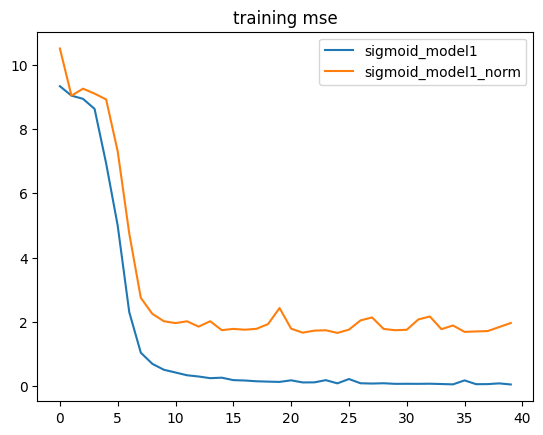

In [5]:
# 查看每一个模型在训练过程中的模型性能评估指标的变化
for i, model_name in enumerate(model_names):
    # print(i, model_name)
    plt.plot(list(range(n_epochs)), losses_train[i], label=model_name)
plt.legend(loc="upper right")
plt.title("training mse")
plt.show()

Text(0.5, 1.0, 'training mse')

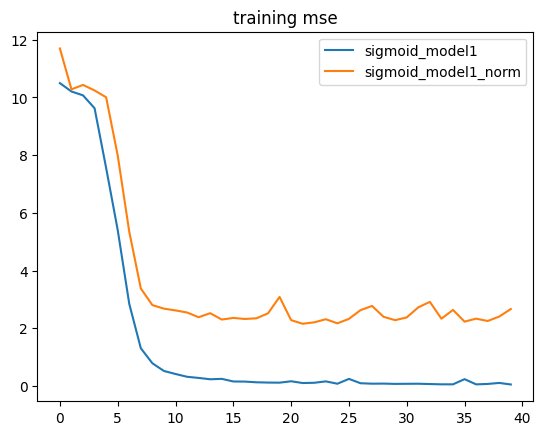

In [6]:
# 查看每一个模型在测试过程中的模型性能评估指标的变化
for i, model_name in enumerate(model_names):
    # print(i, model_name)
    plt.plot(list(range(n_epochs)), losses_test[i], label=model_name)
plt.legend(loc="upper right")
plt.title("training mse")
plt.show()

In [11]:
# 搭建模型: 使用面向对象(定义类/创建对象)的方式 继承nn.Module类
class net_class2(nn.Module):
    # 构造器 + 类/对象属性
    # => 子类的对象调用父类的构造器
    # => 神经网络模型中的各种层
    def __init__(self, in_features=2, hidden_features=[4, 4], out_features=1, bias=True, act_fun=torch.relu, BN_mode=None, momentum=0.1):
        super(net_class2, self).__init__()

        self.hidden1_linear = nn.Linear(in_features=in_features, out_features=hidden_features[0], bias=bias)
        self.hidden1_bn1d = nn.BatchNorm1d(num_features=hidden_features[0], momentum=momentum)
        
        self.hidden2_linear = nn.Linear(in_features=hidden_features[0], out_features=hidden_features[1], bias=bias)
        self.hidden2_bn1d = nn.BatchNorm1d(num_features=hidden_features[1], momentum=momentum)
        
        self.output_linear = nn.Linear(in_features=hidden_features[1], out_features=out_features, bias=bias)
        self.BN_mode = BN_mode
        self.act_fun = act_fun
        
    # 方法
    # => 前向传播: 数据从神经网络的输入层 -> 隐藏层 -> 输出层; 逐层完成整合信息+加工信息
    def forward(self, X):
        if self.BN_mode == None:
            # 输入层 -> 隐藏层第一层
            # 整合信息
            zhat = self.hidden1_linear(X)
            # 加工信息
            sigma = self.act_fun(zhat)

            # 隐藏层第一层 -> 隐藏层第二层(数据归一化层不工作) -> 隐藏层第三层
            # 整合信息
            zhat = self.hidden2_linear(sigma)
            # 加工信息
            sigma = self.act_fun(zhat)

            # 隐藏层第三层 -> 隐藏层第四层(数据归一化层不工作) -> 输出层
            # 整合信息
            zhat = self.output_linear(sigma)
            
        elif self.BN_mode == 'before':
            # 输入层 -> 隐藏层第一层
            # 整合信息
            zhat = self.hidden1_linear(X)
            # 调整当前数据的各个原始特征变量or中间隐藏变量的数据的分布
            zhat_norm = self.hidden1_bn1d(zhat)       
            # 加工信息
            sigma = self.act_fun(zhat_norm)

            # 隐藏层第一层 -> 隐藏层第二层(数据归一化层) -> 隐藏层第三层
            # 整合信息
            zhat = self.hidden2_linear(sigma)
            # 调整当前数据的各个原始特征变量or中间隐藏变量的数据的分布
            zhat_norm = self.hidden2_bn1d(zhat)
            # 加工信息
            sigma = self.act_fun(zhat_norm)

            # 隐藏层等三层 -> 输出层
            zhat = self.output_linear(sigma)
        
        elif self.BN_mode == 'after':
            # 输入层 -> 隐藏层第一层
            # 整合信息
            zhat = self.hidden1_linear(X)
            # 加工信息
            sigma = self.act_fun(zhat)
            # 调整当前数据的各个原始特征变量or中间隐藏变量的数据的分布
            sigma_norm = self.hidden1_bn1d(sigma)

            # 隐藏层第一层 -> 隐藏层第二层(数据归一化层) -> 隐藏层第三层
            # 整合信息
            zhat = self.hidden2_linear(sigma_norm)
            # 加工信息
            sigma = self.act_fun(zhat)
            # 调整分布
            sigma_norm = self.hidden2_bn1d(sigma)

            # 隐藏层第三层 -> 输出层
            # 整合信息
            zhat = self.output_linear(sigma_norm)
        return zhat

In [9]:
# 搭建模型: 使用面向对象(定义类/创建对象)的方式 继承nn.Module类
class net_class3(nn.Module):
    # 构造器 + 类/对象属性
    # => 子类的对象调用父类的构造器
    # => 神经网络模型中的各种层
    def __init__(self, in_features=2, hidden_features=[4, 4, 4], out_features=1, bias=True, act_fun=torch.relu, BN_mode=None, momentum=0.1):
        super(net_class3, self).__init__()

        self.hidden1_linear = nn.Linear(in_features=in_features, out_features=hidden_features[0], bias=bias)
        self.hidden1_bn1d = nn.BatchNorm1d(num_features=hidden_features[0], momentum=momentum)
        
        self.hidden2_linear = nn.Linear(in_features=hidden_features[0], out_features=hidden_features[1], bias=bias)
        self.hidden2_bn1d = nn.BatchNorm1d(num_features=hidden_features[1], momentum=momentum)

        self.hidden3_linear = nn.Linear(in_features=hidden_features[1], out_features=hidden_features[2], bias=bias)
        self.hidden3_bn1d = nn.BatchNorm1d(num_features=hidden_features[2], momentum=momentum)
        
        self.output_linear = nn.Linear(in_features=hidden_features[2], out_features=out_features, bias=bias)
        self.BN_mode = BN_mode
        self.act_fun = act_fun
        
    # 方法
    # => 前向传播: 数据从神经网络的输入层 -> 隐藏层 -> 输出层; 逐层完成整合信息+加工信息
    def forward(self, X):
        if self.BN_mode == None:
            # 输入层 -> 隐藏层第一层
            # 整合信息
            zhat = self.hidden1_linear(X)
            # 加工信息
            sigma = self.act_fun(zhat)

            # 隐藏层第一层 -> 隐藏层第二层
            # 整合信息
            zhat = self.hidden2_linear(sigma)
            # 加工信息
            sigma = self.act_fun(zhat)

            # 隐藏层第二层 -> 隐藏层第三层
            # 整合信息
            zhat = self.hidden3_linear(sigma)
            # 加工信息
            sigma = self.act_fun(zhat)

            # 隐藏层第三层 -> 输出层
            zhat = self.output_linear(sigma)
            
        elif self.BN_mode == 'before':
            # 输入层 -> 隐藏层第一层
            # 整合信息
            zhat = self.hidden1_linear(X)
            # 在加工信息之前调整整合信息得到的当前batch的各个中间潜在变量的均值和方差
            zhat_norm = self.hidden1_bn1d(zhat)       
            # 加工信息
            sigma = self.act_fun(zhat_norm)

            # 隐藏层第一层 -> 隐藏层第二层
            # 整合信息
            zhat = self.hidden2_linear(sigma)
            # 在加工信息之前调整整合信息得到的当前batch的各个中间潜在变量的均值和方差
            zhat_norm = self.hidden2_bn1d(zhat)
            # 加工信息
            sigma = self.act_fun(zhat_norm)

            # 隐藏层第二层 -> 隐藏层第三层
            # 整合信息
            zhat = self.hidden3_linear(sigma)
            # 在加工信息之前调整整合信息得到的当前batch的各个中间潜在变量的均值和方差
            zhat_norm = self.hidden3_bn1d(zhat)
            # 加工信息
            sigma = self.act_fun(zhat_norm)

            # 隐藏层第三层 -> 输出层
            # 整合信息
            zhat = self.output_linear(sigma)
            
        elif self.BN_mode == 'after':
            # 输入层 -> 隐藏层第一层
            # 整合信息
            zhat = self.hidden1_linear(X)
            # 加工信息
            sigma = self.act_fun(zhat)
            # 在加工信息之后调整整合信息得到的当前batch的各个中间潜在变量的均值和方差
            sigma_norm = self.hidden1_bn1d(sigma)

            # 隐藏层第一层 -> 隐藏层第二层
            # 整合信息
            zhat = self.hidden2_linear(sigma_norm)
            # 加工信息
            sigma = self.act_fun(zhat)
            # 在加工信息之后调整整合信息得到的当前batch的各个中间潜在变量的均值和方差
            sigma_norm = self.hidden2_bn1d(sigma)

            # 隐藏层第二层 -> 隐藏层第三层
            # 整合信息
            zhat = self.hidden3_linear(sigma_norm)
            # 加工信息
            sigma = self.act_fun(zhat)
            # 在加工信息之后调整整合信息得到的当前batch的各个中间潜在变量的均值和方差
            sigma_norm = self.hidden3_bn1d(sigma)

            # 隐藏层第三层 -> 输出层
            # 整合信息
            zhat = self.output_linear(sigma_norm)
        return zhat

In [10]:
# 搭建模型: 使用面向对象(定义类/创建对象)的方式 继承nn.Module类
class net_class4(nn.Module):
    # 构造器 + 类/对象属性
    # => 子类的对象调用父类的构造器
    # => 神经网络模型中的各种层
    def __init__(self, in_features=2, hidden_features=[4, 4, 4, 4], out_features=1, bias=True, act_fun=torch.relu, BN_mode=None, momentum=0.1):
        super(net_class4, self).__init__()

        self.hidden1_linear = nn.Linear(in_features=in_features, out_features=hidden_features[0], bias=bias)
        self.hidden1_bn1d = nn.BatchNorm1d(num_features=hidden_features[0], momentum=momentum)
        
        self.hidden2_linear = nn.Linear(in_features=hidden_features[0], out_features=hidden_features[1], bias=bias)
        self.hidden2_bn1d = nn.BatchNorm1d(num_features=hidden_features[1], momentum=momentum)

        self.hidden3_linear = nn.Linear(in_features=hidden_features[1], out_features=hidden_features[2], bias=bias)
        self.hidden3_bn1d = nn.BatchNorm1d(num_features=hidden_features[2], momentum=momentum)

        self.hidden4_linear = nn.Linear(in_features=hidden_features[2], out_features=hidden_features[3], bias=bias)
        self.hidden4_bn1d = nn.BatchNorm1d(num_features=hidden_features[3], momentum=momentum)
        
        self.output_linear = nn.Linear(in_features=hidden_features[3], out_features=out_features, bias=bias)
        self.BN_mode = BN_mode
        self.act_fun = act_fun
        
    # 方法
    # => 前向传播: 数据从神经网络的输入层 -> 隐藏层 -> 输出层; 逐层完成整合信息+加工信息
    def forward(self, X):
        if self.BN_mode == None:
            # 输入层 -> 隐藏层第一层
            # 整合信息
            zhat = self.hidden1_linear(X)
            # 加工信息
            sigma = self.act_fun(zhat)

            # 隐藏层第一层 -> 隐藏层第二层
            # 整合信息
            zhat = self.hidden2_linear(sigma)
            # 加工信息
            sigma = self.act_fun(zhat)

            # 隐藏层第二层 -> 隐藏层第三层
            # 整合信息
            zhat = self.hidden3_linear(sigma)
            # 加工信息
            sigma = self.act_fun(zhat)

            # 隐藏层第三层 -> 隐藏层第四层
            # 整合信息
            zhat = self.hidden4_linear(sigma)
            # 加工信息
            sigma = self.act_fun(zhat)

            # 隐藏层第四层 -> 输出层
            zhat = self.output_linear(sigma)
            
        elif self.BN_mode == 'before':
            # 输入层 -> 隐藏层第一层
            # 整合信息
            zhat = self.hidden1_linear(X)
            # 在加工信息之前调整整合信息得到的当前batch的各个中间潜在变量的均值和方差
            zhat_norm = self.hidden1_bn1d(zhat)       
            # 加工信息
            sigma = self.act_fun(zhat_norm)

            # 隐藏层第一层 -> 隐藏层第二层
            # 整合信息
            zhat = self.hidden2_linear(sigma)
            # 在加工信息之前调整整合信息得到的当前batch的各个中间潜在变量的均值和方差
            zhat_norm = self.hidden2_bn1d(zhat)
            # 加工信息
            sigma = self.act_fun(zhat_norm)

            # 隐藏层第二层 -> 隐藏层第三层
            # 整合信息
            zhat = self.hidden3_linear(sigma)
            # 在加工信息之前调整整合信息得到的当前batch的各个中间潜在变量的均值和方差
            zhat_norm = self.hidden3_bn1d(zhat)
            # 加工信息
            sigma = self.act_fun(zhat_norm)

            # 隐藏层第三层 -> 隐藏层第四层
            # 整合信息
            zhat = self.hidden4_linear(sigma)
            # 在加工信息之前调整整合信息得到的当前batch的各个中间潜在变量的均值和方差
            zhat_norm = self.hidden4_bn1d(zhat)
            # 加工信息
            sigma = self.act_fun(zhat_norm)

            # 隐藏层第四层 -> 输出层
            # 整合信息
            zhat = self.output_linear(sigma)
            
        elif self.BN_mode == 'after':
            # 输入层 -> 隐藏层第一层
            # 整合信息
            zhat = self.hidden1_linear(X)
            # 加工信息
            sigma = self.act_fun(zhat)
            # 在加工信息之后调整整合信息得到的当前batch的各个中间潜在变量的均值和方差
            sigma_norm = self.hidden1_bn1d(sigma)

            # 隐藏层第一层 -> 隐藏层第二层
            # 整合信息
            zhat = self.hidden2_linear(sigma_norm)
            # 加工信息
            sigma = self.act_fun(zhat)
            # 在加工信息之后调整整合信息得到的当前batch的各个中间潜在变量的均值和方差
            sigma_norm = self.hidden2_bn1d(sigma)

            # 隐藏层第二层 -> 隐藏层第三层
            # 整合信息
            zhat = self.hidden3_linear(sigma_norm)
            # 加工信息
            sigma = self.act_fun(zhat)
            # 在加工信息之后调整整合信息得到的当前batch的各个中间潜在变量的均值和方差
            sigma_norm = self.hidden3_bn1d(sigma)

            # 隐藏层第三层 -> 隐藏层第四层
            # 整合信息
            zhat = self.hidden4_linear(sigma_norm)
            # 加工信息
            sigma = self.act_fun(zhat)
            # 在加工信息之后调整整合信息得到的当前batch的各个中间潜在变量的均值和方差
            sigma_norm = self.hidden4_bn1d(sigma)

            # 隐藏层第四层 -> 输出层
            # 整合信息
            zhat = self.output_linear(sigma_norm)
        return zhat

##### Layer Normalization

In [ ]:
# NLP的例子: 特征张量的维度, 形状
# => 3, (客体数, 一个客体对应的序列长度(不同客体长度实际可以不同), 一个序列中的一个样本的原始特征变量/中间潜在变量的个数)
batch, sentence_length, embedding_dim = 20, 5, 10
embedding = torch.randn(size=(batch, sentence_length, embedding_dim))
hidden_ln = nn.LayerNorm(normalized_shape=)